In [1]:
import sys, os
import pandas as pd
import numpy as np

from IPython.display import display

In [2]:
# Declare all variables as strings. Spaces must be replaced with '+', i.e., change 'John Smith' to 'John+Smith'.
# Define the lat, long of the location and the year
locs = 6        #this is the number of locations we are using
p1_lat, p1_lon = 39.835694, -105.359097         #Golden
p2_lat, p2_lon = 38.821557, -104.660183         #Colorado Spring
p3_lat, p3_lon = 39.656653, -106.343787         #Vale
p4_lat, p4_lon = 40.569931, -105.182480         #Fort Collins
p5_lat, p5_lon = 39.044038, -108.594066         #Grand junction
p6_lat, p6_lon = 36.995228, -102.044999         #3points
P_lats = [p1_lat, p2_lat, p3_lat, p4_lat, p5_lat, p6_lat]
P_lons = [p1_lon, p2_lon, p3_lon, p4_lon, p5_lon, p6_lon]

#this text array will be used for prints/ plots labels
text = ['Location1(Golden,CO)', 'Location2(Colorado Spring,CO)',
        'Location3(Vale,CO)', 'Location4(Fort Collins,CO)',
        'Location5(Grand Junction,CO)', 'Location6(3Points,CO)']

# My API-key
api_key = '1gHoGjlIGeXbQOpiunnlRrJS9vYYb490MA4n9X7s'

# Set the attributes to extract (e.g., dhi, ghi, etc.), separated by commas.
attributes = 'air_temperature,solar_zenith_angle,dew_point,relative_humidity,surface_albedo,surface_pressure,total_precipitable_water,wind_speed,wind_direction,ghi,dhi,dni'

# Choose year of data
year = '2010'
# Set leap year to true or false. True will return leap day data if present, false will not.
leap_year = 'false'
# Set time interval in minutes, i.e., '30' is half hour intervals. Valid intervals are 30 & 60.
interval = '30'
# Specify Coordinated Universal Time (UTC), 'true' will use UTC, 'false' will use the local time zone of the data.
# NOTE: In order to use the NSRDB data in SAM, you must specify UTC as 'false'. SAM requires the data to be in the
# local time zone.
utc = 'false'
# Your full name, use '+' instead of spaces.
your_name = 'Sara+Abouelella'
# Your reason for using the NSRDB.
reason_for_use = 'interview'
# Your affiliation
your_affiliation = 'student'
# Your email address
your_email = 'sabouelella3@gatech.edu'
# Please join our mailing list so we can keep you up-to-date on new developments.
mailing_list = 'false'

# Declare url string
url = 'https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-2-2-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=p4_lat, lon=p4_lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes)
# Return just the first 2 lines to get metadata:
info = pd.read_csv(url, nrows=1)
# See metadata for specified properties, e.g., timezone and elevation
timezone, elevation = info['Local Time Zone'], info['Elevation']

In [3]:
# View metadata
info

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Cloud Type 11,Cloud Type 12,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Surface Albedo Units,Version
0,NSRDB,479473,-,-,-,40.57,-105.18,-7,1743,-7,...,Dust,Smoke,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,NaN,v3.2.2


In [4]:
# Return all but first 2 lines of csv to get data:

dfs = []
#loop for all the location
for i in range(locs):
    df = pd.read_csv('https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=P_lats[i], lon=P_lons[i], leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)
    
    # Set the time index in the pandas dataframe:
    df = df.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))
    print('shape for loc{}:'.format(i+1), df.shape)
    dfs.append(df)
#check some rows from one of them
dfs[1].head(8)
# print(df.iloc[2,:])

shape for loc1: (17520, 17)
shape for loc2: (17520, 17)
shape for loc3: (17520, 17)
shape for loc4: (17520, 17)
shape for loc5: (17520, 17)
shape for loc6: (17520, 17)


,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0
2010-01-01 02:30:00,2010,1,1,2,30,-7,144.88,-16,49.13,0.866,810,0.652,2.8,312.7,0,0,0
2010-01-01 03:00:00,2010,1,1,3,0,-7,139.18,-16,51.95,0.866,810,0.665,2.8,322.5,0,0,0
2010-01-01 03:30:00,2010,1,1,3,30,-7,133.37,-16,51.95,0.866,810,0.671,2.5,322.5,0,0,0


In [5]:
dffs = []
# year column is constant, drop it
for i in range(locs):
    dff = dfs[i].drop(columns=['Year'], axis=1)
    dffs.append(dff)
dffs[1].head()

,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI
2010-01-01 00:00:00,1,1,0,0,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0
2010-01-01 00:30:00,1,1,0,30,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0
2010-01-01 01:00:00,1,1,1,0,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0
2010-01-01 01:30:00,1,1,1,30,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0
2010-01-01 02:00:00,1,1,2,0,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0


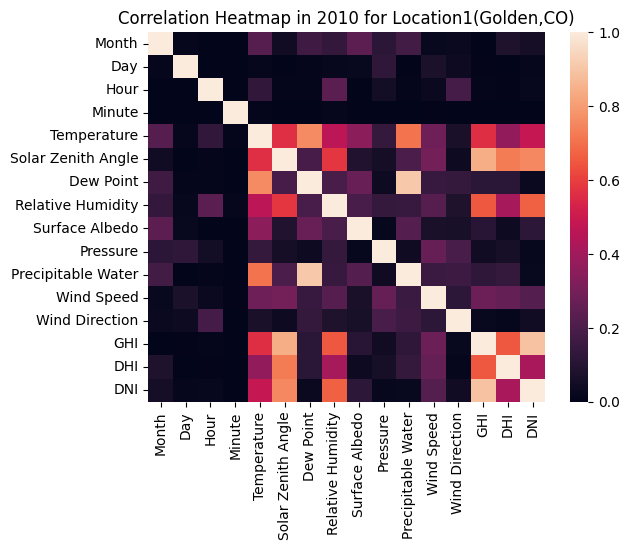

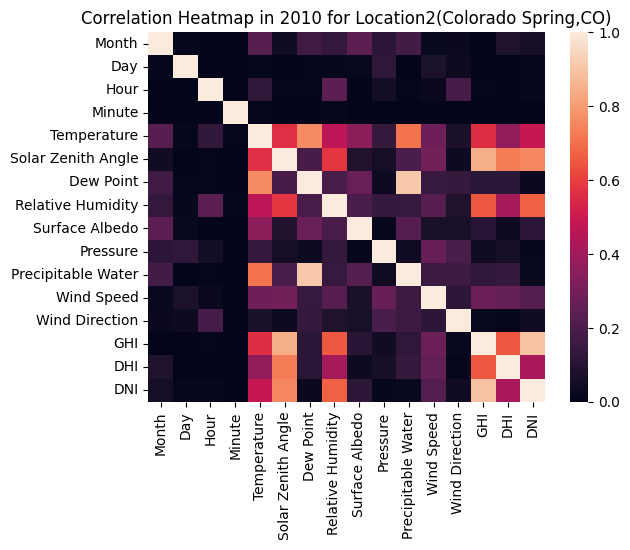

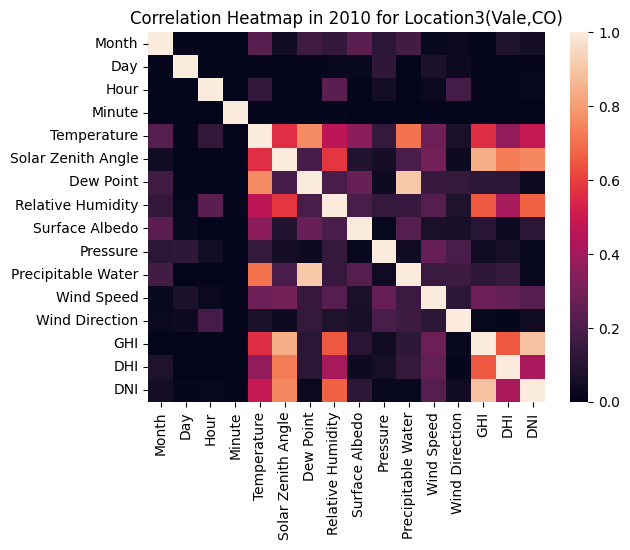

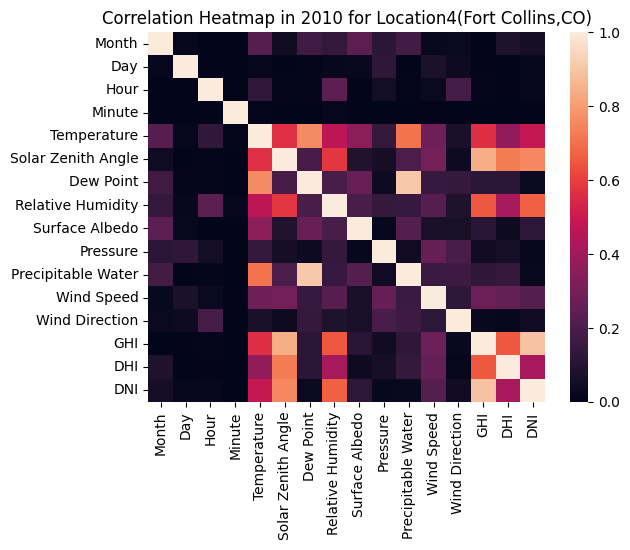

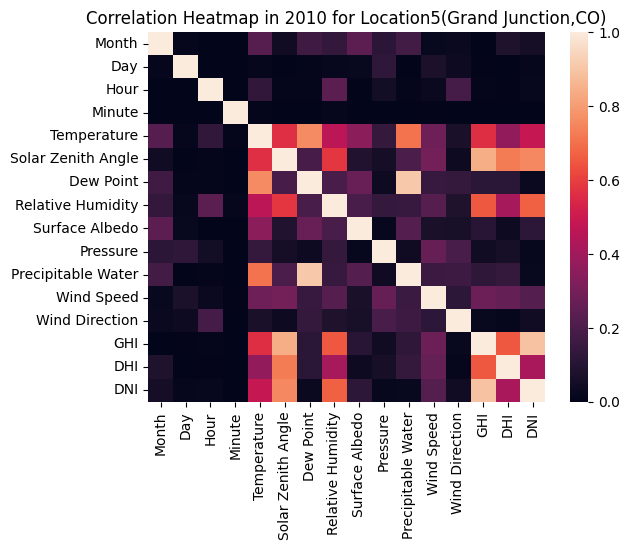

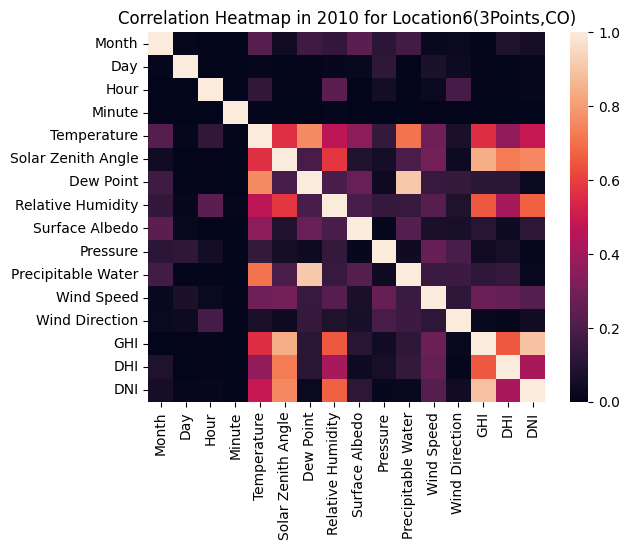

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation matrix for all the features
for i in range(locs):
    plt.clf()
    corr_matrix = abs(dff.corr())
    heatmap = sns.heatmap(abs(corr_matrix))
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [7]:
# adding columns for future DNI values
for i in range(locs):
    dfs[i]['DNI after 0.5h'] = dfs[i][['DNI']].shift(1)
    dfs[i]['DNI after 1.0h'] = dfs[i][['DNI']].shift(2)
    dfs[i]['DNI after 1.5h'] = dfs[i][['DNI']].shift(3)
    dfs[i]['DNI after 2.0h'] = dfs[i][['DNI']].shift(4)
    dfs[i]['DNI after 2.5h'] = dfs[i][['DNI']].shift(5)
    dfs[i]['DNI after 3.0h'] = dfs[i][['DNI']].shift(6)
    dfs[i]['DNI after 3.5h'] = dfs[i][['DNI']].shift(7)
    dfs[i]['DNI after 4.0h'] = dfs[i][['DNI']].shift(8)
    
#print one of the dataframes to check future DNI are added  
dfs[1].head()

,Year,Month,Day,Hour,Minute,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,...,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,2010,1,1,0,0,-8,164.18,-16,53.95,0.866,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,2010,1,1,0,30,-7,163.11,-16,53.94,0.866,...,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,2010,1,1,1,0,-7,159.95,-16,52.81,0.866,...,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,2010,1,1,1,30,-7,155.51,-16,52.81,0.866,...,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,2010,1,1,2,0,-8,150.38,-16,53.11,0.866,...,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# drop month, day, hour, minute to plot the heat map again
sub_dfs = []
for i in range(locs):
    sub_dfs.append(dfs[i].iloc[:, 5:])

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Dew Point,Relative Humidity,Surface Albedo,Pressure,Precipitable Water,Wind Speed,Wind Direction,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,-16,53.95,0.866,810,0.540,3.6,302.6,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,-16,53.94,0.866,810,0.571,3.4,302.6,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,-16,52.81,0.866,810,0.603,3.3,307.1,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,-16,52.81,0.866,810,0.621,3.0,307.1,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,-16,53.11,0.866,810,0.640,2.8,312.7,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


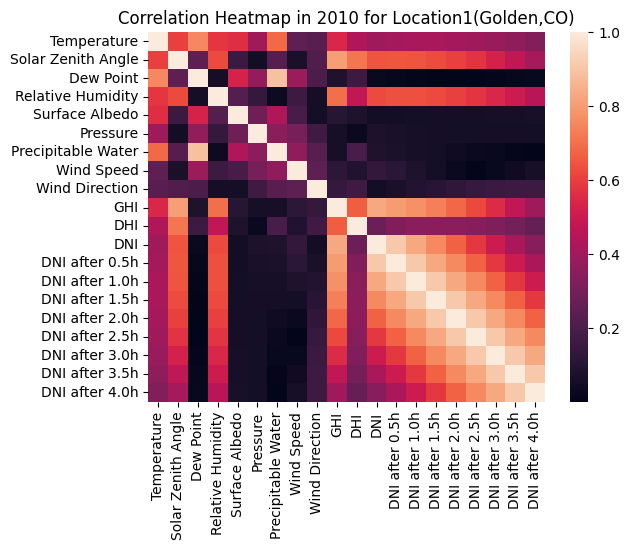

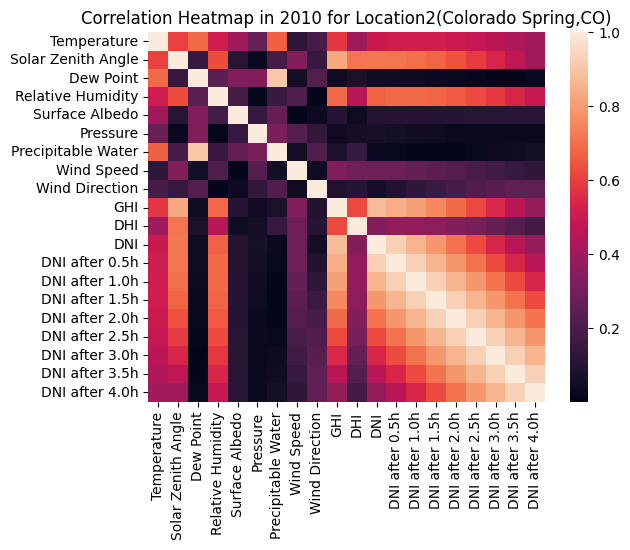

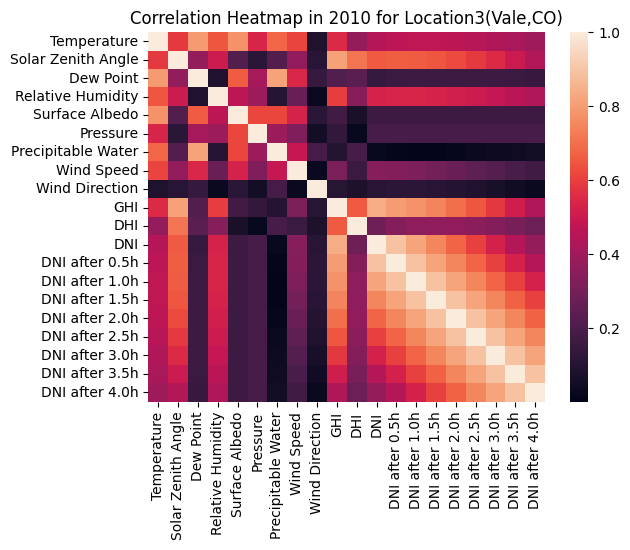

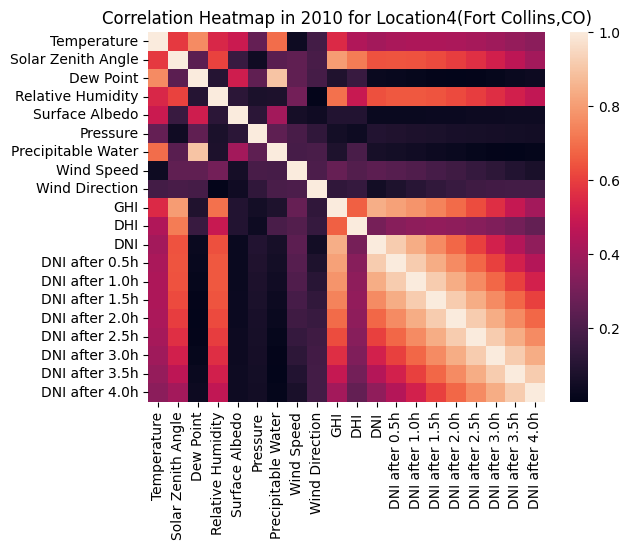

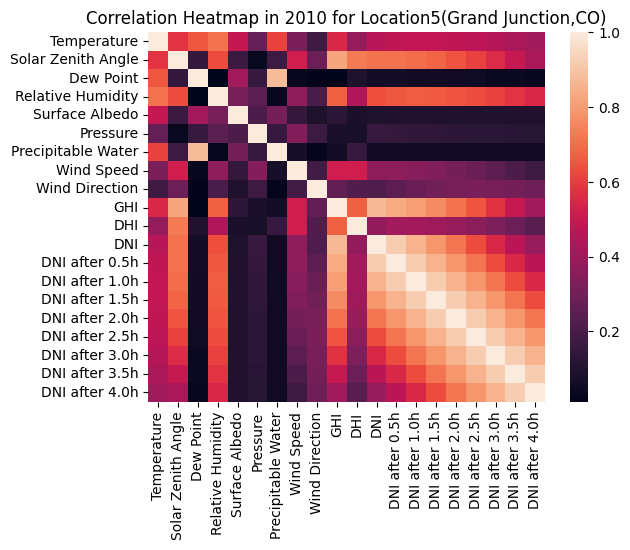

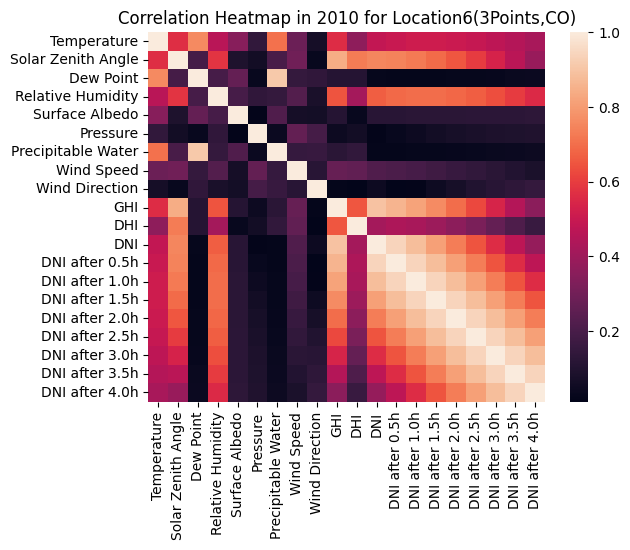

In [9]:
# correlation matrix without time(s) columns
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr())
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

In [10]:
# as noticed from the previous heat maps, some features are non-relevent
# drop them
for i in range(locs):
    sub_dfs[i].drop(['Dew Point', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Speed', 'Wind Direction'], axis=1, inplace=True)

sub_dfs[1].head()

,Temperature,Solar Zenith Angle,Relative Humidity,GHI,DHI,DNI,DNI after 0.5h,DNI after 1.0h,DNI after 1.5h,DNI after 2.0h,DNI after 2.5h,DNI after 3.0h,DNI after 3.5h,DNI after 4.0h
2010-01-01 00:00:00,-8,164.18,53.95,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 00:30:00,-7,163.11,53.94,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,-7,159.95,52.81,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:30:00,-7,155.51,52.81,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,-8,150.38,53.11,0,0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


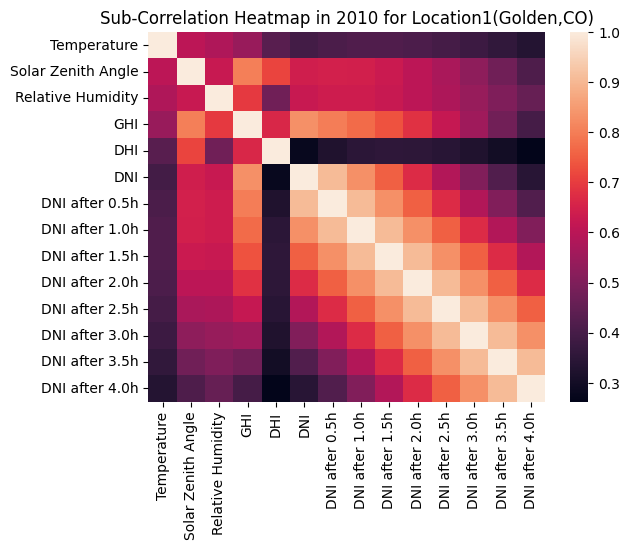

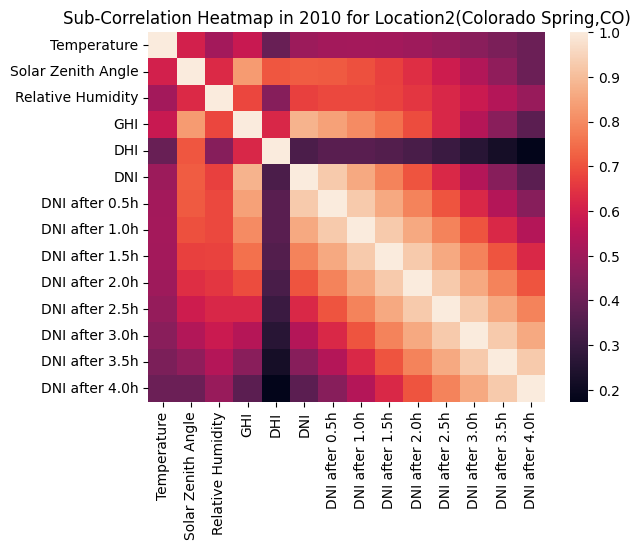

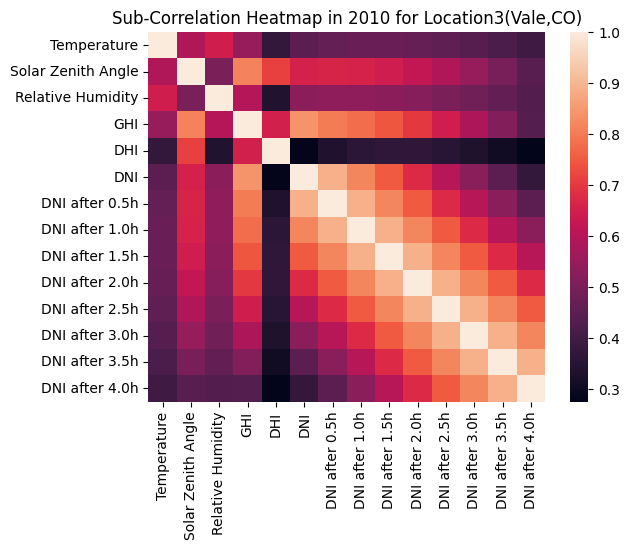

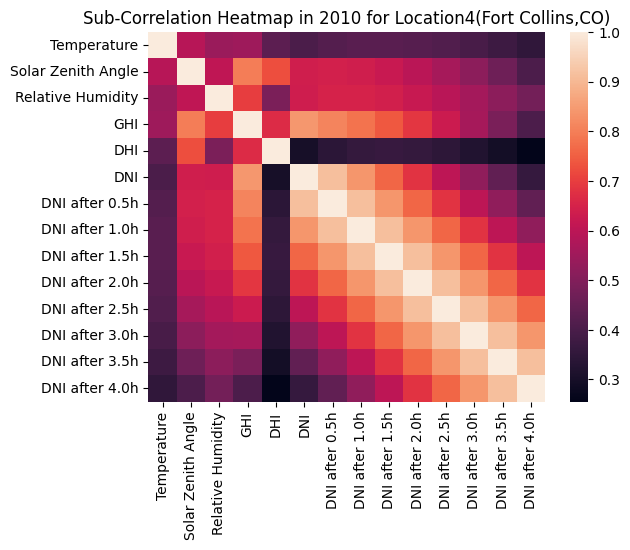

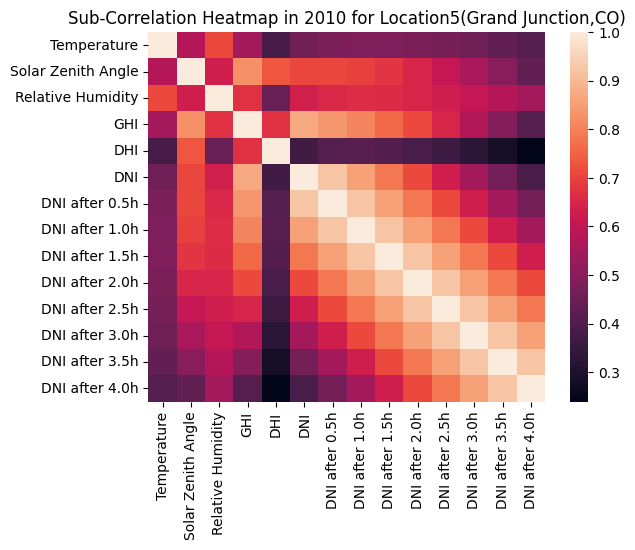

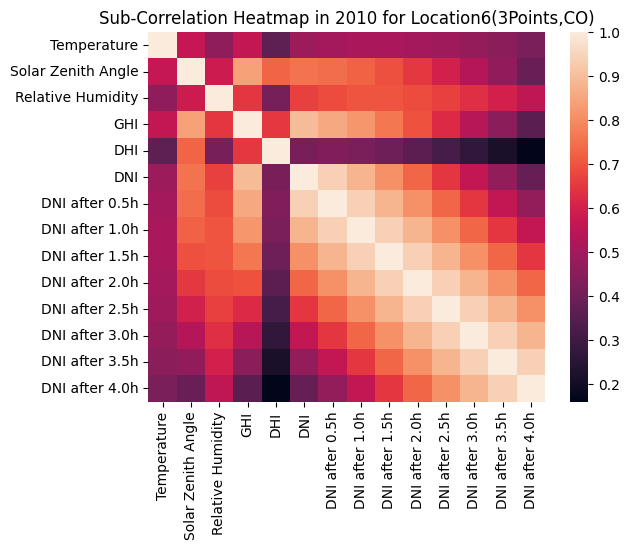

In [11]:
#plot the desired correlation matrix after removing all non-relevent features
for i in range(locs):
    plt.clf()
    corr_matrix = abs(sub_dfs[i].corr()) 
    dataplot = sns.heatmap(corr_matrix)
    # displaying heatmap
    plt.title('Sub-Correlation Heatmap in 2010 for {}'.format(text[i]))
    plt.show()

<Figure size 640x480 with 0 Axes>

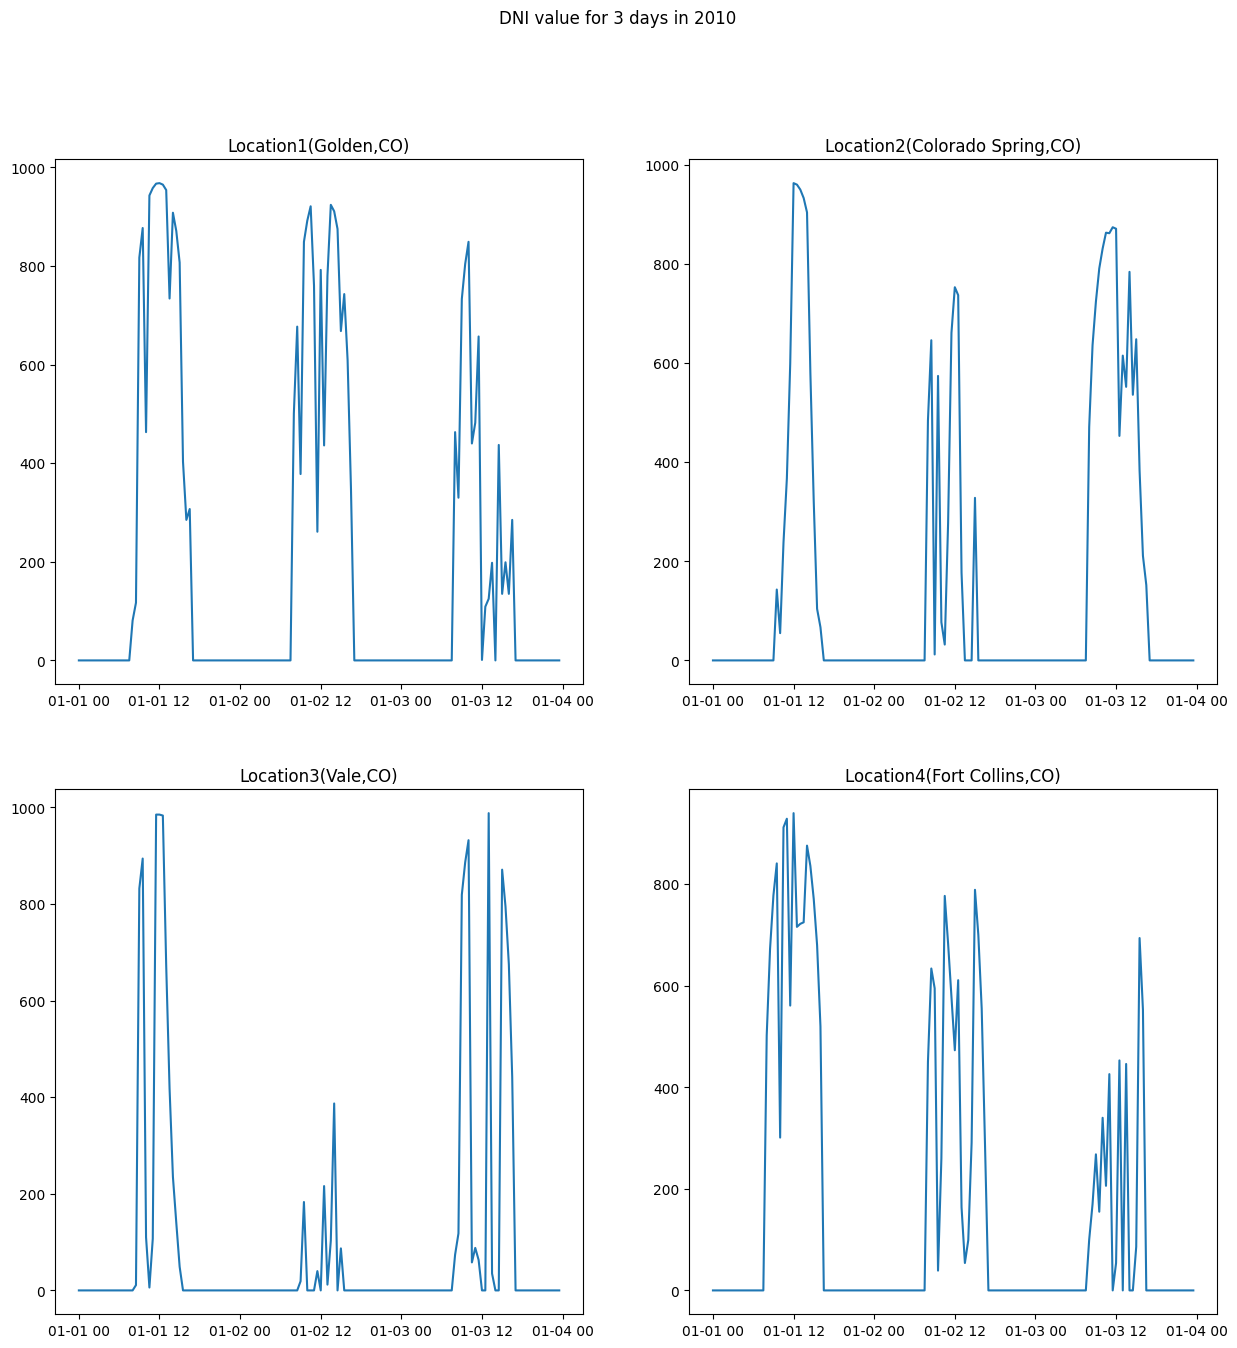

In [12]:
# plot a graph to show that DNI values are not consistent and very hard to predict
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
plt.suptitle('DNI value for 3 days in 2010')
for i, ax in enumerate(axes.flat):
    ax.set_title(text[i])
    ax.plot(dfs[i].index[:48*3], dfs[i]['DNI'][:48*3])
    # plt.xticks(x=dfs[i].index[:48], rotation=45, ha='right')
plt.show()

<Figure size 640x480 with 0 Axes>

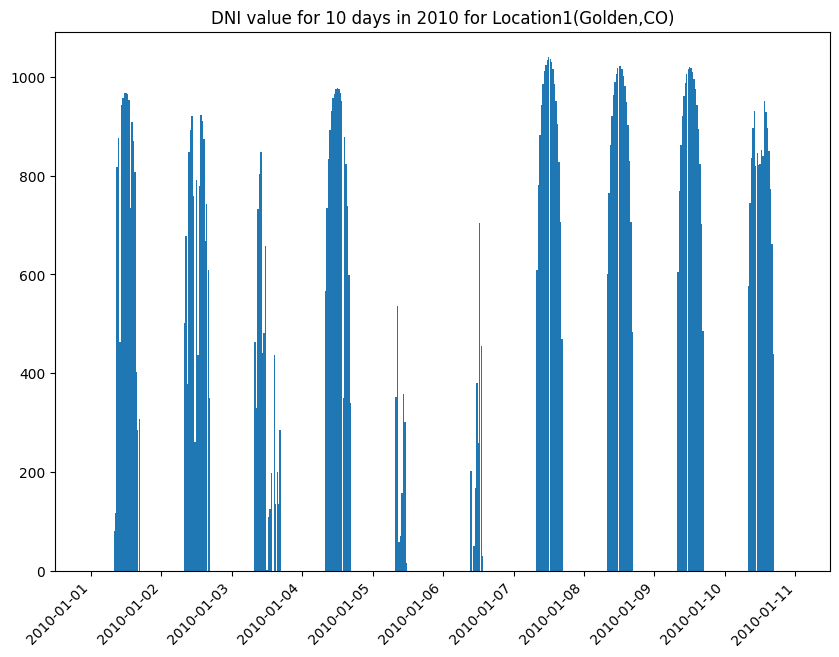

<Figure size 640x480 with 0 Axes>

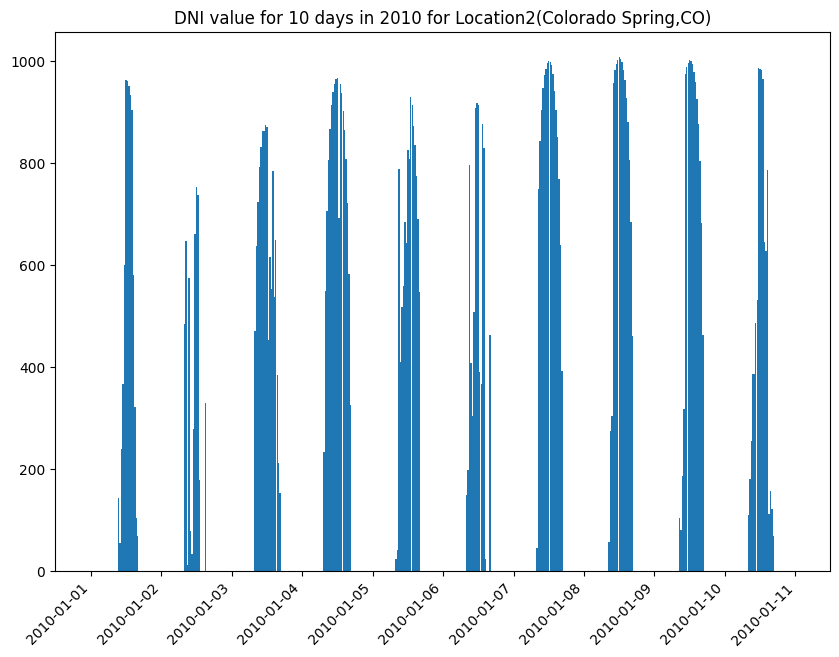

<Figure size 640x480 with 0 Axes>

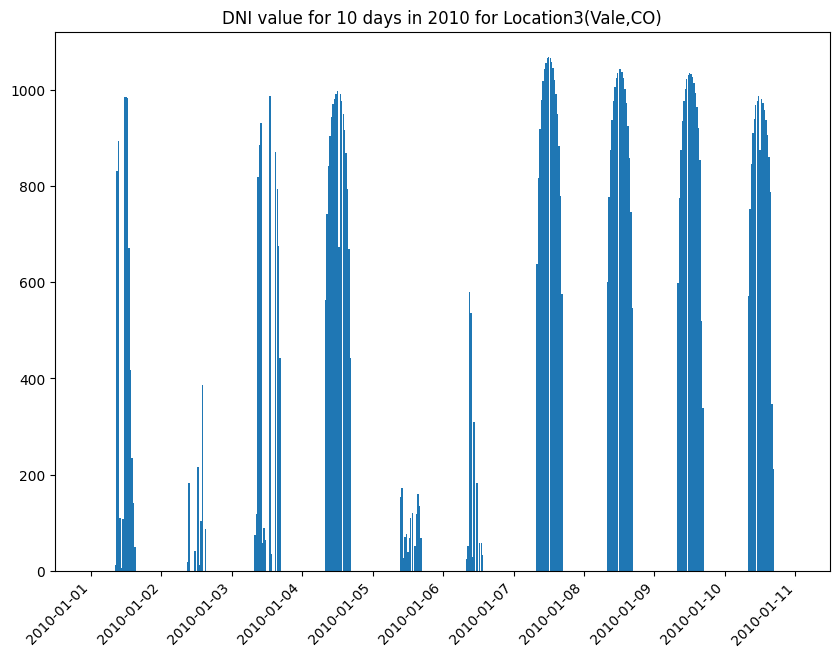

<Figure size 640x480 with 0 Axes>

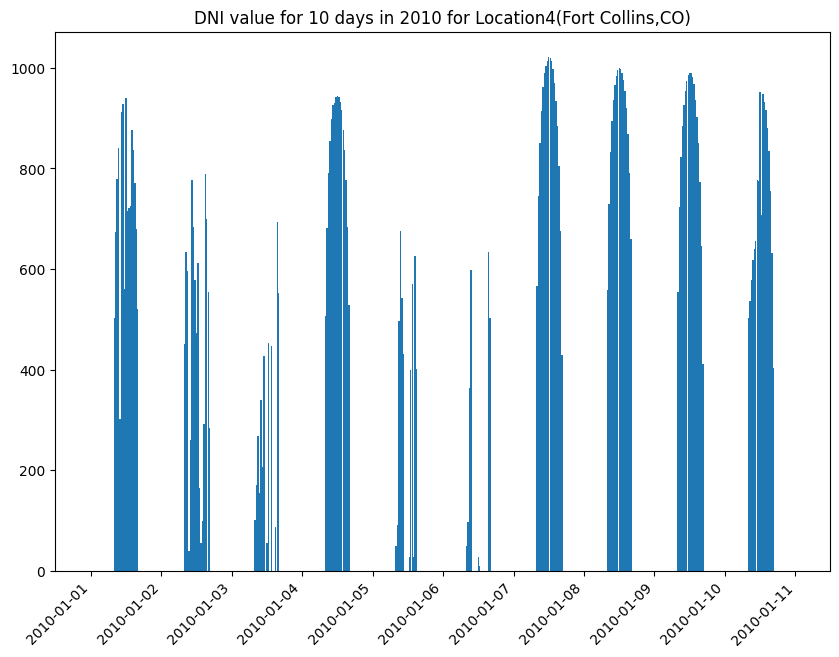

<Figure size 640x480 with 0 Axes>

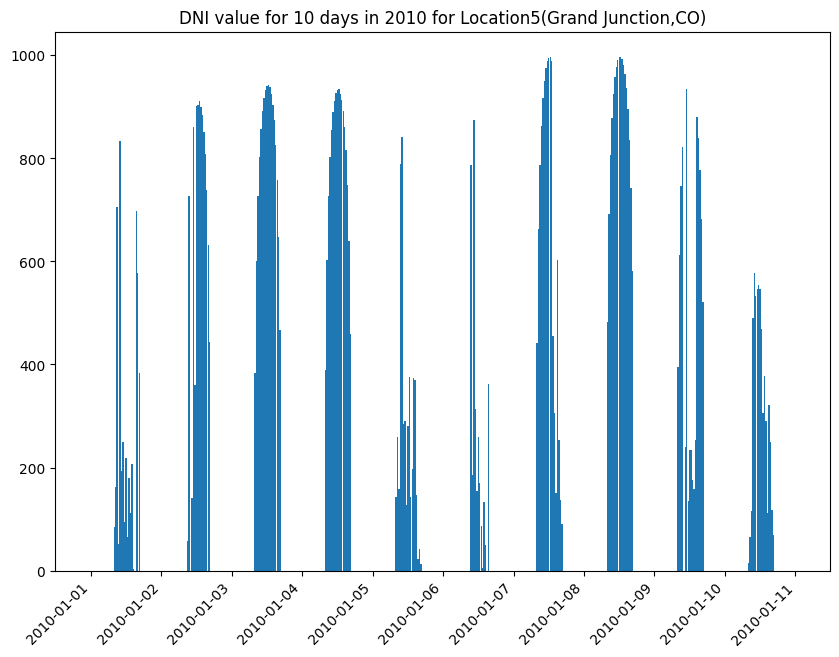

<Figure size 640x480 with 0 Axes>

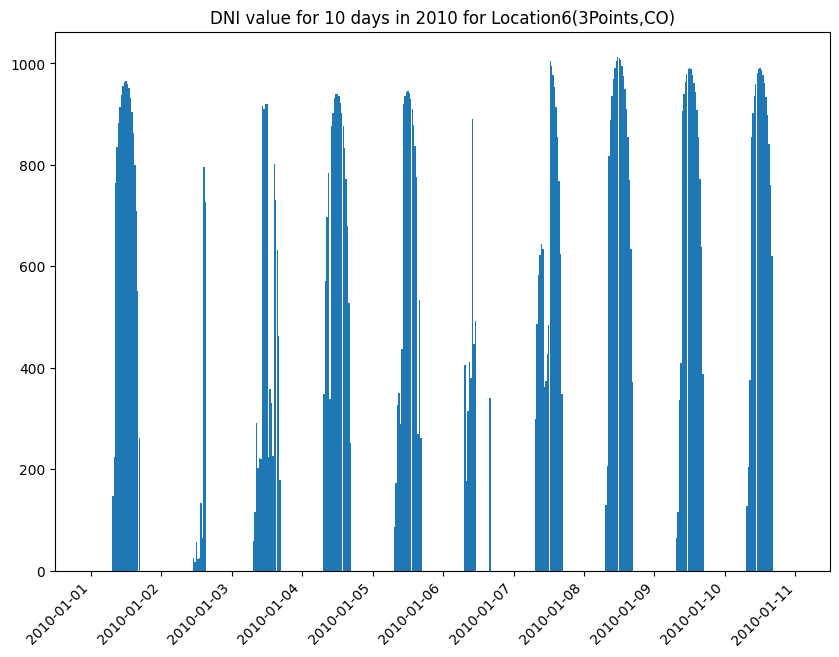

In [13]:
# plot a graph to show that DNI values during night time are always Zero
for i in range(locs):
    plt.clf()
    fig = plt.figure(figsize =(10, 7))
    plt.title('DNI value for 10 days in 2010 for {}'.format(text[i]))
    plt.bar(dfs[i].index[:480], dfs[i]['DNI'][:480], width=0.02)

    plt.xticks(x=dfs[i].index[:480], rotation=45, ha='right')
    plt.show()

In [14]:
# Re-constructing the data by using a sliding window 
win_size = 8    # window size of 8 samples (4 hours)
X_lst = []      # list to hold all the features for all the locations
Y_lst = []      # list to hold all the labels for all the locations

for i in range(locs):
    df_fetures = sub_dfs[i].iloc[:,:-8]     #:-8 ==> means we remove the future data

    X = np.zeros((df_fetures.shape[0] - win_size, win_size * df_fetures.shape[1]))      # initialize features array
    Y = np.zeros((df_fetures.shape[0] - win_size, 1))                                   #initialize labels array
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X.shape, Y.shape))

    for j in range(X.shape[0]):
        chunk_x = df_fetures.iloc[j:j+win_size, :].to_numpy()               # sliding window chunck
        chunk_y = df_fetures.iloc[j+win_size, -1]
        X[j] = np.reshape(chunk_x, (1, df_fetures.shape[1] * win_size))     #flatting the chunks
        Y[j]= chunk_y

    X_lst.append(X)
    Y_lst.append(Y)


Location1(Golden,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location2(Colorado Spring,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location3(Vale,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location4(Fort Collins,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location5(Grand Junction,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)
Location6(3Points,CO)
Feature array size:(17512, 48), Labels array size(17512, 1)


In [15]:
# Remove the labels that we are sure they have DNI of 0

for i in range(locs):
    zero_index = []
    for j in range(31, 50):     ## 31 means 7pm, and 50 means 5:30 am, consider the gap we have because the first 8 samples do
        zero_index = zero_index + list(range(j, Y_lst[i].shape[0], 48))
        # the time is periodic, every day has the exact same hours!
        ### examples:
        # zero1 = list(range(34, Y.shape[0], 48))    #10pm
        # # zero2 = list(range(35, Y.shape[0], 48))    #11pm

    print("{}\nnum of zero dni: ".format(text[i]), len(zero_index))
    print("This sum must be zeroo ==> ", np.sum(np.take(Y_lst[i], zero_index)))

    Y_lst[i] = np.delete(Y_lst[i], zero_index, axis=0)
    X_lst[i] = np.delete(X_lst[i], zero_index, axis=0)
    print("{}\nFeature array size:{}, Labels array size{}".format(text[i], X_lst[i].shape, Y_lst[i].shape))


Location1(Golden,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location1(Golden,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location2(Colorado Spring,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location2(Colorado Spring,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location3(Vale,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location3(Vale,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location4(Fort Collins,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location4(Fort Collins,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location5(Grand Junction,CO)
num of zero dni:  6925
This sum must be zeroo ==>  2109.0
Location5(Grand Junction,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)
Location6(3Points,CO)
num of zero dni:  6925
This sum must be zeroo ==>  0.0
Location6(3Points,CO)
Feature array size:(10587, 48), Labels array size(10587, 1)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.30

trainX_lst = []
valX_lst = []
testX_lst = []

trainY_lst = []
valY_lst = []
testY_lst = []

trainX_scaled_lst = []
valX_scaled_lst = []
testX_scaled_lst = []

for i in range(locs):
    # split the data for all the locations
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 1 - train_ratio)
    valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))
    
    sc=StandardScaler()
    scaler = sc.fit(trainX)
    trainX_scaled = scaler.transform(trainX)
    valX_scaled = scaler.transform(valX)
    testX_scaled = scaler.transform(testX)

    trainX_lst.append(trainX)
    valX_lst.append(valX)
    testX_lst.append(testX)
    
    trainY_lst.append(trainY)
    valY_lst.append(valY)
    testY_lst.append(testY)
    
    trainX_scaled_lst.append(trainX_scaled)
    valX_scaled_lst.append(valX_scaled)
    testX_scaled_lst.append(testX_scaled)
    
    print("=== {} ===".format(text[i]))
    print("trainx size: ", trainX_scaled.shape)
    print("valx size: ", valX_scaled.shape)
    print("testx size: ", testX_scaled.shape)
    print("==============")
    print("trainy size: ", trainY.shape)
    print("valy size: ", valY.shape)
    print("testy size: ", testY.shape)
    print("==============\n\n")

=== Location1(Golden,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location2(Colorado Spring,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location3(Vale,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location4(Fort Collins,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location5(Grand Junction,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy size:  (12258, 1)
valy size:  (1751, 1)
testy size:  (3503, 1)


=== Location6(3Points,CO) ===
trainx size:  (12258, 48)
valx size:  (1751, 48)
testx size:  (3503, 48)
trainy

In [58]:
# construct a new features array to build one model that forcasts the dni for all the locations instead of building a model for each location
# Initializating arrays
big_trainX_scaled = np.zeros((trainX_scaled_lst[0].shape[0]*locs, trainX_scaled_lst[0].shape[1]))       
big_valX_scaled = np.zeros((valX_scaled_lst[0].shape[0]*locs, valX_scaled_lst[0].shape[1]))
big_testX_scaled = np.zeros((testX_scaled_lst[0].shape[0]*locs, testX_scaled_lst[0].shape[1]))

big_trainY = np.zeros((trainY_lst[0].shape[0]*locs, trainY_lst[0].shape[1]))
big_valY = np.zeros((valY_lst[0].shape[0]*locs, valY_lst[0].shape[1]))
big_testY = np.zeros((testY_lst[0].shape[0]*locs, testY_lst[0].shape[1]))

# populating arrays
for i in range(locs):
    big_trainX_scaled[i:i+trainX_scaled_lst[0].shape[0], :] = trainX_scaled_lst[i]
    big_valX_scaled[i:i+valX_scaled_lst[0].shape[0], :] = valX_scaled_lst[i]
    big_testX_scaled[i:i+testX_scaled_lst[0].shape[0], :] = testX_scaled_lst[i]
    
    big_trainY[i:i+trainY_lst[0].shape[0], :] = trainY_lst[i]
    big_valY[i:i+valY_lst[0].shape[0], :] = valY_lst[i]
    big_testY[i:i+testY_lst[0].shape[0], :] = testY_lst[i]


In [59]:
# let's try linear regression first
from sklearn import linear_model, metrics

y_pred_linreg_lst = []

for i in range(locs): 
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(trainX_scaled_lst[i], trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_linreg = regr.predict(testX_scaled_lst[i])
    y_pred_linreg_lst.append(y_pred_linreg)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=======\n")


=== Location1(Golden,CO) ===
Mean Absolute Error: 59.58567779027305
Mean Squared Error: 12911.481328697973
Root Mean Squared Error: 113.62869940599502

=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 60.97467073139261
Mean Squared Error: 13233.952660512476
Root Mean Squared Error: 115.03891802565111

=== Location3(Vale,CO) ===
Mean Absolute Error: 59.74567394002712
Mean Squared Error: 12803.07423916591
Root Mean Squared Error: 113.15067052017814

=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 62.86940892061464
Mean Squared Error: 14075.75153682323
Root Mean Squared Error: 118.64127248484496

=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 57.96061681901501
Mean Squared Error: 11620.488053410863
Root Mean Squared Error: 107.79836758231019

=== Location6(3Points,CO) ===
Mean Absolute Error: 57.363103194831915
Mean Squared Error: 11183.916487634548
Root Mean Squared Error: 105.75403768951116



In [60]:
# Try SVR with poly kernel
from sklearn.svm import SVR

y_pred_svr_lst = []

for i in range(locs):
    # create object
    regressor = SVR(kernel='poly')

    # Train the model using the training sets
    regressor.fit(trainX_scaled_lst[i],trainY_lst[i])
    
    # Make predictions using the testing set
    y_pred_svr = regressor.predict(testX_scaled_lst[i])
    y_pred_svr_lst.append(y_pred_svr)
    
    print("=== {} ===".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=======\n")



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location1(Golden,CO) ===
Mean Absolute Error: 142.43410266077046
Mean Squared Error: 60779.95594969546
Root Mean Squared Error: 246.53591208928458



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location2(Colorado Spring,CO) ===
Mean Absolute Error: 143.75277156779669
Mean Squared Error: 61236.8431013025
Root Mean Squared Error: 247.46079103830266



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location3(Vale,CO) ===
Mean Absolute Error: 143.92608002394974
Mean Squared Error: 61537.53602355973
Root Mean Squared Error: 248.06760373648095



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location4(Fort Collins,CO) ===
Mean Absolute Error: 147.60175000690163
Mean Squared Error: 63974.89221666367
Root Mean Squared Error: 252.9325843316034



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location5(Grand Junction,CO) ===
Mean Absolute Error: 139.34108393167244
Mean Squared Error: 59748.31461544402
Root Mean Squared Error: 244.43468374075727



/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


=== Location6(3Points,CO) ===
Mean Absolute Error: 140.39947887976783
Mean Squared Error: 60631.563522694596
Root Mean Squared Error: 246.23477317936758



In [61]:
# prepare for neural network

input_shape = trainX_lst[0].shape[1]
n_batch_size = 200

n_steps_per_epoch = int(trainX_lst[0].shape[0] / n_batch_size)
n_validation_steps = int(valX_lst[0].shape[0] / n_batch_size)
n_test_steps = int(testX_lst[0].shape[0] / n_batch_size)
n_epochs = 150


print('Input Shape:{} '.format(input_shape))
print('Batch Size:{}'.format(n_batch_size))
print('Steps per Epoch:{}'.format(n_steps_per_epoch))
print('Validation Steps:{}'.format(n_validation_steps))
print('Test Steps:{}'.format(n_test_steps))
print('Number of Epochs:{}'.format(n_epochs))


Input Shape:48 
Batch Size:200
Steps per Epoch:61
Validation Steps:8
Test Steps:17
Number of Epochs:150


In [22]:
# prepare for 1 model to take all the data from all locations

big_input_shape = big_trainX.shape[1]
n_batch_size = 200

big_n_steps_per_epoch = int(big_trainX.shape[0] / n_batch_size)
big_n_validation_steps = int(big_valX.shape[0] / n_batch_size)
big_n_test_steps = int(big_testX.shape[0] / n_batch_size)
n_epochs = 150


print('BIG Input Shape:{} '.format(big_input_shape))
print('BIG Batch Size:{}'.format(n_batch_size))
print('BIG Steps per Epoch:{}'.format(big_n_steps_per_epoch))
print('BIG Validation Steps:{}'.format(big_n_validation_steps))
print('BIG Test Steps:{}'.format(big_n_test_steps))
print('BIG Number of Epochs:{}'.format(n_epochs))

BIG Input Shape:48 
BIG Batch Size:200
BIG Steps per Epoch:222
BIG Validation Steps:31
BIG Test Steps:63
BIG Number of Epochs:150


In [23]:
import os
import shutil
import pickle as pk

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

from sklearn import metrics

In [24]:
# ANN model with 2 hidden layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(input_shape,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [25]:
build_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3136      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7361 (28.75 KB)
Trainable params: 7361 (28.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# store history to pick the best model
history_lst = []
checkpoint_no_lst = []
model_name_lst = []
for i in range(locs):
    model = build_model()
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    # Prepare a directory to store all the checkpoints.
    checkpoint_no = 'ckpt_{}_ANN'.format(i+1)
    model_name = 'dnl_forcast_ANN{}'.format(i+1)
    checkpoint_no_lst.append(checkpoint_no)
    model_name_lst.append(model_name)
    checkpoint_dir = './'+ checkpoint_no
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
    history = model.fit(trainX_scaled_lst[i],
                    trainY_lst[i],
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled_lst[i], valY_lst[i]),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])


    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = hist_df.index + 1
    cols = list(hist_df.columns)
    cols = [cols[-1]] + cols[:-1]
    hist_df = hist_df[cols]
    hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')

    values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]

    pk.dump(scaler, open(checkpoint_no + '/' + 'scaler.pkl', 'wb'))

    
    history_lst.append(history)
values_of_best_model

Epoch 1/150
 1/61 [..............................] - ETA: 9s - loss: 198255.2969 - mae: 259.3369INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 206391.6094 - mae: 276.1392 - val_loss: 169709.6875 - val_mae: 250.7562
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 220557.3594 - mae: 323.9164INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 118095.1797 - mae: 217.5755 - val_loss: 76657.1484 - val_mae: 180.6301
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 95239.4688 - mae: 204.9315INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 63143.8516 - mae: 165.0515 - val_loss: 43172.5117 - val_mae: 135.8581
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 46077.9102 - mae: 138.6139INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 33857.0547 - mae: 117.9727 - val_loss: 24340.7695 - val_mae: 95.7771
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 26496.4492 - mae: 100.0415INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 23559.0293 - mae: 94.5198 - val_loss: 20514.3105 - val_mae: 87.0191
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 22119.9551 - mae: 85.9473INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 20563.6875 - mae: 88.8799 - val_loss: 18966.7832 - val_mae: 85.0440
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 17405.4551 - mae: 87.8941INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 19407.5762 - mae: 87.5022 - val_loss: 17946.1230 - val_mae: 83.1547
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 19597.2930 - mae: 89.6611INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 17978.8047 - mae: 85.0980 - val_loss: 17117.0332 - val_mae: 81.6947
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 14979.9863 - mae: 76.0779INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 17475.4785 - mae: 83.5093 - val_loss: 16442.5645 - val_mae: 79.7302
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 20151.8242 - mae: 86.6501INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16364.6260 - mae: 80.0811 - val_loss: 15984.0713 - val_mae: 77.5933
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 23462.0859 - mae: 84.6422INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 16357.4268 - mae: 79.0588 - val_loss: 15371.2471 - val_mae: 75.2096
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 13800.9551 - mae: 72.9796INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 15316.4385 - mae: 75.8889 - val_loss: 14903.3975 - val_mae: 72.8176
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 14633.5000 - mae: 74.0692INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14525.2812 - mae: 72.4847 - val_loss: 14482.5508 - val_mae: 70.2562
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 12019.5586 - mae: 65.0407INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14593.5430 - mae: 70.3965 - val_loss: 14135.2139 - val_mae: 67.8278
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 16104.1953 - mae: 74.2552INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 14515.3115 - mae: 69.6983 - val_loss: 13773.9697 - val_mae: 65.4626
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 10773.7490 - mae: 61.5119INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13272.8506 - mae: 65.6748 - val_loss: 13467.3379 - val_mae: 64.1921
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 19003.1484 - mae: 69.4033INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13409.3398 - mae: 64.4058 - val_loss: 13202.7686 - val_mae: 62.1044
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 18543.3906 - mae: 77.9809INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 13522.1299 - mae: 63.2919 - val_loss: 12941.1172 - val_mae: 60.2764
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 17121.4453 - mae: 67.1200INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12529.3018 - mae: 60.0870 - val_loss: 12698.6104 - val_mae: 58.0962
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 21077.3906 - mae: 74.6883INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12789.2998 - mae: 59.5188 - val_loss: 12534.0449 - val_mae: 58.4039
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 7203.5713 - mae: 46.4991INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 12190.0664 - mae: 57.9638 - val_loss: 12383.8379 - val_mae: 56.5323
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 10860.0127 - mae: 56.5876INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12478.4551 - mae: 57.6490 - val_loss: 12203.8164 - val_mae: 55.0944
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 10395.9707 - mae: 55.0591INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11882.2217 - mae: 55.6966 - val_loss: 12169.3828 - val_mae: 53.6280
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 11899.4609 - mae: 53.4755INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11939.6543 - mae: 55.5274 - val_loss: 11950.8320 - val_mae: 53.7999
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 10486.1025 - mae: 52.7814INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11592.6797 - mae: 54.3164 - val_loss: 11824.2529 - val_mae: 53.2501
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 8222.7441 - mae: 47.4016INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 12205.1084 - mae: 54.0602 - val_loss: 11785.8896 - val_mae: 52.8756
Epoch 27/150
61/61 [==============================] - 0s 795us/step - loss: 11716.9492 - mae: 53.9851 - val_loss: 11795.3984 - val_mae: 51.0935
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 15623.4990 - mae: 59.0730INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11214.7100 - mae: 51.7188 - val_loss: 11619.4141 - val_mae: 51.9695
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 11376.3887 - mae: 57.8122INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11353.8447 - mae: 52.1284 - val_loss: 11525.3223 - val_mae: 51.0527
Epoch 30/150
61/61 [==============================] - 0s 817us/step - loss: 11404.8945 - mae: 51.2593 - val_loss: 11545.0361 - val_mae: 49.5370
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 15459.7998 - mae: 52.3728INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10927.8350 - mae: 50.5252 - val_loss: 11501.5273 - val_mae: 49.5534
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 12168.3584 - mae: 53.1913INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11446.2461 - mae: 50.5791 - val_loss: 11442.0488 - val_mae: 49.4813
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 11944.8428 - mae: 51.1520INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11603.7197 - mae: 51.4511 - val_loss: 11423.0850 - val_mae: 48.4876
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 12077.7324 - mae: 54.9488INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10966.2334 - mae: 49.2157 - val_loss: 11403.3340 - val_mae: 48.0163
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 6327.7998 - mae: 38.7847INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10805.3545 - mae: 48.8144 - val_loss: 11316.8809 - val_mae: 48.4263
Epoch 36/150
61/61 [==============================] - 0s 848us/step - loss: 11089.1035 - mae: 49.0249 - val_loss: 11326.9814 - val_mae: 49.1448
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 7987.1489 - mae: 42.8257INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10766.6973 - mae: 48.0637 - val_loss: 11268.6152 - val_mae: 48.1480
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 10631.1953 - mae: 44.0575INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11028.6719 - mae: 49.0805 - val_loss: 11258.8096 - val_mae: 47.2376
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 7041.8296 - mae: 36.7442INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 6ms/step - loss: 10889.4912 - mae: 48.2315 - val_loss: 11227.6953 - val_mae: 48.2981
Epoch 40/150
61/61 [==============================] - 0s 788us/step - loss: 11085.5117 - mae: 48.6233 - val_loss: 11262.5898 - val_mae: 46.3669
Epoch 41/150
61/61 [==============================] - 0s 808us/step - loss: 10473.8213 - mae: 46.5807 - val_loss: 11230.1484 - val_mae: 46.1430
Epoch 42/150
61/61 [==============================] - 0s 819us/step - loss: 11120.0986 - mae: 48.4988 - val_loss: 11241.0166 - val_mae: 45.8453
Epoch 43/150
61/61 [==============================] - 0s 805us/step - loss: 10829.4795 - mae: 47.3719 - val_loss: 11268.8613 - val_mae: 45.5244
Epoch 44/150
 1/61 [..............................] - ETA: 0s - loss: 12555.6973 - mae: 52.1077INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10328.6240 - mae: 46.1542 - val_loss: 11164.5088 - val_mae: 45.7538
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 8875.2344 - mae: 38.9183INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11223.0928 - mae: 48.8254 - val_loss: 11151.8447 - val_mae: 47.1445
Epoch 46/150
61/61 [==============================] - 0s 793us/step - loss: 10111.7178 - mae: 45.7037 - val_loss: 11157.3740 - val_mae: 45.9074
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 9786.7783 - mae: 45.5290INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 11185.0645 - mae: 47.8915 - val_loss: 11115.6924 - val_mae: 46.7711
Epoch 48/150
61/61 [==============================] - 0s 826us/step - loss: 10398.1904 - mae: 45.8743 - val_loss: 11132.0361 - val_mae: 45.9520
Epoch 49/150
61/61 [==============================] - 0s 805us/step - loss: 10868.0762 - mae: 47.0050 - val_loss: 11125.4375 - val_mae: 48.2315
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 10852.8379 - mae: 54.4212INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10479.3096 - mae: 45.8277 - val_loss: 11098.7637 - val_mae: 45.0454
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 10150.0195 - mae: 42.5745INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10884.5049 - mae: 47.3143 - val_loss: 11071.8789 - val_mae: 45.2550
Epoch 52/150
 1/61 [..............................] - ETA: 0s - loss: 6777.5225 - mae: 39.0077INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10451.7363 - mae: 45.3733 - val_loss: 11068.7715 - val_mae: 44.8593
Epoch 53/150
61/61 [==============================] - 0s 820us/step - loss: 10526.0674 - mae: 45.9597 - val_loss: 11112.5576 - val_mae: 46.7440
Epoch 54/150
61/61 [==============================] - 0s 823us/step - loss: 10625.6191 - mae: 46.4367 - val_loss: 11135.1328 - val_mae: 44.4969
Epoch 55/150
61/61 [==============================] - 0s 825us/step - loss: 10524.0488 - mae: 45.9981 - val_loss: 11116.6348 - val_mae: 44.1756
Epoch 56/150
 1/61 [..............................] - ETA: 0s - loss: 7399.7954 - mae: 32.4248INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10707.1240 - mae: 46.3738 - val_loss: 11042.3438 - val_mae: 45.8743
Epoch 57/150
61/61 [==============================] - 0s 827us/step - loss: 10479.4336 - mae: 45.2878 - val_loss: 11108.9785 - val_mae: 45.2346
Epoch 58/150
61/61 [==============================] - 0s 819us/step - loss: 10437.5947 - mae: 46.1095 - val_loss: 11118.5303 - val_mae: 44.6279
Epoch 59/150
61/61 [==============================] - 0s 819us/step - loss: 10607.6768 - mae: 45.9761 - val_loss: 11068.2764 - val_mae: 45.6573
Epoch 60/150
61/61 [==============================] - 0s 821us/step - loss: 10495.9209 - mae: 45.5829 - val_loss: 11045.0723 - val_mae: 44.9743
Epoch 61/150
 1/61 [..............................] - ETA: 0s - loss: 10077.7705 - mae: 45.1324INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10510.3398 - mae: 45.4735 - val_loss: 11024.6816 - val_mae: 45.3385
Epoch 62/150
61/61 [==============================] - 0s 799us/step - loss: 10526.1123 - mae: 45.4760 - val_loss: 11038.8398 - val_mae: 45.0817
Epoch 63/150
61/61 [==============================] - 0s 814us/step - loss: 10478.6338 - mae: 45.6008 - val_loss: 11046.9434 - val_mae: 44.0878
Epoch 64/150
 1/61 [..............................] - ETA: 0s - loss: 5112.1040 - mae: 35.9932INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10493.5430 - mae: 45.6051 - val_loss: 11016.6113 - val_mae: 44.0244
Epoch 65/150
 1/61 [..............................] - ETA: 0s - loss: 10315.4727 - mae: 40.3467INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10488.0713 - mae: 45.3805 - val_loss: 11006.9258 - val_mae: 46.0165
Epoch 66/150
61/61 [==============================] - 0s 808us/step - loss: 10488.6436 - mae: 45.8895 - val_loss: 11091.7217 - val_mae: 48.7813
Epoch 67/150
61/61 [==============================] - 0s 808us/step - loss: 10393.6748 - mae: 45.5006 - val_loss: 11035.8174 - val_mae: 44.1106
Epoch 68/150
61/61 [==============================] - 0s 807us/step - loss: 10413.6289 - mae: 45.1914 - val_loss: 11043.9375 - val_mae: 43.7186
Epoch 69/150
61/61 [==============================] - 0s 820us/step - loss: 10383.5088 - mae: 45.2610 - val_loss: 11025.6963 - val_mae: 43.9508
Epoch 70/150
61/61 [==============================] - 0s 815us/step - loss: 10504.0801 - mae: 45.2444 - val_loss: 11044.3496 - val_mae: 45.8957
Epoch 71/150
 1/61 [..............................] - ETA: 0s - loss: 8644.4854 - mae: 42.6733INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forca

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10427.6553 - mae: 45.2870 - val_loss: 10999.4424 - val_mae: 43.7599
Epoch 72/150
61/61 [==============================] - 0s 804us/step - loss: 10407.5771 - mae: 44.9350 - val_loss: 11020.1064 - val_mae: 44.7615
Epoch 73/150
61/61 [==============================] - 0s 811us/step - loss: 9947.8398 - mae: 44.7395 - val_loss: 11001.4199 - val_mae: 45.3356
Epoch 74/150
61/61 [==============================] - 0s 805us/step - loss: 11035.6455 - mae: 46.2625 - val_loss: 11043.7617 - val_mae: 43.7179
Epoch 75/150
61/61 [==============================] - 0s 825us/step - loss: 10217.0957 - mae: 44.6890 - val_loss: 11188.1387 - val_mae: 44.0131
Epoch 76/150
61/61 [==============================] - 0s 810us/step - loss: 10255.0889 - mae: 44.7471 - val_loss: 11008.4121 - val_mae: 45.0722
Epoch 77/150
61/61 [==============================] - 0s 812us/step - loss: 10240.5586 - mae: 44.8931 - val_loss: 11040.5898 - val_mae: 43.1831
Epoch 78

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10546.7119 - mae: 45.7423 - val_loss: 10988.5654 - val_mae: 44.7318
Epoch 80/150
 1/61 [..............................] - ETA: 0s - loss: 6787.0962 - mae: 37.6465INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10003.7744 - mae: 43.2194 - val_loss: 10980.2471 - val_mae: 43.2456
Epoch 81/150
61/61 [==============================] - 0s 797us/step - loss: 10349.9424 - mae: 45.9185 - val_loss: 11016.8496 - val_mae: 46.5570
Epoch 82/150
 1/61 [..............................] - ETA: 0s - loss: 8880.2520 - mae: 41.8044INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 5ms/step - loss: 10114.7012 - mae: 44.0330 - val_loss: 10950.8525 - val_mae: 44.1287
Epoch 83/150
61/61 [==============================] - 0s 811us/step - loss: 10422.4932 - mae: 45.3514 - val_loss: 11072.3926 - val_mae: 42.9830
Epoch 84/150
61/61 [==============================] - 0s 825us/step - loss: 10252.3545 - mae: 44.2459 - val_loss: 11045.5059 - val_mae: 43.6713
Epoch 85/150
 1/61 [..............................] - ETA: 0s - loss: 6673.5176 - mae: 38.4198INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10672.6182 - mae: 45.7152 - val_loss: 10912.7598 - val_mae: 44.8103
Epoch 86/150
61/61 [==============================] - 0s 815us/step - loss: 10268.2930 - mae: 44.8387 - val_loss: 10951.6338 - val_mae: 43.6908
Epoch 87/150
61/61 [==============================] - 0s 804us/step - loss: 10232.4062 - mae: 44.8143 - val_loss: 11034.8477 - val_mae: 45.7516
Epoch 88/150
61/61 [==============================] - 0s 827us/step - loss: 10354.0684 - mae: 44.8529 - val_loss: 11059.5098 - val_mae: 42.9242
Epoch 89/150
61/61 [==============================] - 0s 802us/step - loss: 10320.8066 - mae: 44.9144 - val_loss: 11241.8691 - val_mae: 44.2960
Epoch 90/150
61/61 [==============================] - 0s 811us/step - loss: 10059.5479 - mae: 44.3907 - val_loss: 10930.5986 - val_mae: 44.0613
Epoch 91/150
61/61 [==============================] - 0s 814us/step - loss: 10405.8311 - mae: 44.9947 - val_loss: 11092.4648 - val_mae: 43.6933
Epoch 9

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10464.1455 - mae: 44.8073 - val_loss: 10891.9424 - val_mae: 44.3319
Epoch 101/150
61/61 [==============================] - 0s 797us/step - loss: 9984.7852 - mae: 44.4513 - val_loss: 10959.9258 - val_mae: 43.3495
Epoch 102/150
61/61 [==============================] - 0s 810us/step - loss: 10081.5820 - mae: 44.4389 - val_loss: 10941.1396 - val_mae: 43.8922
Epoch 103/150
 1/61 [..............................] - ETA: 0s - loss: 13966.8525 - mae: 46.1937INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10480.2383 - mae: 44.5342 - val_loss: 10859.3389 - val_mae: 44.3624
Epoch 104/150
61/61 [==============================] - 0s 808us/step - loss: 10194.9619 - mae: 44.1072 - val_loss: 10901.0127 - val_mae: 45.1469
Epoch 105/150
61/61 [==============================] - 0s 814us/step - loss: 10008.5645 - mae: 44.1336 - val_loss: 10939.6475 - val_mae: 45.8698
Epoch 106/150
61/61 [==============================] - 0s 808us/step - loss: 10191.7207 - mae: 44.3101 - val_loss: 10937.3486 - val_mae: 43.9308
Epoch 107/150
61/61 [==============================] - 0s 815us/step - loss: 9912.5957 - mae: 43.5451 - val_loss: 10942.7812 - val_mae: 44.9418
Epoch 108/150
61/61 [==============================] - 0s 811us/step - loss: 10154.7314 - mae: 44.9585 - val_loss: 11047.7852 - val_mae: 42.7985
Epoch 109/150
61/61 [==============================] - 0s 836us/step - loss: 10266.1504 - mae: 44.4909 - val_loss: 11003.5449 - val_mae: 42.5693
Ep

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 10154.3242 - mae: 44.1057 - val_loss: 10848.0527 - val_mae: 43.2909
Epoch 115/150
61/61 [==============================] - 0s 803us/step - loss: 10092.5635 - mae: 43.5622 - val_loss: 10915.8652 - val_mae: 42.3883
Epoch 116/150
61/61 [==============================] - 0s 841us/step - loss: 10085.5430 - mae: 44.2751 - val_loss: 10849.7021 - val_mae: 43.7675
Epoch 117/150
61/61 [==============================] - 0s 817us/step - loss: 9992.8027 - mae: 43.9853 - val_loss: 10948.9541 - val_mae: 42.9110
Epoch 118/150
61/61 [==============================] - 0s 810us/step - loss: 10075.8496 - mae: 43.9998 - val_loss: 10900.2949 - val_mae: 43.0807
Epoch 119/150
61/61 [==============================] - 0s 805us/step - loss: 10268.4248 - mae: 44.5740 - val_loss: 10916.9102 - val_mae: 42.8677
Epoch 120/150
61/61 [==============================] - 0s 813us/step - loss: 10210.2666 - mae: 44.1761 - val_loss: 10976.5410 - val_mae: 42.9907
Ep

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 9897.6396 - mae: 43.2542 - val_loss: 10816.3301 - val_mae: 43.6841
Epoch 131/150
61/61 [==============================] - 0s 794us/step - loss: 9950.4238 - mae: 44.1324 - val_loss: 10864.0137 - val_mae: 44.3444
Epoch 132/150
61/61 [==============================] - 0s 818us/step - loss: 9946.8994 - mae: 43.2915 - val_loss: 10829.4551 - val_mae: 43.7529
Epoch 133/150
61/61 [==============================] - 0s 816us/step - loss: 9927.6494 - mae: 43.7564 - val_loss: 10844.9551 - val_mae: 42.8274
Epoch 134/150
61/61 [==============================] - 0s 819us/step - loss: 10223.2939 - mae: 44.0952 - val_loss: 10872.1299 - val_mae: 43.6377
Epoch 135/150
61/61 [==============================] - 0s 805us/step - loss: 9786.9590 - mae: 43.7188 - val_loss: 11002.2666 - val_mae: 42.3615
Epoch 136/150
61/61 [==============================] - 0s 823us/step - loss: 10114.0127 - mae: 44.0797 - val_loss: 10835.0742 - val_mae: 43.5964
Epoch 

INFO:tensorflow:Assets written to: ./ckpt_1_ANN/dnl_forcast_ANN1/assets


61/61 [==============================] - 0s 3ms/step - loss: 9714.4023 - mae: 43.3747 - val_loss: 10757.1123 - val_mae: 43.3733
Epoch 148/150
61/61 [==============================] - 0s 849us/step - loss: 9959.9531 - mae: 43.4251 - val_loss: 10825.4922 - val_mae: 43.7176
Epoch 149/150
61/61 [==============================] - 0s 773us/step - loss: 9780.1895 - mae: 43.0648 - val_loss: 10833.2178 - val_mae: 42.8294
Epoch 150/150
61/61 [==============================] - 0s 738us/step - loss: 10274.8604 - mae: 45.2596 - val_loss: 10947.2539 - val_mae: 42.1986
Epoch 1/150
 1/61 [..............................] - ETA: 7s - loss: 205422.5156 - mae: 265.6672INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 208350.3438 - mae: 275.1881 - val_loss: 189003.8750 - val_mae: 269.4223
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 215702.3125 - mae: 282.9425INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 130455.3750 - mae: 226.8683 - val_loss: 81375.4219 - val_mae: 188.6622
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 85307.6016 - mae: 186.9453INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 59629.4141 - mae: 159.5420 - val_loss: 46420.5898 - val_mae: 145.0014
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 40096.1562 - mae: 137.5176INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 32727.2480 - mae: 117.8596 - val_loss: 27796.0996 - val_mae: 109.2616
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 29182.9648 - mae: 110.3761INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 23517.8242 - mae: 96.2863 - val_loss: 22955.7559 - val_mae: 96.7540
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 32653.7949 - mae: 112.6631INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 21316.3770 - mae: 90.7398 - val_loss: 20889.4121 - val_mae: 92.9085
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 20722.1074 - mae: 91.4946INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 19531.5488 - mae: 87.8487 - val_loss: 19513.2773 - val_mae: 89.5792
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 12646.9111 - mae: 74.5797INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 6ms/step - loss: 18218.4785 - mae: 84.7384 - val_loss: 18372.7832 - val_mae: 87.8722
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 19165.5840 - mae: 84.0380INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 17860.1602 - mae: 82.6605 - val_loss: 17295.8145 - val_mae: 83.5985
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 17305.4219 - mae: 79.3573INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 16436.0371 - mae: 78.5112 - val_loss: 16414.0547 - val_mae: 80.6604
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 13571.8877 - mae: 78.7310INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 16128.4482 - mae: 76.9743 - val_loss: 15723.3760 - val_mae: 77.3022
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 12629.1475 - mae: 69.1388INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 15172.8223 - mae: 72.8926 - val_loss: 15430.6699 - val_mae: 76.6991
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 20874.6367 - mae: 82.9861INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14778.0430 - mae: 71.4397 - val_loss: 14603.9297 - val_mae: 72.6857
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 11058.3945 - mae: 63.8802INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 14550.4941 - mae: 69.2308 - val_loss: 14204.1348 - val_mae: 70.5833
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 12255.0703 - mae: 62.7243INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13838.5381 - mae: 66.4497 - val_loss: 13836.2422 - val_mae: 68.7088
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 17267.3320 - mae: 68.7759INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13815.3828 - mae: 65.4718 - val_loss: 13458.6416 - val_mae: 65.9580
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 13220.4824 - mae: 67.5120INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12661.1738 - mae: 62.0146 - val_loss: 13203.9834 - val_mae: 64.9865
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 14506.5674 - mae: 69.6161INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13573.1074 - mae: 62.6725 - val_loss: 12992.3125 - val_mae: 63.0091
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 15189.0566 - mae: 63.0905INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 13051.6094 - mae: 60.7288 - val_loss: 12771.1729 - val_mae: 61.7267
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 10128.7842 - mae: 58.1751INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12986.5889 - mae: 60.4493 - val_loss: 12615.9033 - val_mae: 60.2792
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 12419.6426 - mae: 55.5539INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12487.4883 - mae: 59.0314 - val_loss: 12525.1445 - val_mae: 61.2617
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 11656.4150 - mae: 60.1312INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12093.7881 - mae: 56.7881 - val_loss: 12368.5654 - val_mae: 59.4569
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 9436.7783 - mae: 52.1722INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12505.8281 - mae: 57.0998 - val_loss: 12251.0059 - val_mae: 58.6845
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 19305.6641 - mae: 70.6488INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 5ms/step - loss: 12164.9385 - mae: 56.4926 - val_loss: 12140.1289 - val_mae: 57.7254
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 7384.9111 - mae: 46.3982INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12105.9492 - mae: 55.6320 - val_loss: 12041.6729 - val_mae: 57.2020
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 11981.4199 - mae: 56.0546INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11859.7432 - mae: 54.4604 - val_loss: 11956.9053 - val_mae: 56.7790
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 14138.8516 - mae: 54.6996INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11912.0889 - mae: 55.0064 - val_loss: 11866.0146 - val_mae: 56.2005
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 12745.6553 - mae: 61.0168INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11912.5537 - mae: 54.1069 - val_loss: 11827.3701 - val_mae: 54.8472
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 10981.2627 - mae: 50.7429INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11660.1602 - mae: 53.2394 - val_loss: 11706.5762 - val_mae: 54.3706
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 21867.4824 - mae: 67.6080INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 12250.9258 - mae: 54.4185 - val_loss: 11675.7930 - val_mae: 55.6619
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 11008.1904 - mae: 51.7821INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11665.1807 - mae: 53.0486 - val_loss: 11564.6709 - val_mae: 53.7786
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 12028.7334 - mae: 50.3907INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11334.9463 - mae: 51.7261 - val_loss: 11529.7764 - val_mae: 53.4158
Epoch 33/150
61/61 [==============================] - 0s 823us/step - loss: 11255.4678 - mae: 51.3892 - val_loss: 11566.9023 - val_mae: 54.1920
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 6869.4189 - mae: 41.8621INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11851.9570 - mae: 52.3058 - val_loss: 11414.6729 - val_mae: 53.0939
Epoch 35/150
61/61 [==============================] - 0s 837us/step - loss: 11592.5283 - mae: 52.3880 - val_loss: 11441.0303 - val_mae: 54.2336
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 13026.5752 - mae: 59.0475INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11073.1895 - mae: 50.1726 - val_loss: 11348.5430 - val_mae: 52.3653
Epoch 37/150
 1/61 [..............................] - ETA: 0s - loss: 9846.7412 - mae: 47.8735INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11342.2695 - mae: 50.3518 - val_loss: 11277.4883 - val_mae: 52.5102
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 13006.9102 - mae: 61.7525INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11408.1699 - mae: 51.4918 - val_loss: 11224.0723 - val_mae: 51.0438
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 6341.3076 - mae: 38.6713INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11690.6602 - mae: 51.0939 - val_loss: 11223.2061 - val_mae: 51.7198
Epoch 40/150
61/61 [==============================] - 0s 831us/step - loss: 11106.4365 - mae: 49.7322 - val_loss: 11235.4297 - val_mae: 52.2054
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 7955.5513 - mae: 44.5587INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10599.7139 - mae: 49.2494 - val_loss: 11174.1826 - val_mae: 51.3316
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 9183.8135 - mae: 42.4301INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11674.3398 - mae: 51.4770 - val_loss: 11157.6328 - val_mae: 52.6044
Epoch 43/150
61/61 [==============================] - 0s 844us/step - loss: 11167.2021 - mae: 49.1325 - val_loss: 11188.0322 - val_mae: 53.1422
Epoch 44/150
 1/61 [..............................] - ETA: 0s - loss: 8215.8838 - mae: 44.9773INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11404.3076 - mae: 50.3181 - val_loss: 11102.0352 - val_mae: 51.6269
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 13430.3447 - mae: 57.5182INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10767.1650 - mae: 48.7699 - val_loss: 11053.9492 - val_mae: 50.0951
Epoch 46/150
61/61 [==============================] - 0s 817us/step - loss: 10886.8271 - mae: 49.1271 - val_loss: 11221.1396 - val_mae: 53.4062
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 11324.1396 - mae: 50.8546INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11297.1768 - mae: 50.1322 - val_loss: 11047.2939 - val_mae: 50.4478
Epoch 48/150
61/61 [==============================] - 0s 821us/step - loss: 11109.6523 - mae: 48.7089 - val_loss: 11058.6836 - val_mae: 51.0629
Epoch 49/150
61/61 [==============================] - 0s 831us/step - loss: 10947.7754 - mae: 48.6272 - val_loss: 11064.9277 - val_mae: 50.7367
Epoch 50/150
61/61 [==============================] - 0s 835us/step - loss: 10757.0156 - mae: 48.4997 - val_loss: 11093.8828 - val_mae: 52.4419
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 9278.1816 - mae: 47.1484INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 5ms/step - loss: 11056.2451 - mae: 48.8516 - val_loss: 10986.8740 - val_mae: 50.8104
Epoch 52/150
61/61 [==============================] - 0s 820us/step - loss: 11131.7686 - mae: 48.8328 - val_loss: 11078.0283 - val_mae: 51.6480
Epoch 53/150
61/61 [==============================] - 0s 815us/step - loss: 10796.2227 - mae: 48.2325 - val_loss: 11076.3047 - val_mae: 52.4667
Epoch 54/150
61/61 [==============================] - 0s 820us/step - loss: 10894.2959 - mae: 49.0453 - val_loss: 11130.1709 - val_mae: 54.0939
Epoch 55/150
61/61 [==============================] - 0s 889us/step - loss: 10709.4170 - mae: 47.7424 - val_loss: 10994.8574 - val_mae: 50.4617
Epoch 56/150
 1/61 [..............................] - ETA: 0s - loss: 11487.5850 - mae: 52.1708INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11015.3115 - mae: 48.0582 - val_loss: 10952.7051 - val_mae: 50.0909
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 9882.4902 - mae: 44.1429INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10732.2852 - mae: 47.4817 - val_loss: 10948.4326 - val_mae: 50.8475
Epoch 58/150
61/61 [==============================] - 0s 810us/step - loss: 10909.4141 - mae: 48.0561 - val_loss: 10954.2539 - val_mae: 50.3355
Epoch 59/150
61/61 [==============================] - 0s 829us/step - loss: 10752.0283 - mae: 47.5641 - val_loss: 10965.0977 - val_mae: 51.4047
Epoch 60/150
 1/61 [..............................] - ETA: 0s - loss: 10650.9922 - mae: 50.7880INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10878.6289 - mae: 48.0018 - val_loss: 10910.9160 - val_mae: 48.6772
Epoch 61/150
61/61 [==============================] - 0s 824us/step - loss: 10850.2451 - mae: 47.9501 - val_loss: 11280.3828 - val_mae: 54.5467
Epoch 62/150
61/61 [==============================] - 0s 811us/step - loss: 10726.9922 - mae: 47.2317 - val_loss: 10931.4189 - val_mae: 50.5750
Epoch 63/150
61/61 [==============================] - 0s 1ms/step - loss: 10776.1484 - mae: 47.6140 - val_loss: 10947.0000 - val_mae: 49.1868
Epoch 64/150
49/61 [=======================>......] - ETA: 0s - loss: 10511.6367 - mae: 47.3971INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 4ms/step - loss: 10738.7881 - mae: 47.4695 - val_loss: 10860.5508 - val_mae: 48.1513
Epoch 65/150
61/61 [==============================] - 0s 854us/step - loss: 10861.7471 - mae: 47.9245 - val_loss: 10861.7891 - val_mae: 48.0532
Epoch 66/150
61/61 [==============================] - 0s 827us/step - loss: 10804.9199 - mae: 47.5961 - val_loss: 10912.1104 - val_mae: 50.1831
Epoch 67/150
 1/61 [..............................] - ETA: 0s - loss: 8552.5000 - mae: 42.5659INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10859.0098 - mae: 47.5238 - val_loss: 10838.1328 - val_mae: 48.6537
Epoch 68/150
61/61 [==============================] - 0s 814us/step - loss: 10407.8145 - mae: 47.0125 - val_loss: 10859.3887 - val_mae: 48.3874
Epoch 69/150
61/61 [==============================] - 0s 825us/step - loss: 10729.1934 - mae: 47.1227 - val_loss: 10846.4746 - val_mae: 49.2040
Epoch 70/150
61/61 [==============================] - 0s 845us/step - loss: 10563.2920 - mae: 47.0571 - val_loss: 10848.1201 - val_mae: 48.5483
Epoch 71/150
61/61 [==============================] - 0s 819us/step - loss: 11040.1982 - mae: 47.9079 - val_loss: 10874.1064 - val_mae: 48.0287
Epoch 72/150
61/61 [==============================] - 0s 827us/step - loss: 10357.4492 - mae: 46.3540 - val_loss: 10939.0391 - val_mae: 51.0362
Epoch 73/150
61/61 [==============================] - 0s 817us/step - loss: 10775.1055 - mae: 46.7881 - val_loss: 10917.2266 - val_mae: 51.3500
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10774.2939 - mae: 47.4385 - val_loss: 10818.9111 - val_mae: 49.0962
Epoch 77/150
61/61 [==============================] - 0s 821us/step - loss: 10587.2168 - mae: 46.6278 - val_loss: 10865.2305 - val_mae: 50.1174
Epoch 78/150
 1/61 [..............................] - ETA: 0s - loss: 14418.9053 - mae: 48.8083INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10457.6172 - mae: 45.4999 - val_loss: 10818.3916 - val_mae: 49.0034
Epoch 79/150
61/61 [==============================] - 0s 825us/step - loss: 10812.0488 - mae: 47.3955 - val_loss: 10987.1611 - val_mae: 52.0706
Epoch 80/150
61/61 [==============================] - 0s 815us/step - loss: 10634.9443 - mae: 47.3099 - val_loss: 10834.4385 - val_mae: 49.9153
Epoch 81/150
61/61 [==============================] - 0s 833us/step - loss: 10046.3047 - mae: 45.0698 - val_loss: 10880.1436 - val_mae: 49.1828
Epoch 82/150
 1/61 [..............................] - ETA: 0s - loss: 11910.1650 - mae: 47.5593INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 11162.7822 - mae: 47.9771 - val_loss: 10785.7646 - val_mae: 48.6048
Epoch 83/150
61/61 [==============================] - 0s 831us/step - loss: 10314.6299 - mae: 46.6210 - val_loss: 10831.7549 - val_mae: 49.7048
Epoch 84/150
61/61 [==============================] - 0s 828us/step - loss: 10368.7871 - mae: 46.5129 - val_loss: 10795.8301 - val_mae: 47.1995
Epoch 85/150
61/61 [==============================] - 0s 833us/step - loss: 10894.2842 - mae: 46.8199 - val_loss: 10962.0117 - val_mae: 51.9492
Epoch 86/150
61/61 [==============================] - 0s 822us/step - loss: 10334.0723 - mae: 46.1618 - val_loss: 10793.0674 - val_mae: 49.3495
Epoch 87/150
61/61 [==============================] - 0s 826us/step - loss: 11090.3008 - mae: 48.0333 - val_loss: 10848.5986 - val_mae: 50.7442
Epoch 88/150
61/61 [==============================] - 0s 812us/step - loss: 10301.1230 - mae: 45.8817 - val_loss: 10803.3125 - val_mae: 47.4503
Epoch 8

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10560.1650 - mae: 46.4742 - val_loss: 10756.1279 - val_mae: 48.0322
Epoch 94/150
61/61 [==============================] - 0s 813us/step - loss: 10281.3281 - mae: 46.1320 - val_loss: 10817.9053 - val_mae: 50.2835
Epoch 95/150
 1/61 [..............................] - ETA: 0s - loss: 11420.2676 - mae: 50.7702INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10242.3320 - mae: 45.2521 - val_loss: 10750.1475 - val_mae: 48.5310
Epoch 96/150
61/61 [==============================] - 0s 812us/step - loss: 10930.0938 - mae: 47.6469 - val_loss: 10775.2061 - val_mae: 49.3805
Epoch 97/150
 1/61 [..............................] - ETA: 0s - loss: 10164.0166 - mae: 45.3073INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10191.7363 - mae: 45.1285 - val_loss: 10715.2627 - val_mae: 47.4566
Epoch 98/150
61/61 [==============================] - 0s 817us/step - loss: 10423.7988 - mae: 46.4476 - val_loss: 10734.7070 - val_mae: 47.9399
Epoch 99/150
61/61 [==============================] - 0s 860us/step - loss: 10249.5488 - mae: 45.4171 - val_loss: 10852.1914 - val_mae: 51.1339
Epoch 100/150
61/61 [==============================] - 0s 830us/step - loss: 10538.1631 - mae: 46.3544 - val_loss: 10765.0078 - val_mae: 47.1527
Epoch 101/150
61/61 [==============================] - 0s 834us/step - loss: 10598.9014 - mae: 46.8383 - val_loss: 10736.8174 - val_mae: 48.3610
Epoch 102/150
61/61 [==============================] - 0s 842us/step - loss: 10735.3057 - mae: 46.4654 - val_loss: 10728.8398 - val_mae: 48.4373
Epoch 103/150
61/61 [==============================] - 0s 819us/step - loss: 10364.7021 - mae: 45.9044 - val_loss: 10806.6240 - val_mae: 50.6702
Epo

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10083.2295 - mae: 45.2823 - val_loss: 10652.4111 - val_mae: 47.3844
Epoch 111/150
61/61 [==============================] - 0s 827us/step - loss: 10658.0244 - mae: 47.0060 - val_loss: 10801.4600 - val_mae: 50.7354
Epoch 112/150
61/61 [==============================] - 0s 840us/step - loss: 10521.4492 - mae: 45.6719 - val_loss: 10796.5361 - val_mae: 50.6293
Epoch 113/150
61/61 [==============================] - 0s 842us/step - loss: 10066.9951 - mae: 45.5405 - val_loss: 10710.5742 - val_mae: 48.5711
Epoch 114/150
61/61 [==============================] - 0s 825us/step - loss: 10372.1855 - mae: 45.3298 - val_loss: 10706.0186 - val_mae: 50.1245
Epoch 115/150
61/61 [==============================] - 0s 825us/step - loss: 10498.5010 - mae: 46.2139 - val_loss: 10655.4961 - val_mae: 47.9431
Epoch 116/150
61/61 [==============================] - 0s 834us/step - loss: 10295.3350 - mae: 45.8344 - val_loss: 10725.2363 - val_mae: 48.6908
E

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10390.2314 - mae: 46.0240 - val_loss: 10652.0449 - val_mae: 47.6494
Epoch 124/150
61/61 [==============================] - 0s 819us/step - loss: 10178.2188 - mae: 45.1272 - val_loss: 10681.0752 - val_mae: 48.5604
Epoch 125/150
 1/61 [..............................] - ETA: 0s - loss: 5586.1987 - mae: 35.0267INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10285.0068 - mae: 46.0832 - val_loss: 10629.5254 - val_mae: 47.5988
Epoch 126/150
61/61 [==============================] - 0s 826us/step - loss: 10266.5947 - mae: 45.8010 - val_loss: 10677.3740 - val_mae: 49.2510
Epoch 127/150
61/61 [==============================] - 0s 819us/step - loss: 10246.6113 - mae: 45.6272 - val_loss: 10674.5098 - val_mae: 48.8603
Epoch 128/150
61/61 [==============================] - 0s 823us/step - loss: 10295.4072 - mae: 46.5038 - val_loss: 10720.3975 - val_mae: 48.8521
Epoch 129/150
61/61 [==============================] - 0s 822us/step - loss: 10256.0078 - mae: 46.0167 - val_loss: 10651.7314 - val_mae: 47.9921
Epoch 130/150
61/61 [==============================] - 0s 811us/step - loss: 10177.1865 - mae: 45.2251 - val_loss: 10658.2979 - val_mae: 49.3002
Epoch 131/150
 1/61 [..............................] - ETA: 0s - loss: 10266.6250 - mae: 46.9544INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dn

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10190.3604 - mae: 45.5295 - val_loss: 10600.8213 - val_mae: 47.1910
Epoch 132/150
61/61 [==============================] - 0s 821us/step - loss: 10100.6865 - mae: 45.0845 - val_loss: 10645.3555 - val_mae: 49.6230
Epoch 133/150
61/61 [==============================] - 0s 831us/step - loss: 10433.3467 - mae: 46.1179 - val_loss: 10659.7998 - val_mae: 47.9113
Epoch 134/150
61/61 [==============================] - 0s 839us/step - loss: 10250.4766 - mae: 45.7544 - val_loss: 10632.8486 - val_mae: 48.8857
Epoch 135/150
61/61 [==============================] - 0s 837us/step - loss: 9930.0312 - mae: 44.8322 - val_loss: 10605.9092 - val_mae: 46.4582
Epoch 136/150
61/61 [==============================] - 0s 833us/step - loss: 10590.0410 - mae: 46.1342 - val_loss: 10643.3750 - val_mae: 48.8571
Epoch 137/150
61/61 [==============================] - 0s 832us/step - loss: 10144.0947 - mae: 45.1411 - val_loss: 10665.0811 - val_mae: 48.8631
Ep

INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 5ms/step - loss: 10037.9209 - mae: 44.5818 - val_loss: 10591.6533 - val_mae: 47.7709
Epoch 143/150
 1/61 [..............................] - ETA: 0s - loss: 16468.7520 - mae: 62.4571INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10456.1797 - mae: 46.4030 - val_loss: 10587.9570 - val_mae: 47.9038
Epoch 144/150
61/61 [==============================] - 0s 827us/step - loss: 10091.2148 - mae: 44.5057 - val_loss: 10610.7637 - val_mae: 47.4112
Epoch 145/150
61/61 [==============================] - 0s 820us/step - loss: 9840.3662 - mae: 44.7408 - val_loss: 10707.4092 - val_mae: 49.7831
Epoch 146/150
 1/61 [..............................] - ETA: 0s - loss: 9641.5391 - mae: 47.8031INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 10482.9951 - mae: 46.1379 - val_loss: 10586.6211 - val_mae: 48.4614
Epoch 147/150
 1/61 [..............................] - ETA: 0s - loss: 9708.2900 - mae: 41.3839INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 9972.4277 - mae: 44.7738 - val_loss: 10578.7979 - val_mae: 47.3347
Epoch 148/150
61/61 [==============================] - 0s 871us/step - loss: 10390.4326 - mae: 46.6855 - val_loss: 10654.7646 - val_mae: 46.7358
Epoch 149/150
61/61 [==============================] - 0s 831us/step - loss: 10059.5469 - mae: 45.1074 - val_loss: 10630.2002 - val_mae: 48.5837
Epoch 150/150
 1/61 [..............................] - ETA: 0s - loss: 9269.0039 - mae: 39.3676INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


INFO:tensorflow:Assets written to: ./ckpt_2_ANN/dnl_forcast_ANN2/assets


61/61 [==============================] - 0s 3ms/step - loss: 9650.6270 - mae: 43.9385 - val_loss: 10563.7227 - val_mae: 46.4741
Epoch 1/150
 1/61 [..............................] - ETA: 7s - loss: 210425.4219 - mae: 268.2803INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 206382.6094 - mae: 273.8374 - val_loss: 186828.8438 - val_mae: 265.8582
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 126049.3594 - mae: 178.2166INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 121469.5938 - mae: 215.8624 - val_loss: 77263.6797 - val_mae: 172.4865
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 79421.7812 - mae: 178.8184INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 62424.9336 - mae: 159.0380 - val_loss: 44703.9336 - val_mae: 134.5662
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 43379.6797 - mae: 129.2614INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 35513.4297 - mae: 120.6125 - val_loss: 27207.7891 - val_mae: 104.3585
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 23884.4609 - mae: 93.6475INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 24972.8047 - mae: 99.3647 - val_loss: 23489.4121 - val_mae: 96.6482
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 24063.7383 - mae: 103.8695INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 22439.7461 - mae: 95.5066 - val_loss: 21847.3008 - val_mae: 92.9645
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 24998.4668 - mae: 102.5372INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 20959.8047 - mae: 93.1202 - val_loss: 20628.0996 - val_mae: 89.8761
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 18975.2832 - mae: 87.2627INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 19837.4316 - mae: 89.0427 - val_loss: 19469.3652 - val_mae: 88.3511
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 18654.1582 - mae: 88.0177INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 18647.4434 - mae: 85.7299 - val_loss: 18408.7031 - val_mae: 82.6800
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 12850.2100 - mae: 74.6894INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 17736.6270 - mae: 82.4596 - val_loss: 17425.9375 - val_mae: 79.4773
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 15008.0283 - mae: 77.5843INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 16285.4697 - mae: 77.0061 - val_loss: 16501.6602 - val_mae: 75.5019
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 14139.5820 - mae: 71.8867INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 15991.7178 - mae: 75.3063 - val_loss: 15796.4746 - val_mae: 72.0302
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 15378.7275 - mae: 71.3487INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 6ms/step - loss: 14990.6943 - mae: 70.6833 - val_loss: 15105.7578 - val_mae: 69.4260
Epoch 14/150
40/61 [==================>...........] - ETA: 0s - loss: 14626.3340 - mae: 69.1646INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 5ms/step - loss: 14776.7627 - mae: 69.4395 - val_loss: 14710.7676 - val_mae: 67.7564
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 16020.1035 - mae: 68.9405INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13884.0117 - mae: 66.7454 - val_loss: 14219.3652 - val_mae: 67.6114
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 14941.6387 - mae: 70.7563INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13984.7666 - mae: 66.2404 - val_loss: 13976.4541 - val_mae: 64.9347
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 16639.2148 - mae: 70.6880INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13402.6670 - mae: 63.7858 - val_loss: 13770.1748 - val_mae: 62.8540
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 10905.9922 - mae: 62.6057INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 13123.0254 - mae: 62.3208 - val_loss: 13495.6523 - val_mae: 63.0394
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 13424.5029 - mae: 61.5171INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12935.8262 - mae: 60.9844 - val_loss: 13353.5039 - val_mae: 60.5550
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 13887.6104 - mae: 63.7051INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12890.9814 - mae: 60.5739 - val_loss: 13183.4785 - val_mae: 59.5337
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 15994.6729 - mae: 67.2925INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12350.0410 - mae: 58.8603 - val_loss: 13125.9990 - val_mae: 58.2413
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 8204.5449 - mae: 45.2169INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12637.3271 - mae: 58.2764 - val_loss: 12905.8848 - val_mae: 57.8645
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 12581.1514 - mae: 59.6987INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 4ms/step - loss: 12738.1680 - mae: 58.3601 - val_loss: 12773.7979 - val_mae: 56.7553
Epoch 24/150
61/61 [==============================] - 0s 942us/step - loss: 11799.3555 - mae: 55.4674 - val_loss: 12808.3252 - val_mae: 55.8138
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 6414.1592 - mae: 43.1807INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11704.3633 - mae: 55.3731 - val_loss: 12721.6846 - val_mae: 54.6111
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 11719.2275 - mae: 52.9589INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12155.1807 - mae: 55.4305 - val_loss: 12584.2842 - val_mae: 54.9104
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 8724.6035 - mae: 55.3092INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11761.1318 - mae: 54.9715 - val_loss: 12522.5371 - val_mae: 54.1400
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 14429.6973 - mae: 60.1453INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12085.3740 - mae: 53.9467 - val_loss: 12441.7529 - val_mae: 54.5025
Epoch 29/150
61/61 [==============================] - 0s 892us/step - loss: 11405.2471 - mae: 52.6335 - val_loss: 12472.8721 - val_mae: 52.7997
Epoch 30/150
 1/61 [..............................] - ETA: 0s - loss: 5758.0640 - mae: 40.8941INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11739.5986 - mae: 53.2914 - val_loss: 12398.8496 - val_mae: 53.4144
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 10552.7305 - mae: 51.0159INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 6ms/step - loss: 11107.8926 - mae: 51.9524 - val_loss: 12346.0439 - val_mae: 51.9527
Epoch 32/150
61/61 [==============================] - 0s 921us/step - loss: 11551.1260 - mae: 52.5753 - val_loss: 12402.4639 - val_mae: 52.8533
Epoch 33/150
 1/61 [..............................] - ETA: 0s - loss: 8889.6465 - mae: 45.8264INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11875.8379 - mae: 51.9478 - val_loss: 12325.9473 - val_mae: 51.2310
Epoch 34/150
61/61 [==============================] - 0s 888us/step - loss: 10840.1504 - mae: 50.3458 - val_loss: 12606.2373 - val_mae: 56.7450
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 10394.9170 - mae: 53.5444INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11004.2432 - mae: 51.3676 - val_loss: 12212.6191 - val_mae: 50.6809
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 9520.2051 - mae: 45.9099INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 12462.4619 - mae: 53.0092 - val_loss: 12153.0361 - val_mae: 51.7724
Epoch 37/150
61/61 [==============================] - 0s 876us/step - loss: 10087.1924 - mae: 48.0248 - val_loss: 12156.7021 - val_mae: 51.2349
Epoch 38/150
 1/61 [..............................] - ETA: 0s - loss: 6931.4087 - mae: 38.5346INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11766.6133 - mae: 51.6184 - val_loss: 12099.3711 - val_mae: 50.6506
Epoch 39/150
61/61 [==============================] - 0s 943us/step - loss: 10864.9736 - mae: 49.4548 - val_loss: 12099.8213 - val_mae: 50.6537
Epoch 40/150
61/61 [==============================] - 0s 880us/step - loss: 10946.4580 - mae: 49.6736 - val_loss: 12127.5488 - val_mae: 51.0510
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 8767.9160 - mae: 40.0369INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11578.8887 - mae: 50.6773 - val_loss: 12047.0176 - val_mae: 51.0243
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 10583.0576 - mae: 48.9499INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10568.2617 - mae: 48.3902 - val_loss: 12007.7949 - val_mae: 50.8909
Epoch 43/150
61/61 [==============================] - 0s 904us/step - loss: 11011.8818 - mae: 49.1932 - val_loss: 12024.9990 - val_mae: 50.2794
Epoch 44/150
61/61 [==============================] - 0s 898us/step - loss: 11376.7061 - mae: 49.7767 - val_loss: 12059.8125 - val_mae: 50.7662
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 10748.6299 - mae: 46.2769INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10649.6895 - mae: 48.1403 - val_loss: 11988.2598 - val_mae: 51.9565
Epoch 46/150
 1/61 [..............................] - ETA: 0s - loss: 6020.7715 - mae: 42.5873INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10851.4600 - mae: 49.6883 - val_loss: 11954.1709 - val_mae: 50.2269
Epoch 47/150
 1/61 [..............................] - ETA: 0s - loss: 10156.9727 - mae: 47.0377INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10886.1533 - mae: 48.1690 - val_loss: 11940.7148 - val_mae: 48.9312
Epoch 48/150
61/61 [==============================] - 0s 931us/step - loss: 11119.1309 - mae: 49.6477 - val_loss: 12074.6777 - val_mae: 50.0990
Epoch 49/150
61/61 [==============================] - 0s 907us/step - loss: 10600.1445 - mae: 47.7736 - val_loss: 11960.2422 - val_mae: 49.9374
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 12577.2754 - mae: 51.4606INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 11097.3994 - mae: 49.6514 - val_loss: 11935.1973 - val_mae: 50.3084
Epoch 51/150
61/61 [==============================] - 0s 910us/step - loss: 10521.5879 - mae: 48.0064 - val_loss: 12071.1465 - val_mae: 51.1388
Epoch 52/150
61/61 [==============================] - 0s 900us/step - loss: 10645.3213 - mae: 48.3362 - val_loss: 12046.6963 - val_mae: 49.9000
Epoch 53/150
61/61 [==============================] - 0s 1ms/step - loss: 10797.3438 - mae: 47.7456 - val_loss: 12130.8379 - val_mae: 48.3010
Epoch 54/150
61/61 [==============================] - 0s 893us/step - loss: 10902.4287 - mae: 48.1165 - val_loss: 11936.5791 - val_mae: 48.3812
Epoch 55/150
61/61 [==============================] - 0s 908us/step - loss: 10532.2578 - mae: 47.8709 - val_loss: 12020.1221 - val_mae: 47.8886
Epoch 56/150
61/61 [==============================] - 0s 922us/step - loss: 10864.9980 - mae: 48.0456 - val_loss: 12018.5684 - val_mae: 48.1188
Epoch 57/

INFO:tensorflow:Assets written to: ./ckpt_3_ANN/dnl_forcast_ANN3/assets


61/61 [==============================] - 0s 3ms/step - loss: 10757.0488 - mae: 47.3919 - val_loss: 11889.4541 - val_mae: 49.2162
Epoch 73/150
61/61 [==============================] - 0s 924us/step - loss: 10271.0781 - mae: 46.1205 - val_loss: 11946.1475 - val_mae: 48.4935
Epoch 74/150
61/61 [==============================] - 0s 910us/step - loss: 10472.5234 - mae: 46.5001 - val_loss: 11965.8701 - val_mae: 49.4637
Epoch 75/150
61/61 [==============================] - 0s 913us/step - loss: 10391.9668 - mae: 46.9450 - val_loss: 12081.6484 - val_mae: 48.4284
Epoch 76/150
61/61 [==============================] - 0s 880us/step - loss: 10529.0889 - mae: 47.2158 - val_loss: 11954.5771 - val_mae: 48.8030
Epoch 77/150
61/61 [==============================] - 0s 915us/step - loss: 10468.5254 - mae: 46.4589 - val_loss: 12110.1436 - val_mae: 50.1957
Epoch 78/150
61/61 [==============================] - 0s 899us/step - loss: 10574.8711 - mae: 47.1971 - val_loss: 11998.8320 - val_mae: 50.5783
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 210577.3281 - mae: 277.7269 - val_loss: 193755.0000 - val_mae: 269.9431
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 153056.7656 - mae: 225.4182INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 136816.8594 - mae: 233.7704 - val_loss: 83628.4375 - val_mae: 190.8378
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 76435.5391 - mae: 177.4225INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 61808.4648 - mae: 162.5077 - val_loss: 47605.4219 - val_mae: 141.1438
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 62925.6719 - mae: 168.9466INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 34655.1641 - mae: 118.2850 - val_loss: 28701.2305 - val_mae: 106.1864
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 22404.9902 - mae: 98.3605INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 6ms/step - loss: 23636.0742 - mae: 95.4680 - val_loss: 23950.6680 - val_mae: 95.0265
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 23153.0508 - mae: 93.8728INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 21115.4648 - mae: 90.3020 - val_loss: 21725.0605 - val_mae: 92.7596
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 20785.7109 - mae: 91.3431INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 19327.5762 - mae: 87.8408 - val_loss: 20129.0996 - val_mae: 89.5025
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 20203.9570 - mae: 86.3181INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 18669.2051 - mae: 85.6100 - val_loss: 18999.0078 - val_mae: 85.6271
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 17977.9199 - mae: 85.2356INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 17444.3711 - mae: 82.0401 - val_loss: 17916.6250 - val_mae: 82.6359
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 15426.7314 - mae: 78.8490INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 16641.3867 - mae: 79.2771 - val_loss: 17104.1172 - val_mae: 80.4034
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 10667.9346 - mae: 69.3786INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 16085.7109 - mae: 77.5011 - val_loss: 16366.9551 - val_mae: 77.1661
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 15351.3174 - mae: 78.5219INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 15368.8955 - mae: 74.7831 - val_loss: 15803.4863 - val_mae: 74.2983
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 11716.8867 - mae: 67.7000INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 14688.7891 - mae: 71.6600 - val_loss: 15147.0898 - val_mae: 72.2880
Epoch 14/150
52/61 [========================>.....] - ETA: 0s - loss: 15085.3594 - mae: 71.3782INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 14935.9365 - mae: 71.2224 - val_loss: 14743.3750 - val_mae: 71.9019
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 13371.2871 - mae: 75.7870INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 14147.7939 - mae: 68.8837 - val_loss: 14387.8555 - val_mae: 68.0582
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 13940.3525 - mae: 67.3255INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13538.1494 - mae: 66.1114 - val_loss: 13995.5000 - val_mae: 66.7411
Epoch 17/150
58/61 [===========================>..] - ETA: 0s - loss: 13170.0488 - mae: 64.5982INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13201.5049 - mae: 64.7149 - val_loss: 13723.9121 - val_mae: 65.1178
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 9590.6934 - mae: 53.4487INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13389.7617 - mae: 64.2391 - val_loss: 13460.4648 - val_mae: 63.1976
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 14990.8877 - mae: 65.4478INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12548.0635 - mae: 61.5586 - val_loss: 13294.9971 - val_mae: 62.0729
Epoch 20/150
52/61 [========================>.....] - ETA: 0s - loss: 13224.7158 - mae: 61.1188INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 13209.6484 - mae: 61.0830 - val_loss: 13086.3809 - val_mae: 60.0079
Epoch 21/150
60/61 [============================>.] - ETA: 0s - loss: 12628.8145 - mae: 60.4265INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 7ms/step - loss: 12593.4531 - mae: 60.4003 - val_loss: 12993.1758 - val_mae: 59.4743
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 16921.0820 - mae: 72.5237INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 12637.5898 - mae: 59.9069 - val_loss: 12874.2422 - val_mae: 59.0432
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 20118.4570 - mae: 65.1219INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 7ms/step - loss: 12056.5469 - mae: 57.0524 - val_loss: 12787.9775 - val_mae: 57.5601
Epoch 24/150
34/61 [===============>..............] - ETA: 0s - loss: 12545.7949 - mae: 57.2764INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 12427.5312 - mae: 57.6626 - val_loss: 12634.5176 - val_mae: 57.7080
Epoch 25/150
60/61 [============================>.] - ETA: 0s - loss: 11424.3115 - mae: 55.7090INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 11429.6689 - mae: 55.7185 - val_loss: 12524.1904 - val_mae: 55.8800
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 13740.3828 - mae: 59.2398INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 12458.2041 - mae: 57.0003 - val_loss: 12380.6602 - val_mae: 55.1902
Epoch 27/150
46/61 [=====================>........] - ETA: 0s - loss: 11233.8760 - mae: 54.1535INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 11401.0254 - mae: 54.3617 - val_loss: 12347.4365 - val_mae: 54.8733
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 16300.5176 - mae: 65.3469INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11869.9111 - mae: 54.5017 - val_loss: 12302.9033 - val_mae: 54.6381
Epoch 29/150
61/61 [==============================] - 0s 1ms/step - loss: 11157.0771 - mae: 53.5209 - val_loss: 12328.1152 - val_mae: 52.8452
Epoch 30/150
61/61 [==============================] - 0s 1ms/step - loss: 12421.7588 - mae: 55.4346 - val_loss: 12372.8662 - val_mae: 54.8555
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 13136.8311 - mae: 54.2178INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 10881.6387 - mae: 52.1679 - val_loss: 12083.7676 - val_mae: 52.4642
Epoch 32/150
12/61 [====>.........................] - ETA: 0s - loss: 11893.2422 - mae: 54.1923INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 11744.0264 - mae: 53.2068 - val_loss: 12029.8965 - val_mae: 52.0889
Epoch 33/150
61/61 [==============================] - 0s 2ms/step - loss: 11706.0039 - mae: 52.9854 - val_loss: 12043.5664 - val_mae: 52.6844
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 16189.0439 - mae: 60.4490INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 11210.4160 - mae: 51.9871 - val_loss: 11965.7490 - val_mae: 52.3977
Epoch 35/150
61/61 [==============================] - 0s 954us/step - loss: 11199.0869 - mae: 51.5736 - val_loss: 11967.0352 - val_mae: 51.3492
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 9712.4727 - mae: 50.3423INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11176.2217 - mae: 51.6271 - val_loss: 11918.2891 - val_mae: 50.8817
Epoch 37/150
39/61 [==================>...........] - ETA: 0s - loss: 11501.1738 - mae: 51.6285INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 5ms/step - loss: 11661.0752 - mae: 51.9335 - val_loss: 11828.2549 - val_mae: 50.7822
Epoch 38/150
61/61 [==============================] - 0s 895us/step - loss: 10880.0596 - mae: 50.1952 - val_loss: 11940.9033 - val_mae: 50.6773
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 10115.2559 - mae: 45.3110INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11088.8838 - mae: 50.5399 - val_loss: 11821.9141 - val_mae: 49.4858
Epoch 40/150
61/61 [==============================] - 0s 1ms/step - loss: 11001.3467 - mae: 49.8939 - val_loss: 11887.4541 - val_mae: 52.7805
Epoch 41/150
 1/61 [..............................] - ETA: 0s - loss: 18229.3457 - mae: 69.3074INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 11256.0986 - mae: 51.3822 - val_loss: 11819.1016 - val_mae: 49.8130
Epoch 42/150
 1/61 [..............................] - ETA: 0s - loss: 10175.7783 - mae: 45.3728INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10784.7861 - mae: 49.3465 - val_loss: 11738.8076 - val_mae: 51.9746
Epoch 43/150
 1/61 [..............................] - ETA: 0s - loss: 10508.6279 - mae: 51.3030INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 8ms/step - loss: 11108.3809 - mae: 50.1350 - val_loss: 11650.6914 - val_mae: 49.5868
Epoch 44/150
61/61 [==============================] - 0s 912us/step - loss: 11023.1523 - mae: 50.2973 - val_loss: 11698.6123 - val_mae: 49.3796
Epoch 45/150
61/61 [==============================] - 0s 839us/step - loss: 11222.1816 - mae: 49.5347 - val_loss: 11768.0752 - val_mae: 49.6031
Epoch 46/150
61/61 [==============================] - 0s 851us/step - loss: 10732.3027 - mae: 48.9738 - val_loss: 11843.8203 - val_mae: 51.2935
Epoch 47/150
61/61 [==============================] - 0s 1ms/step - loss: 10839.2910 - mae: 48.7859 - val_loss: 11687.6396 - val_mae: 49.4696
Epoch 48/150
 1/61 [..............................] - ETA: 0s - loss: 14134.7451 - mae: 52.6812INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 4ms/step - loss: 10930.5859 - mae: 49.3740 - val_loss: 11638.1514 - val_mae: 49.6127
Epoch 49/150
61/61 [==============================] - 0s 848us/step - loss: 10574.9727 - mae: 47.8644 - val_loss: 11745.0498 - val_mae: 48.0268
Epoch 50/150
61/61 [==============================] - 0s 868us/step - loss: 10794.2109 - mae: 48.4859 - val_loss: 11802.5264 - val_mae: 50.7330
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 21217.3398 - mae: 68.2602INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10721.8125 - mae: 48.2627 - val_loss: 11564.6787 - val_mae: 49.5156
Epoch 52/150
61/61 [==============================] - 0s 866us/step - loss: 10815.5938 - mae: 48.2835 - val_loss: 11584.5361 - val_mae: 47.4243
Epoch 53/150
61/61 [==============================] - 0s 907us/step - loss: 10862.9307 - mae: 49.0624 - val_loss: 11630.9199 - val_mae: 51.4612
Epoch 54/150
61/61 [==============================] - 0s 899us/step - loss: 10797.7080 - mae: 48.4005 - val_loss: 11663.1709 - val_mae: 50.9475
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 5698.5288 - mae: 41.4436INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 11015.3018 - mae: 48.1579 - val_loss: 11503.6729 - val_mae: 49.1073
Epoch 56/150
61/61 [==============================] - 0s 835us/step - loss: 10337.0449 - mae: 47.2196 - val_loss: 11627.6865 - val_mae: 50.1095
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 14431.9502 - mae: 57.9865INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10516.0039 - mae: 47.1433 - val_loss: 11495.7783 - val_mae: 49.1357
Epoch 58/150
61/61 [==============================] - 0s 870us/step - loss: 10990.1768 - mae: 48.0508 - val_loss: 11526.9062 - val_mae: 48.9216
Epoch 59/150
61/61 [==============================] - 0s 878us/step - loss: 10268.5166 - mae: 47.3827 - val_loss: 11515.7061 - val_mae: 47.5545
Epoch 60/150
61/61 [==============================] - 0s 901us/step - loss: 10626.9502 - mae: 47.7830 - val_loss: 11644.5537 - val_mae: 48.2732
Epoch 61/150
61/61 [==============================] - 0s 1ms/step - loss: 10602.6797 - mae: 47.2482 - val_loss: 11558.2373 - val_mae: 47.3971
Epoch 62/150
61/61 [==============================] - 0s 856us/step - loss: 10633.7910 - mae: 47.2959 - val_loss: 11508.9941 - val_mae: 47.8967
Epoch 63/150
61/61 [==============================] - 0s 850us/step - loss: 10578.7881 - mae: 47.2544 - val_loss: 11540.5234 - val_mae: 47.5513
Epoch 64/

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10468.0811 - mae: 46.8585 - val_loss: 11458.8486 - val_mae: 48.7593
Epoch 67/150
61/61 [==============================] - 0s 865us/step - loss: 10536.9814 - mae: 47.2800 - val_loss: 11526.8984 - val_mae: 47.3041
Epoch 68/150
61/61 [==============================] - 0s 848us/step - loss: 10736.0596 - mae: 47.4183 - val_loss: 11530.7305 - val_mae: 48.1316
Epoch 69/150
 1/61 [..............................] - ETA: 0s - loss: 7910.4375 - mae: 43.8531INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10572.5312 - mae: 47.4944 - val_loss: 11438.4561 - val_mae: 48.4390
Epoch 70/150
61/61 [==============================] - 0s 852us/step - loss: 10397.1445 - mae: 46.6220 - val_loss: 11512.2490 - val_mae: 46.8196
Epoch 71/150
61/61 [==============================] - 0s 859us/step - loss: 10393.0684 - mae: 46.2476 - val_loss: 11473.2871 - val_mae: 48.3895
Epoch 72/150
61/61 [==============================] - 0s 1ms/step - loss: 10061.1318 - mae: 45.8003 - val_loss: 11533.8428 - val_mae: 48.0951
Epoch 73/150
61/61 [==============================] - 0s 2ms/step - loss: 10611.3896 - mae: 47.2473 - val_loss: 11503.6777 - val_mae: 46.9699
Epoch 74/150
61/61 [==============================] - 0s 880us/step - loss: 10780.9766 - mae: 47.0368 - val_loss: 11454.7646 - val_mae: 46.7154
Epoch 75/150
 1/61 [..............................] - ETA: 0s - loss: 8057.0337 - mae: 41.4742INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_A

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10145.4160 - mae: 45.3202 - val_loss: 11414.4297 - val_mae: 46.6648
Epoch 76/150
61/61 [==============================] - 0s 868us/step - loss: 10610.0918 - mae: 47.0426 - val_loss: 11510.0938 - val_mae: 49.3969
Epoch 77/150
61/61 [==============================] - 0s 862us/step - loss: 10128.2246 - mae: 46.1798 - val_loss: 11474.8799 - val_mae: 46.5827
Epoch 78/150
61/61 [==============================] - 0s 870us/step - loss: 10359.0742 - mae: 46.1982 - val_loss: 11444.8691 - val_mae: 46.9794
Epoch 79/150
61/61 [==============================] - 0s 875us/step - loss: 10433.5801 - mae: 46.4078 - val_loss: 11517.3975 - val_mae: 47.8773
Epoch 80/150
61/61 [==============================] - 0s 840us/step - loss: 10617.4844 - mae: 47.1703 - val_loss: 11467.6758 - val_mae: 48.4394
Epoch 81/150
 1/61 [..............................] - ETA: 0s - loss: 10123.0820 - mae: 46.0206INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forc

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10374.0791 - mae: 46.2453 - val_loss: 11409.2227 - val_mae: 47.3449
Epoch 82/150
 1/61 [..............................] - ETA: 0s - loss: 13519.7930 - mae: 51.5304INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10172.7031 - mae: 45.7821 - val_loss: 11407.3965 - val_mae: 48.4848
Epoch 83/150
61/61 [==============================] - 0s 859us/step - loss: 10338.6475 - mae: 46.7358 - val_loss: 11506.9424 - val_mae: 46.7285
Epoch 84/150
61/61 [==============================] - 0s 855us/step - loss: 10958.4121 - mae: 48.4766 - val_loss: 11468.0986 - val_mae: 47.7545
Epoch 85/150
61/61 [==============================] - 0s 844us/step - loss: 9752.0586 - mae: 44.8804 - val_loss: 11479.8916 - val_mae: 48.0229
Epoch 86/150
61/61 [==============================] - 0s 878us/step - loss: 10663.0244 - mae: 46.8285 - val_loss: 11418.1729 - val_mae: 48.7158
Epoch 87/150
61/61 [==============================] - 0s 878us/step - loss: 10114.6924 - mae: 45.3952 - val_loss: 11445.7471 - val_mae: 46.4947
Epoch 88/150
61/61 [==============================] - 0s 880us/step - loss: 10502.7764 - mae: 46.1454 - val_loss: 11523.1963 - val_mae: 46.1114
Epoch 89

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10761.9082 - mae: 46.7747 - val_loss: 11370.9971 - val_mae: 46.7035
Epoch 91/150
61/61 [==============================] - 0s 848us/step - loss: 10092.9199 - mae: 45.0718 - val_loss: 11415.6709 - val_mae: 48.0396
Epoch 92/150
61/61 [==============================] - 0s 858us/step - loss: 9983.0205 - mae: 45.9657 - val_loss: 11433.6875 - val_mae: 46.6189
Epoch 93/150
61/61 [==============================] - 0s 841us/step - loss: 10370.1621 - mae: 45.7677 - val_loss: 11438.3174 - val_mae: 46.7938
Epoch 94/150
61/61 [==============================] - 0s 887us/step - loss: 10408.1260 - mae: 45.9688 - val_loss: 11429.3799 - val_mae: 46.3649
Epoch 95/150
61/61 [==============================] - 0s 823us/step - loss: 10076.2207 - mae: 45.2126 - val_loss: 11442.5977 - val_mae: 47.1734
Epoch 96/150
 1/61 [..............................] - ETA: 0s - loss: 12971.9414 - mae: 51.9030INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forca

INFO:tensorflow:Assets written to: ./ckpt_4_ANN/dnl_forcast_ANN4/assets


61/61 [==============================] - 0s 3ms/step - loss: 10555.8984 - mae: 46.3170 - val_loss: 11353.1172 - val_mae: 46.6720
Epoch 97/150
61/61 [==============================] - 0s 855us/step - loss: 9971.8281 - mae: 45.4411 - val_loss: 11470.2441 - val_mae: 48.0176
Epoch 98/150
61/61 [==============================] - 0s 877us/step - loss: 10383.7842 - mae: 45.5050 - val_loss: 11455.2197 - val_mae: 47.5963
Epoch 99/150
61/61 [==============================] - 0s 867us/step - loss: 10310.9229 - mae: 45.7439 - val_loss: 11438.9824 - val_mae: 47.2257
Epoch 100/150
61/61 [==============================] - 0s 842us/step - loss: 9770.6289 - mae: 44.9327 - val_loss: 11536.5225 - val_mae: 49.6098
Epoch 101/150
61/61 [==============================] - 0s 838us/step - loss: 10723.0674 - mae: 46.9658 - val_loss: 11479.4648 - val_mae: 46.8929
Epoch 102/150
61/61 [==============================] - 0s 892us/step - loss: 9656.5098 - mae: 44.0155 - val_loss: 11457.1562 - val_mae: 46.3560
Epoch 1

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 206087.6094 - mae: 273.5541 - val_loss: 186910.3438 - val_mae: 269.6407
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 230063.8281 - mae: 330.6992INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 127125.2812 - mae: 223.1679 - val_loss: 84590.0469 - val_mae: 187.0440
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 85896.4375 - mae: 184.5998INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 64501.0039 - mae: 162.9418 - val_loss: 49857.9414 - val_mae: 146.1927
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 53130.0352 - mae: 151.9448INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 36762.0352 - mae: 124.2656 - val_loss: 28988.2734 - val_mae: 111.3886
Epoch 5/150
49/61 [=======================>......] - ETA: 0s - loss: 26158.0547 - mae: 102.7810INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 4ms/step - loss: 25628.6172 - mae: 101.7654 - val_loss: 24161.4941 - val_mae: 100.9364
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 25735.2559 - mae: 103.7291INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 22836.9141 - mae: 97.1258 - val_loss: 22292.9805 - val_mae: 98.2835
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 15096.3203 - mae: 81.0878INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 7ms/step - loss: 20957.4941 - mae: 93.3182 - val_loss: 21080.8301 - val_mae: 94.9118
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 19791.4121 - mae: 95.7596INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 19638.4160 - mae: 89.8360 - val_loss: 20125.4805 - val_mae: 91.7825
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 18545.9277 - mae: 87.0225INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 18813.1504 - mae: 86.5011 - val_loss: 19230.7598 - val_mae: 89.2069
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 17709.8711 - mae: 88.2064INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 17865.2012 - mae: 83.1909 - val_loss: 18428.6895 - val_mae: 84.6638
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 15186.2588 - mae: 76.1797INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 16859.6777 - mae: 79.3098 - val_loss: 17975.8223 - val_mae: 81.1872
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 21483.6875 - mae: 85.0903INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 16499.1797 - mae: 75.6373 - val_loss: 17158.8262 - val_mae: 78.2305
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 15148.6689 - mae: 72.3080INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 15302.6953 - mae: 71.8636 - val_loss: 16760.1777 - val_mae: 74.8531
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 8692.9795 - mae: 55.1322INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14391.2051 - mae: 68.7716 - val_loss: 16374.0967 - val_mae: 72.8247
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 18411.8066 - mae: 74.4544INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 14365.3555 - mae: 67.8685 - val_loss: 16124.3701 - val_mae: 71.7616
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 15690.7324 - mae: 71.0952INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13455.9766 - mae: 64.8900 - val_loss: 15758.3916 - val_mae: 70.1578
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 20067.4395 - mae: 73.2912INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13496.4043 - mae: 63.0424 - val_loss: 15734.6992 - val_mae: 70.9286
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 16150.0498 - mae: 66.9089INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13400.6016 - mae: 63.3843 - val_loss: 15338.4102 - val_mae: 67.2255
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 10536.0576 - mae: 52.3932INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 13152.5176 - mae: 61.1347 - val_loss: 15177.4736 - val_mae: 67.2003
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 13792.8623 - mae: 63.5368INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12936.6475 - mae: 60.0354 - val_loss: 14765.1748 - val_mae: 65.6567
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 10532.6953 - mae: 55.0775INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12377.9717 - mae: 58.3262 - val_loss: 14654.5967 - val_mae: 64.3637
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 16244.1924 - mae: 62.9804INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12498.5928 - mae: 58.6932 - val_loss: 14623.2979 - val_mae: 63.2982
Epoch 23/150
 1/61 [..............................] - ETA: 0s - loss: 13648.5723 - mae: 58.7001INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12692.2793 - mae: 57.8931 - val_loss: 14465.8535 - val_mae: 62.0966
Epoch 24/150
61/61 [==============================] - 0s 850us/step - loss: 12089.6338 - mae: 56.1040 - val_loss: 14496.1523 - val_mae: 61.4000
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 12682.0078 - mae: 57.3370INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 6ms/step - loss: 12149.0498 - mae: 55.4837 - val_loss: 14418.2412 - val_mae: 61.1794
Epoch 26/150
 1/61 [..............................] - ETA: 0s - loss: 12650.4150 - mae: 57.5506INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12137.2900 - mae: 55.2344 - val_loss: 14162.0342 - val_mae: 61.3260
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 8944.1260 - mae: 50.8007INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12283.7842 - mae: 55.3589 - val_loss: 14063.8740 - val_mae: 61.0202
Epoch 28/150
61/61 [==============================] - 0s 827us/step - loss: 11851.4766 - mae: 53.7096 - val_loss: 14107.1699 - val_mae: 60.3061
Epoch 29/150
61/61 [==============================] - 0s 834us/step - loss: 11696.5059 - mae: 54.6584 - val_loss: 14266.1064 - val_mae: 59.2893
Epoch 30/150
61/61 [==============================] - 0s 850us/step - loss: 11988.8379 - mae: 53.2845 - val_loss: 14181.9785 - val_mae: 59.2428
Epoch 31/150
 1/61 [..............................] - ETA: 0s - loss: 8971.0762 - mae: 49.6006INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11544.7510 - mae: 52.3474 - val_loss: 13818.1289 - val_mae: 59.1583
Epoch 32/150
61/61 [==============================] - 0s 848us/step - loss: 11952.3184 - mae: 53.7411 - val_loss: 13962.7061 - val_mae: 58.9110
Epoch 33/150
61/61 [==============================] - 0s 842us/step - loss: 11215.0312 - mae: 51.4051 - val_loss: 14162.6348 - val_mae: 58.2257
Epoch 34/150
61/61 [==============================] - 0s 839us/step - loss: 11625.6582 - mae: 51.6613 - val_loss: 13944.1484 - val_mae: 57.1389
Epoch 35/150
61/61 [==============================] - 0s 857us/step - loss: 11446.6211 - mae: 51.4637 - val_loss: 14044.7637 - val_mae: 57.7081
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 11809.0771 - mae: 56.4568INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 12067.6035 - mae: 52.9785 - val_loss: 13789.4902 - val_mae: 57.1451
Epoch 37/150
61/61 [==============================] - 0s 835us/step - loss: 10856.4570 - mae: 49.7407 - val_loss: 13804.7002 - val_mae: 57.5260
Epoch 38/150
61/61 [==============================] - 0s 851us/step - loss: 11554.1201 - mae: 50.7936 - val_loss: 14045.1465 - val_mae: 58.9514
Epoch 39/150
 1/61 [..............................] - ETA: 0s - loss: 13878.5986 - mae: 56.0844INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11722.2822 - mae: 51.1817 - val_loss: 13690.1934 - val_mae: 57.1365
Epoch 40/150
61/61 [==============================] - 0s 855us/step - loss: 11167.4521 - mae: 50.4613 - val_loss: 13891.7217 - val_mae: 56.9310
Epoch 41/150
61/61 [==============================] - 0s 858us/step - loss: 11288.3477 - mae: 50.1801 - val_loss: 13828.4473 - val_mae: 56.2172
Epoch 42/150
61/61 [==============================] - 0s 847us/step - loss: 11220.9492 - mae: 50.3840 - val_loss: 13764.5098 - val_mae: 55.9714
Epoch 43/150
 1/61 [..............................] - ETA: 0s - loss: 7701.2007 - mae: 40.8461INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11645.6299 - mae: 50.5647 - val_loss: 13626.5166 - val_mae: 56.6877
Epoch 44/150
61/61 [==============================] - 0s 854us/step - loss: 11122.7227 - mae: 49.3578 - val_loss: 13695.3027 - val_mae: 55.7154
Epoch 45/150
61/61 [==============================] - 0s 849us/step - loss: 11095.6572 - mae: 49.5214 - val_loss: 13736.9854 - val_mae: 55.0979
Epoch 46/150
61/61 [==============================] - 0s 851us/step - loss: 11349.4736 - mae: 50.1108 - val_loss: 13843.8311 - val_mae: 55.1336
Epoch 47/150
61/61 [==============================] - 0s 827us/step - loss: 11195.8682 - mae: 50.1196 - val_loss: 13728.1572 - val_mae: 55.3370
Epoch 48/150
61/61 [==============================] - 0s 845us/step - loss: 10848.3564 - mae: 48.6606 - val_loss: 13663.1426 - val_mae: 55.7175
Epoch 49/150
 1/61 [..............................] - ETA: 0s - loss: 13246.5176 - mae: 57.6666INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forc

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11474.3154 - mae: 50.1054 - val_loss: 13623.9277 - val_mae: 54.8372
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 8111.3765 - mae: 44.8203INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11098.4629 - mae: 48.9496 - val_loss: 13587.0625 - val_mae: 55.5000
Epoch 51/150
61/61 [==============================] - 0s 846us/step - loss: 11424.8838 - mae: 49.6405 - val_loss: 13645.0283 - val_mae: 56.4751
Epoch 52/150
61/61 [==============================] - 0s 844us/step - loss: 10688.3193 - mae: 48.2011 - val_loss: 13663.7676 - val_mae: 56.8364
Epoch 53/150
61/61 [==============================] - 0s 845us/step - loss: 11089.0049 - mae: 49.2061 - val_loss: 13736.7324 - val_mae: 55.4912
Epoch 54/150
61/61 [==============================] - 0s 836us/step - loss: 11202.6826 - mae: 49.6863 - val_loss: 13735.4258 - val_mae: 56.8289
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 10230.0928 - mae: 54.7691INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11087.8193 - mae: 48.0991 - val_loss: 13453.8271 - val_mae: 54.4963
Epoch 56/150
61/61 [==============================] - 0s 2ms/step - loss: 11167.6328 - mae: 48.9414 - val_loss: 13555.6709 - val_mae: 54.3016
Epoch 57/150
61/61 [==============================] - 0s 856us/step - loss: 11089.9941 - mae: 48.5698 - val_loss: 13649.9775 - val_mae: 56.0876
Epoch 58/150
61/61 [==============================] - 0s 841us/step - loss: 11102.8809 - mae: 48.7299 - val_loss: 13571.4150 - val_mae: 54.5472
Epoch 59/150
61/61 [==============================] - 0s 848us/step - loss: 10828.6895 - mae: 48.0470 - val_loss: 13517.1152 - val_mae: 54.6077
Epoch 60/150
61/61 [==============================] - 0s 830us/step - loss: 10935.3613 - mae: 48.4910 - val_loss: 13748.7275 - val_mae: 56.5856
Epoch 61/150
61/61 [==============================] - 0s 846us/step - loss: 11039.6660 - mae: 48.3174 - val_loss: 13569.5508 - val_mae: 55.1236
Epoch 62/

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10837.2197 - mae: 48.0982 - val_loss: 13398.1074 - val_mae: 53.8463
Epoch 65/150
61/61 [==============================] - 0s 881us/step - loss: 10921.9648 - mae: 47.4965 - val_loss: 13406.0264 - val_mae: 53.7260
Epoch 66/150
61/61 [==============================] - 0s 838us/step - loss: 10903.0537 - mae: 47.7735 - val_loss: 13757.3135 - val_mae: 56.5748
Epoch 67/150
61/61 [==============================] - 0s 831us/step - loss: 10932.1152 - mae: 48.1568 - val_loss: 13452.4199 - val_mae: 55.0027
Epoch 68/150
61/61 [==============================] - 0s 909us/step - loss: 11014.1553 - mae: 48.2758 - val_loss: 13629.3047 - val_mae: 54.5424
Epoch 69/150
61/61 [==============================] - 0s 858us/step - loss: 10802.5967 - mae: 48.4139 - val_loss: 13504.1748 - val_mae: 54.0194
Epoch 70/150
61/61 [==============================] - 0s 842us/step - loss: 10517.6387 - mae: 46.6496 - val_loss: 13582.9854 - val_mae: 54.0685
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10781.2539 - mae: 47.3872 - val_loss: 13374.1885 - val_mae: 55.5543
Epoch 78/150
61/61 [==============================] - 0s 894us/step - loss: 10444.3525 - mae: 46.9009 - val_loss: 13519.4150 - val_mae: 55.9891
Epoch 79/150
 1/61 [..............................] - ETA: 0s - loss: 10102.9199 - mae: 54.7439INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 11110.0498 - mae: 48.3977 - val_loss: 13366.5947 - val_mae: 57.5705
Epoch 80/150
61/61 [==============================] - 0s 876us/step - loss: 10888.8594 - mae: 48.0661 - val_loss: 13402.1592 - val_mae: 53.9537
Epoch 81/150
61/61 [==============================] - 0s 843us/step - loss: 10613.3252 - mae: 46.6140 - val_loss: 13667.1992 - val_mae: 54.1125
Epoch 82/150
61/61 [==============================] - 0s 843us/step - loss: 10802.2314 - mae: 46.9460 - val_loss: 13414.3213 - val_mae: 53.7946
Epoch 83/150
61/61 [==============================] - 0s 833us/step - loss: 10576.6514 - mae: 47.0210 - val_loss: 13419.7461 - val_mae: 53.7174
Epoch 84/150
61/61 [==============================] - 0s 839us/step - loss: 10981.3330 - mae: 47.7810 - val_loss: 13411.9023 - val_mae: 54.8608
Epoch 85/150
61/61 [==============================] - 0s 847us/step - loss: 10399.8584 - mae: 46.0754 - val_loss: 13549.7666 - val_mae: 55.5469
Epoch 8

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10741.9336 - mae: 46.5833 - val_loss: 13259.2852 - val_mae: 54.7473
Epoch 87/150
61/61 [==============================] - 0s 826us/step - loss: 10859.2256 - mae: 47.3950 - val_loss: 13380.7949 - val_mae: 53.3428
Epoch 88/150
61/61 [==============================] - 0s 830us/step - loss: 10556.5156 - mae: 47.0991 - val_loss: 13494.8154 - val_mae: 53.1745
Epoch 89/150
61/61 [==============================] - 0s 824us/step - loss: 10826.8701 - mae: 47.2360 - val_loss: 13311.6025 - val_mae: 53.2868
Epoch 90/150
61/61 [==============================] - 0s 838us/step - loss: 10959.8594 - mae: 48.2008 - val_loss: 13452.7373 - val_mae: 53.1337
Epoch 91/150
61/61 [==============================] - 0s 861us/step - loss: 10356.4746 - mae: 46.5418 - val_loss: 13568.8340 - val_mae: 54.2691
Epoch 92/150
61/61 [==============================] - 0s 834us/step - loss: 10541.9834 - mae: 46.5250 - val_loss: 13467.2100 - val_mae: 53.1301
Epoch 9

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10666.7363 - mae: 46.9032 - val_loss: 13156.0234 - val_mae: 52.2038
Epoch 109/150
61/61 [==============================] - 0s 866us/step - loss: 10529.8711 - mae: 46.4032 - val_loss: 13478.9150 - val_mae: 52.2761
Epoch 110/150
61/61 [==============================] - 0s 842us/step - loss: 10418.4238 - mae: 46.6977 - val_loss: 13484.5586 - val_mae: 52.5889
Epoch 111/150
61/61 [==============================] - 0s 850us/step - loss: 10501.3564 - mae: 46.5911 - val_loss: 13409.3203 - val_mae: 55.0063
Epoch 112/150
61/61 [==============================] - 0s 907us/step - loss: 10435.4443 - mae: 45.8334 - val_loss: 13353.8340 - val_mae: 54.9391
Epoch 113/150
61/61 [==============================] - 0s 834us/step - loss: 10502.2920 - mae: 46.5988 - val_loss: 13254.8398 - val_mae: 52.5488
Epoch 114/150
61/61 [==============================] - 0s 844us/step - loss: 10516.5068 - mae: 45.8787 - val_loss: 13173.0322 - val_mae: 52.2647
E

INFO:tensorflow:Assets written to: ./ckpt_5_ANN/dnl_forcast_ANN5/assets


61/61 [==============================] - 0s 3ms/step - loss: 10696.2139 - mae: 46.9358 - val_loss: 13087.9561 - val_mae: 53.2966
Epoch 116/150
61/61 [==============================] - 0s 832us/step - loss: 10144.8740 - mae: 45.6416 - val_loss: 13476.2383 - val_mae: 52.7666
Epoch 117/150
61/61 [==============================] - 0s 832us/step - loss: 10641.3359 - mae: 47.2956 - val_loss: 13342.6465 - val_mae: 52.2091
Epoch 118/150
61/61 [==============================] - 0s 851us/step - loss: 10582.8174 - mae: 46.1640 - val_loss: 13408.8496 - val_mae: 56.4143
Epoch 119/150
61/61 [==============================] - 0s 850us/step - loss: 9955.3164 - mae: 45.1230 - val_loss: 13460.3574 - val_mae: 52.6640
Epoch 120/150
61/61 [==============================] - 0s 844us/step - loss: 10663.4980 - mae: 46.1510 - val_loss: 13280.9570 - val_mae: 53.6596
Epoch 121/150
61/61 [==============================] - 0s 837us/step - loss: 10370.4863 - mae: 46.1023 - val_loss: 13368.1377 - val_mae: 52.4140
Ep

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 209528.5469 - mae: 278.5073 - val_loss: 185556.9844 - val_mae: 261.2267
Epoch 2/150
 1/61 [..............................] - ETA: 0s - loss: 154648.7812 - mae: 248.9293INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 6ms/step - loss: 135091.8750 - mae: 234.4231 - val_loss: 75380.2891 - val_mae: 181.5451
Epoch 3/150
 1/61 [..............................] - ETA: 0s - loss: 79757.1484 - mae: 193.7086INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 61164.1016 - mae: 166.4678 - val_loss: 40061.9062 - val_mae: 136.1997
Epoch 4/150
 1/61 [..............................] - ETA: 0s - loss: 44625.9766 - mae: 145.2586INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 33865.7812 - mae: 123.0108 - val_loss: 24290.6758 - val_mae: 102.3176
Epoch 5/150
 1/61 [..............................] - ETA: 0s - loss: 31663.1191 - mae: 118.5878INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 24933.9023 - mae: 103.2757 - val_loss: 20984.0254 - val_mae: 95.4368
Epoch 6/150
 1/61 [..............................] - ETA: 0s - loss: 25112.8184 - mae: 102.8732INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 22109.5332 - mae: 97.3004 - val_loss: 19503.5195 - val_mae: 91.4278
Epoch 7/150
 1/61 [..............................] - ETA: 0s - loss: 27021.9805 - mae: 108.2024INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 20948.2188 - mae: 94.5582 - val_loss: 18222.5781 - val_mae: 85.3518
Epoch 8/150
 1/61 [..............................] - ETA: 0s - loss: 19417.1816 - mae: 87.0865INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 19644.1699 - mae: 89.5913 - val_loss: 17185.3770 - val_mae: 82.4198
Epoch 9/150
 1/61 [..............................] - ETA: 0s - loss: 15761.9922 - mae: 86.9030INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 18325.7207 - mae: 85.0057 - val_loss: 16240.8828 - val_mae: 78.6971
Epoch 10/150
 1/61 [..............................] - ETA: 0s - loss: 21740.0566 - mae: 91.2186INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 17592.9531 - mae: 80.8951 - val_loss: 15239.1709 - val_mae: 72.1386
Epoch 11/150
 1/61 [..............................] - ETA: 0s - loss: 17279.0234 - mae: 81.8650INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 16282.9141 - mae: 74.5791 - val_loss: 14521.6973 - val_mae: 69.3176
Epoch 12/150
 1/61 [..............................] - ETA: 0s - loss: 14984.8223 - mae: 74.0180INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 15813.8018 - mae: 72.2559 - val_loss: 14099.7500 - val_mae: 66.3581
Epoch 13/150
 1/61 [..............................] - ETA: 0s - loss: 9815.6641 - mae: 56.2785INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14444.0801 - mae: 68.3472 - val_loss: 13476.3887 - val_mae: 65.4831
Epoch 14/150
 1/61 [..............................] - ETA: 0s - loss: 18820.1953 - mae: 78.3250INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14418.2666 - mae: 66.7886 - val_loss: 13081.6328 - val_mae: 62.9893
Epoch 15/150
 1/61 [..............................] - ETA: 0s - loss: 14395.3477 - mae: 62.4606INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14469.9697 - mae: 66.1063 - val_loss: 12886.9424 - val_mae: 60.5859
Epoch 16/150
 1/61 [..............................] - ETA: 0s - loss: 13238.9922 - mae: 57.2444INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 14252.9375 - mae: 64.7433 - val_loss: 12613.7529 - val_mae: 60.3995
Epoch 17/150
 1/61 [..............................] - ETA: 0s - loss: 12373.9375 - mae: 56.3820INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13488.3779 - mae: 62.0509 - val_loss: 12513.7510 - val_mae: 59.8459
Epoch 18/150
 1/61 [..............................] - ETA: 0s - loss: 12948.8125 - mae: 58.7444INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13143.6572 - mae: 60.9601 - val_loss: 12444.1523 - val_mae: 61.0700
Epoch 19/150
 1/61 [..............................] - ETA: 0s - loss: 22327.0000 - mae: 76.4993INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 6ms/step - loss: 13430.5918 - mae: 60.9452 - val_loss: 12349.8525 - val_mae: 60.4248
Epoch 20/150
 1/61 [..............................] - ETA: 0s - loss: 11468.7012 - mae: 63.7029INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13085.7041 - mae: 59.2365 - val_loss: 12067.8691 - val_mae: 56.9841
Epoch 21/150
 1/61 [..............................] - ETA: 0s - loss: 8650.7959 - mae: 55.2119INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12848.3652 - mae: 59.0720 - val_loss: 12060.8027 - val_mae: 56.9349
Epoch 22/150
 1/61 [..............................] - ETA: 0s - loss: 6967.6279 - mae: 46.8637INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 13010.7480 - mae: 58.4158 - val_loss: 11836.4883 - val_mae: 55.8528
Epoch 23/150
61/61 [==============================] - 0s 816us/step - loss: 12735.8447 - mae: 56.9502 - val_loss: 11969.5664 - val_mae: 56.4378
Epoch 24/150
 1/61 [..............................] - ETA: 0s - loss: 15521.4092 - mae: 65.4403INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12429.5137 - mae: 56.8846 - val_loss: 11787.8398 - val_mae: 55.3699
Epoch 25/150
 1/61 [..............................] - ETA: 0s - loss: 18069.8809 - mae: 65.9871INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12660.0771 - mae: 56.2800 - val_loss: 11671.0967 - val_mae: 55.2257
Epoch 26/150
61/61 [==============================] - 0s 835us/step - loss: 12926.2510 - mae: 56.9492 - val_loss: 11743.5322 - val_mae: 54.1143
Epoch 27/150
 1/61 [..............................] - ETA: 0s - loss: 9171.7998 - mae: 53.0907INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12138.2607 - mae: 54.7455 - val_loss: 11576.4551 - val_mae: 53.7253
Epoch 28/150
 1/61 [..............................] - ETA: 0s - loss: 17038.9609 - mae: 62.9550INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12142.4834 - mae: 54.7423 - val_loss: 11519.4785 - val_mae: 52.0462
Epoch 29/150
 1/61 [..............................] - ETA: 0s - loss: 6432.8125 - mae: 41.8204INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12378.6416 - mae: 54.5383 - val_loss: 11421.9453 - val_mae: 52.1002
Epoch 30/150
61/61 [==============================] - 0s 842us/step - loss: 11950.5527 - mae: 53.9023 - val_loss: 11479.7178 - val_mae: 53.4767
Epoch 31/150
61/61 [==============================] - 0s 832us/step - loss: 12429.9951 - mae: 54.7156 - val_loss: 11477.7422 - val_mae: 53.2469
Epoch 32/150
 1/61 [..............................] - ETA: 0s - loss: 7828.9062 - mae: 46.8355INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12222.6709 - mae: 54.2645 - val_loss: 11363.1445 - val_mae: 50.4454
Epoch 33/150
61/61 [==============================] - 0s 831us/step - loss: 12435.1543 - mae: 53.4182 - val_loss: 11418.7852 - val_mae: 52.9188
Epoch 34/150
 1/61 [..............................] - ETA: 0s - loss: 13985.3252 - mae: 54.9974INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11781.1035 - mae: 53.2262 - val_loss: 11353.7109 - val_mae: 50.4689
Epoch 35/150
 1/61 [..............................] - ETA: 0s - loss: 14736.9121 - mae: 54.8648INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11488.9531 - mae: 51.6754 - val_loss: 11348.1777 - val_mae: 52.6553
Epoch 36/150
 1/61 [..............................] - ETA: 0s - loss: 14111.8271 - mae: 55.6771INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11811.1211 - mae: 52.5918 - val_loss: 11209.4072 - val_mae: 50.6133
Epoch 37/150
37/61 [=================>............] - ETA: 0s - loss: 12090.3916 - mae: 52.2777INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 12034.9922 - mae: 52.0647 - val_loss: 11181.7803 - val_mae: 50.7783
Epoch 38/150
61/61 [==============================] - 0s 843us/step - loss: 11601.7021 - mae: 51.9702 - val_loss: 11246.0029 - val_mae: 50.8877
Epoch 39/150
61/61 [==============================] - 0s 822us/step - loss: 11904.7236 - mae: 52.0471 - val_loss: 11258.1904 - val_mae: 53.0189
Epoch 40/150
 1/61 [..............................] - ETA: 0s - loss: 23112.0195 - mae: 66.4232INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 12257.2773 - mae: 52.9689 - val_loss: 11104.6797 - val_mae: 50.7285
Epoch 41/150
61/61 [==============================] - 0s 867us/step - loss: 11492.7646 - mae: 51.2377 - val_loss: 11141.1133 - val_mae: 49.8444
Epoch 42/150
61/61 [==============================] - 0s 822us/step - loss: 11340.9961 - mae: 49.9712 - val_loss: 11112.2070 - val_mae: 49.7821
Epoch 43/150
61/61 [==============================] - 0s 826us/step - loss: 11819.3330 - mae: 51.8397 - val_loss: 11325.1836 - val_mae: 48.6980
Epoch 44/150
61/61 [==============================] - 0s 832us/step - loss: 11581.6855 - mae: 50.8637 - val_loss: 11115.8809 - val_mae: 48.3485
Epoch 45/150
 1/61 [..............................] - ETA: 0s - loss: 7802.8452 - mae: 38.6601INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 4ms/step - loss: 11645.2920 - mae: 50.6709 - val_loss: 11060.2900 - val_mae: 49.2966
Epoch 46/150
61/61 [==============================] - 0s 810us/step - loss: 11837.6025 - mae: 51.4798 - val_loss: 11110.6367 - val_mae: 51.0272
Epoch 47/150
61/61 [==============================] - 0s 821us/step - loss: 11358.2168 - mae: 49.9170 - val_loss: 11163.5967 - val_mae: 48.1422
Epoch 48/150
 1/61 [..............................] - ETA: 0s - loss: 8857.2334 - mae: 39.8177INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 6ms/step - loss: 11639.0566 - mae: 51.1233 - val_loss: 11048.5166 - val_mae: 49.3398
Epoch 49/150
61/61 [==============================] - 0s 819us/step - loss: 11758.1182 - mae: 51.0601 - val_loss: 11091.0908 - val_mae: 50.9899
Epoch 50/150
 1/61 [..............................] - ETA: 0s - loss: 9388.0342 - mae: 49.1755INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11220.2822 - mae: 48.9071 - val_loss: 11037.1250 - val_mae: 48.6526
Epoch 51/150
 1/61 [..............................] - ETA: 0s - loss: 8531.3887 - mae: 41.1827INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11622.5859 - mae: 50.5018 - val_loss: 10986.5742 - val_mae: 49.5866
Epoch 52/150
61/61 [==============================] - 0s 824us/step - loss: 11523.4062 - mae: 49.9924 - val_loss: 11083.3086 - val_mae: 47.6794
Epoch 53/150
61/61 [==============================] - 0s 811us/step - loss: 11557.5801 - mae: 50.2219 - val_loss: 11022.1562 - val_mae: 50.1423
Epoch 54/150
61/61 [==============================] - 0s 823us/step - loss: 11109.5010 - mae: 49.2866 - val_loss: 11049.6338 - val_mae: 49.6372
Epoch 55/150
 1/61 [..............................] - ETA: 0s - loss: 12339.3408 - mae: 51.4509INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11581.6104 - mae: 50.1442 - val_loss: 10963.9248 - val_mae: 49.4755
Epoch 56/150
61/61 [==============================] - 0s 796us/step - loss: 11285.8203 - mae: 49.5240 - val_loss: 10970.8574 - val_mae: 48.6740
Epoch 57/150
 1/61 [..............................] - ETA: 0s - loss: 12448.0098 - mae: 49.3609INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11518.4775 - mae: 50.0329 - val_loss: 10915.2061 - val_mae: 49.1832
Epoch 58/150
61/61 [==============================] - 0s 821us/step - loss: 11476.3486 - mae: 50.2861 - val_loss: 10970.4746 - val_mae: 48.9706
Epoch 59/150
61/61 [==============================] - 0s 888us/step - loss: 11321.9404 - mae: 49.2452 - val_loss: 10984.8574 - val_mae: 51.2302
Epoch 60/150
61/61 [==============================] - 0s 849us/step - loss: 11501.7002 - mae: 49.8426 - val_loss: 11059.4414 - val_mae: 49.9229
Epoch 61/150
61/61 [==============================] - 0s 823us/step - loss: 11211.4014 - mae: 49.6207 - val_loss: 10999.1279 - val_mae: 47.2132
Epoch 62/150
61/61 [==============================] - 0s 812us/step - loss: 11285.6006 - mae: 49.2198 - val_loss: 11069.0625 - val_mae: 48.0897
Epoch 63/150
61/61 [==============================] - 0s 817us/step - loss: 11354.6885 - mae: 49.6707 - val_loss: 10997.2500 - val_mae: 50.6571
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11207.7324 - mae: 49.0162 - val_loss: 10904.5459 - val_mae: 47.5076
Epoch 71/150
61/61 [==============================] - 0s 840us/step - loss: 11319.1025 - mae: 49.3845 - val_loss: 10967.8652 - val_mae: 48.9204
Epoch 72/150
61/61 [==============================] - 0s 816us/step - loss: 11472.6514 - mae: 49.5464 - val_loss: 10995.4775 - val_mae: 46.6785
Epoch 73/150
61/61 [==============================] - 0s 827us/step - loss: 11312.1328 - mae: 48.7953 - val_loss: 10923.9062 - val_mae: 48.9161
Epoch 74/150
61/61 [==============================] - 0s 812us/step - loss: 11210.2266 - mae: 48.9583 - val_loss: 11131.4375 - val_mae: 52.7052
Epoch 75/150
61/61 [==============================] - 0s 831us/step - loss: 10578.6299 - mae: 47.6787 - val_loss: 10971.8516 - val_mae: 47.6005
Epoch 76/150
61/61 [==============================] - 0s 825us/step - loss: 11499.9785 - mae: 49.6926 - val_loss: 10987.4023 - val_mae: 50.2563
Epoch 7

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11934.8301 - mae: 50.1076 - val_loss: 10900.9648 - val_mae: 48.8854
Epoch 85/150
61/61 [==============================] - 0s 832us/step - loss: 10199.9775 - mae: 46.9266 - val_loss: 10964.4385 - val_mae: 47.5918
Epoch 86/150
 1/61 [..............................] - ETA: 0s - loss: 8710.3672 - mae: 48.1543INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 11555.5371 - mae: 49.8670 - val_loss: 10895.3799 - val_mae: 48.0375
Epoch 87/150
61/61 [==============================] - 0s 818us/step - loss: 11141.7285 - mae: 48.9644 - val_loss: 11069.1064 - val_mae: 52.4521
Epoch 88/150
61/61 [==============================] - 0s 830us/step - loss: 10948.0967 - mae: 48.8400 - val_loss: 10912.7422 - val_mae: 47.4980
Epoch 89/150
61/61 [==============================] - 0s 826us/step - loss: 11219.2656 - mae: 48.3662 - val_loss: 11148.4424 - val_mae: 54.0836
Epoch 90/150
61/61 [==============================] - 0s 833us/step - loss: 11314.8330 - mae: 49.4970 - val_loss: 11013.8525 - val_mae: 47.9422
Epoch 91/150
61/61 [==============================] - 0s 821us/step - loss: 10893.0312 - mae: 48.2234 - val_loss: 10998.7529 - val_mae: 47.0413
Epoch 92/150
61/61 [==============================] - 0s 828us/step - loss: 11119.4443 - mae: 48.6057 - val_loss: 10916.0449 - val_mae: 47.7738
Epoch 9

INFO:tensorflow:Assets written to: ./ckpt_6_ANN/dnl_forcast_ANN6/assets


61/61 [==============================] - 0s 3ms/step - loss: 10880.6162 - mae: 48.1569 - val_loss: 10860.9863 - val_mae: 47.4599
Epoch 121/150
61/61 [==============================] - 0s 827us/step - loss: 10776.7441 - mae: 47.8201 - val_loss: 10966.9512 - val_mae: 49.3505
Epoch 122/150
61/61 [==============================] - 0s 835us/step - loss: 10793.9961 - mae: 47.7529 - val_loss: 11128.1484 - val_mae: 54.7283
Epoch 123/150
61/61 [==============================] - 0s 831us/step - loss: 10901.8467 - mae: 49.2662 - val_loss: 10938.7988 - val_mae: 47.1158
Epoch 124/150
61/61 [==============================] - 0s 830us/step - loss: 10903.8711 - mae: 48.2090 - val_loss: 10944.2061 - val_mae: 46.3694
Epoch 125/150
61/61 [==============================] - 0s 828us/step - loss: 10875.3340 - mae: 48.0146 - val_loss: 11000.4727 - val_mae: 50.6627
Epoch 126/150
61/61 [==============================] - 0s 819us/step - loss: 10830.9473 - mae: 47.7690 - val_loss: 10878.8613 - val_mae: 47.6006
E

,epoch,loss,mae,val_loss,val_mae
119,120,10880.616211,48.156948,10860.986328,47.45985


In [27]:
# Repeat the same for the big model
big_model = build_model()
big_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Prepare a directory to store all the checkpoints.
big_checkpoint_no = 'ckpt_big_ANN'
big_model_name = 'dnl_forcast_ANN_big'
big_checkpoint_dir = './'+ big_checkpoint_no
if not os.path.exists(big_checkpoint_dir):
    os.makedirs(big_checkpoint_dir)

keras_callbacks = [ModelCheckpoint(filepath = big_checkpoint_dir + '/' + big_model_name, monitor='val_loss', save_best_only=True, mode='auto')]
    
big_history = big_model.fit(big_trainX_scaled, big_trainY,
                    steps_per_epoch=big_n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(big_valX_scaled, big_valY),
                    validation_steps=big_n_validation_steps,
                    callbacks=[keras_callbacks])


big_hist_df = pd.DataFrame(big_history.history)
big_hist_df['epoch'] = big_hist_df.index + 1
cols = list(big_hist_df.columns)
cols = [cols[-1]] + cols[:-1]
big_hist_df = big_hist_df[cols]
big_hist_df.to_csv(big_checkpoint_no + '/' + 'history_df_' + big_model_name + '.csv')

big_values_of_best_model = big_hist_df[big_hist_df.val_loss == big_hist_df.val_loss.min()]

pk.dump(scaler, open(big_checkpoint_no + '/' + 'scaler.pkl', 'wb'))


Epoch 1/150
167/222 [=====================>........] - ETA: 0s - loss: 39697.3633 - mae: 66.4719INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 33120.8945 - mae: 59.3330 - val_loss: 10697.1719 - val_mae: 37.9198
Epoch 2/150
165/222 [=====================>........] - ETA: 0s - loss: 7047.9214 - mae: 27.5695INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 6707.8584 - mae: 26.7125 - val_loss: 6282.2651 - val_mae: 24.0322
Epoch 3/150
166/222 [=====================>........] - ETA: 0s - loss: 5144.1060 - mae: 22.7689INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 5062.6704 - mae: 22.4769 - val_loss: 5046.4829 - val_mae: 22.4443
Epoch 4/150
168/222 [=====================>........] - ETA: 0s - loss: 4537.3423 - mae: 20.9103INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 4406.3218 - mae: 20.4968 - val_loss: 4515.8726 - val_mae: 19.0743
Epoch 5/150
160/222 [====================>.........] - ETA: 0s - loss: 4099.8389 - mae: 19.2803INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3965.0632 - mae: 18.9049 - val_loss: 4238.4893 - val_mae: 18.3004
Epoch 6/150
170/222 [=====================>........] - ETA: 0s - loss: 3765.1594 - mae: 17.8487INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3674.3230 - mae: 17.7310 - val_loss: 4003.0544 - val_mae: 19.1101
Epoch 7/150
168/222 [=====================>........] - ETA: 0s - loss: 3410.8806 - mae: 16.7147INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 2ms/step - loss: 3549.0679 - mae: 16.8532 - val_loss: 3913.0027 - val_mae: 16.5192
Epoch 8/150
183/222 [=======================>......] - ETA: 0s - loss: 3425.1797 - mae: 16.2905INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3417.6313 - mae: 16.3137 - val_loss: 3818.6389 - val_mae: 17.4347
Epoch 9/150
164/222 [=====================>........] - ETA: 0s - loss: 3352.3220 - mae: 15.5563INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3281.7556 - mae: 15.4327 - val_loss: 3784.4631 - val_mae: 16.8325
Epoch 10/150
164/222 [=====================>........] - ETA: 0s - loss: 3205.2112 - mae: 15.1917INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3243.7417 - mae: 15.2213 - val_loss: 3686.9438 - val_mae: 15.6066
Epoch 11/150
222/222 [==============================] - 0s 708us/step - loss: 3183.8452 - mae: 15.3796 - val_loss: 3720.8105 - val_mae: 16.1144
Epoch 12/150
163/222 [=====================>........] - ETA: 0s - loss: 3126.2334 - mae: 14.8569INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3188.9585 - mae: 14.8499 - val_loss: 3657.4900 - val_mae: 14.9545
Epoch 13/150
162/222 [====================>.........] - ETA: 0s - loss: 3145.3157 - mae: 14.7428INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3077.0518 - mae: 14.5878 - val_loss: 3649.9617 - val_mae: 14.3685
Epoch 14/150
167/222 [=====================>........] - ETA: 0s - loss: 3218.3376 - mae: 14.6481INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3111.4604 - mae: 14.3244 - val_loss: 3585.1111 - val_mae: 15.4471
Epoch 15/150
167/222 [=====================>........] - ETA: 0s - loss: 3036.1006 - mae: 13.9603INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2974.5066 - mae: 13.9090 - val_loss: 3576.6362 - val_mae: 14.4326
Epoch 16/150
222/222 [==============================] - 0s 710us/step - loss: 3114.8262 - mae: 14.3134 - val_loss: 3699.7427 - val_mae: 14.5159
Epoch 17/150
165/222 [=====================>........] - ETA: 0s - loss: 2995.0681 - mae: 13.6009INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3058.6479 - mae: 13.7638 - val_loss: 3545.7861 - val_mae: 15.5549
Epoch 18/150
222/222 [==============================] - 0s 709us/step - loss: 2943.0354 - mae: 13.8750 - val_loss: 3546.0754 - val_mae: 14.6162
Epoch 19/150
172/222 [======================>.......] - ETA: 0s - loss: 3090.9580 - mae: 13.9648INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 3035.2944 - mae: 13.9803 - val_loss: 3537.3052 - val_mae: 15.1690
Epoch 20/150
176/222 [======================>.......] - ETA: 0s - loss: 3032.9534 - mae: 13.5928INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2919.1611 - mae: 13.3897 - val_loss: 3516.7673 - val_mae: 13.7690
Epoch 21/150
222/222 [==============================] - 0s 1ms/step - loss: 2982.5664 - mae: 13.6270 - val_loss: 3672.8311 - val_mae: 14.5290
Epoch 22/150
222/222 [==============================] - 0s 686us/step - loss: 2954.3171 - mae: 13.5889 - val_loss: 3525.4265 - val_mae: 14.8608
Epoch 23/150
222/222 [==============================] - 0s 711us/step - loss: 2947.2681 - mae: 13.3947 - val_loss: 3526.7844 - val_mae: 14.9599
Epoch 24/150
222/222 [==============================] - 0s 973us/step - loss: 2923.2412 - mae: 13.4355 - val_loss: 3579.5071 - val_mae: 16.4390
Epoch 25/150
222/222 [==============================] - ETA: 0s - loss: 2803.0383 - mae: 12.9828INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 2s 7ms/step - loss: 2803.0383 - mae: 12.9828 - val_loss: 3508.9761 - val_mae: 14.0600
Epoch 26/150
211/222 [===========================>..] - ETA: 0s - loss: 2912.0288 - mae: 13.2554INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 3ms/step - loss: 2966.0549 - mae: 13.3824 - val_loss: 3499.8723 - val_mae: 14.4117
Epoch 27/150
222/222 [==============================] - 0s 1ms/step - loss: 2940.7847 - mae: 13.0785 - val_loss: 3522.7437 - val_mae: 14.4047
Epoch 28/150
222/222 [==============================] - 0s 1ms/step - loss: 2846.6926 - mae: 12.9946 - val_loss: 3559.7441 - val_mae: 13.4919
Epoch 29/150
161/222 [====================>.........] - ETA: 0s - loss: 2882.1902 - mae: 12.8717INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 2853.7039 - mae: 12.8965 - val_loss: 3493.5483 - val_mae: 13.5253
Epoch 30/150
219/222 [============================>.] - ETA: 0s - loss: 3003.3591 - mae: 13.4684INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 3ms/step - loss: 2988.9067 - mae: 13.4256 - val_loss: 3486.1836 - val_mae: 14.0965
Epoch 31/150
184/222 [=======================>......] - ETA: 0s - loss: 2898.9656 - mae: 13.1416INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 2832.2661 - mae: 12.9916 - val_loss: 3470.7659 - val_mae: 13.9569
Epoch 32/150
222/222 [==============================] - 0s 907us/step - loss: 2850.9170 - mae: 12.9333 - val_loss: 3482.0520 - val_mae: 13.5090
Epoch 33/150
222/222 [==============================] - 0s 2ms/step - loss: 2873.2695 - mae: 12.9482 - val_loss: 3473.2302 - val_mae: 13.5699
Epoch 34/150
222/222 [==============================] - 0s 2ms/step - loss: 2850.7332 - mae: 13.1524 - val_loss: 3473.2075 - val_mae: 14.5295
Epoch 35/150
222/222 [==============================] - 0s 2ms/step - loss: 2795.3118 - mae: 13.0619 - val_loss: 3508.5322 - val_mae: 13.0502
Epoch 36/150
222/222 [==============================] - 0s 1ms/step - loss: 2908.4434 - mae: 12.8628 - val_loss: 3502.1719 - val_mae: 13.9912
Epoch 37/150
209/222 [===========================>..] - ETA: 0s - loss: 2847.2417 - mae: 12.7680INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_A

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 4ms/step - loss: 2845.9448 - mae: 12.7481 - val_loss: 3468.1985 - val_mae: 13.0401
Epoch 38/150
222/222 [==============================] - 0s 813us/step - loss: 2827.9065 - mae: 12.7299 - val_loss: 3499.5835 - val_mae: 13.5950
Epoch 39/150
222/222 [==============================] - 0s 757us/step - loss: 2911.1960 - mae: 12.9070 - val_loss: 3477.9741 - val_mae: 13.9858
Epoch 40/150
222/222 [==============================] - 0s 717us/step - loss: 2760.5527 - mae: 12.6493 - val_loss: 3476.9827 - val_mae: 13.5290
Epoch 41/150
222/222 [==============================] - 0s 793us/step - loss: 2791.0491 - mae: 12.8881 - val_loss: 3509.1680 - val_mae: 13.8772
Epoch 42/150
164/222 [=====================>........] - ETA: 0s - loss: 2870.8455 - mae: 12.5970INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 2ms/step - loss: 2881.0259 - mae: 12.7325 - val_loss: 3459.9158 - val_mae: 13.7675
Epoch 43/150
222/222 [==============================] - 0s 835us/step - loss: 2754.0872 - mae: 12.8921 - val_loss: 3539.8391 - val_mae: 13.4200
Epoch 44/150
222/222 [==============================] - 0s 748us/step - loss: 2803.0840 - mae: 12.7321 - val_loss: 3538.3735 - val_mae: 14.2259
Epoch 45/150
222/222 [==============================] - 0s 1ms/step - loss: 2827.9980 - mae: 13.0951 - val_loss: 3504.7498 - val_mae: 14.4613
Epoch 46/150
222/222 [==============================] - 0s 709us/step - loss: 2846.1692 - mae: 13.0125 - val_loss: 3501.2864 - val_mae: 12.9032
Epoch 47/150
222/222 [==============================] - 0s 761us/step - loss: 2790.7781 - mae: 12.8482 - val_loss: 3575.5142 - val_mae: 14.2865
Epoch 48/150
163/222 [=====================>........] - ETA: 0s - loss: 2877.5476 - mae: 13.1901INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_for

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2861.9634 - mae: 13.0591 - val_loss: 3458.7380 - val_mae: 14.2934
Epoch 49/150
165/222 [=====================>........] - ETA: 0s - loss: 2621.9204 - mae: 12.5185INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 1s 2ms/step - loss: 2603.8406 - mae: 12.3219 - val_loss: 3441.6514 - val_mae: 13.3213
Epoch 50/150
222/222 [==============================] - 0s 745us/step - loss: 2970.5825 - mae: 12.9629 - val_loss: 3553.1519 - val_mae: 14.3023
Epoch 51/150
222/222 [==============================] - 0s 752us/step - loss: 2823.7080 - mae: 13.3257 - val_loss: 3505.2708 - val_mae: 13.2316
Epoch 52/150
222/222 [==============================] - 0s 725us/step - loss: 2802.8179 - mae: 12.8006 - val_loss: 3483.1384 - val_mae: 13.8486
Epoch 53/150
147/222 [==================>...........] - ETA: 0s - loss: 2685.8022 - mae: 12.4919INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2756.7947 - mae: 12.9217 - val_loss: 3441.2292 - val_mae: 13.5701
Epoch 54/150
222/222 [==============================] - 0s 722us/step - loss: 2820.5256 - mae: 12.5844 - val_loss: 3470.9177 - val_mae: 13.8192
Epoch 55/150
222/222 [==============================] - 0s 712us/step - loss: 2757.9602 - mae: 12.3975 - val_loss: 3484.4780 - val_mae: 13.7476
Epoch 56/150
222/222 [==============================] - 0s 752us/step - loss: 2784.6863 - mae: 12.7637 - val_loss: 3567.3267 - val_mae: 13.1447
Epoch 57/150
222/222 [==============================] - 0s 701us/step - loss: 2788.0386 - mae: 12.7049 - val_loss: 3445.3438 - val_mae: 13.8393
Epoch 58/150
222/222 [==============================] - 0s 739us/step - loss: 2704.6594 - mae: 12.3200 - val_loss: 3492.3914 - val_mae: 13.6319
Epoch 59/150
222/222 [==============================] - 0s 725us/step - loss: 2817.8901 - mae: 12.6619 - val_loss: 3568.1589 - val_mae: 13.4867
Epoch 6

INFO:tensorflow:Assets written to: ./ckpt_big_ANN/dnl_forcast_ANN_big/assets


222/222 [==============================] - 0s 1ms/step - loss: 2810.1335 - mae: 12.9440 - val_loss: 3440.3999 - val_mae: 13.2887
Epoch 92/150
222/222 [==============================] - 0s 2ms/step - loss: 2595.3196 - mae: 12.2000 - val_loss: 3473.9878 - val_mae: 13.6354
Epoch 93/150
222/222 [==============================] - 0s 746us/step - loss: 2726.7021 - mae: 12.3789 - val_loss: 3471.2793 - val_mae: 13.8441
Epoch 94/150
222/222 [==============================] - 0s 686us/step - loss: 2563.7217 - mae: 12.0910 - val_loss: 3543.5669 - val_mae: 13.0067
Epoch 95/150
222/222 [==============================] - 0s 704us/step - loss: 2719.7100 - mae: 12.6169 - val_loss: 3508.6418 - val_mae: 13.0649
Epoch 96/150
222/222 [==============================] - 0s 770us/step - loss: 2620.5586 - mae: 12.2960 - val_loss: 3465.7581 - val_mae: 14.2092
Epoch 97/150
222/222 [==============================] - 0s 1ms/step - loss: 2769.2500 - mae: 12.9382 - val_loss: 3494.8447 - val_mae: 14.8965
Epoch 98/15

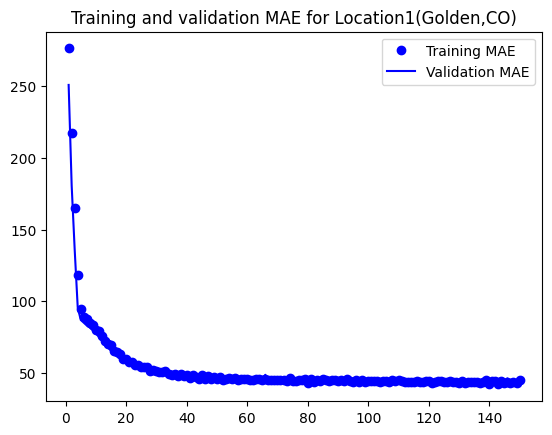

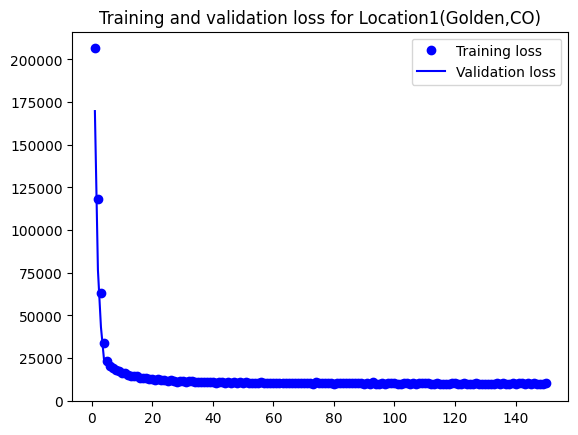

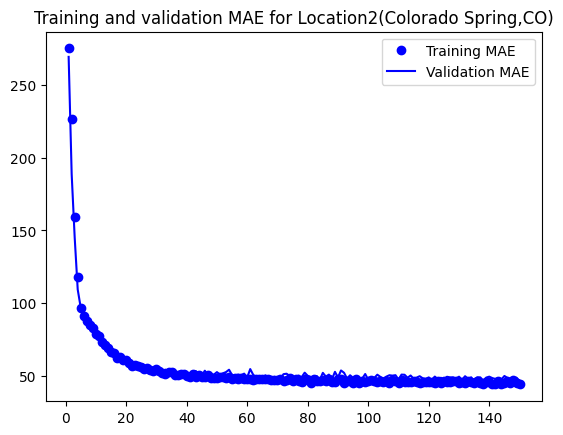

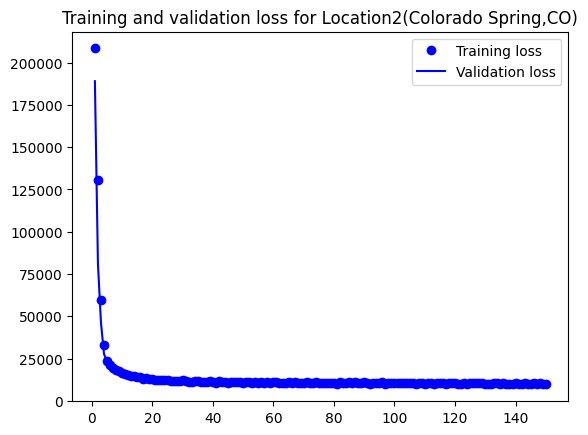

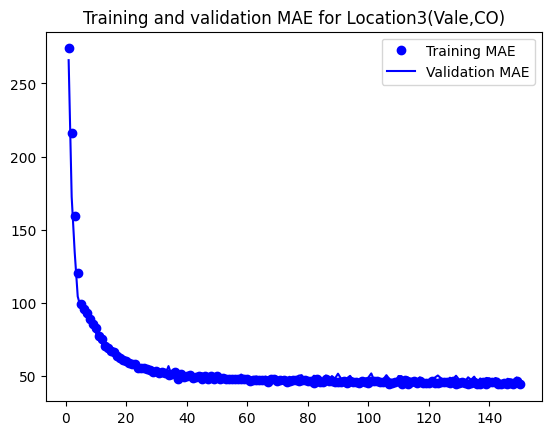

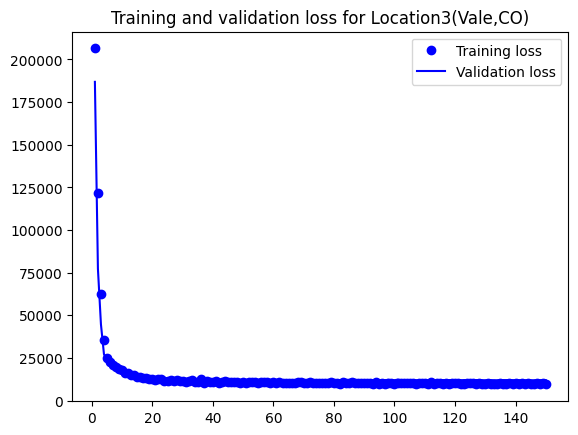

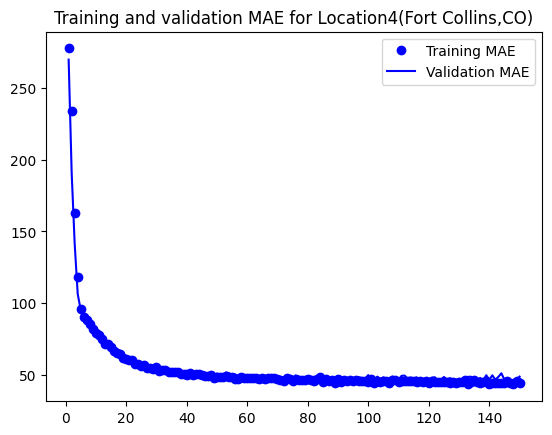

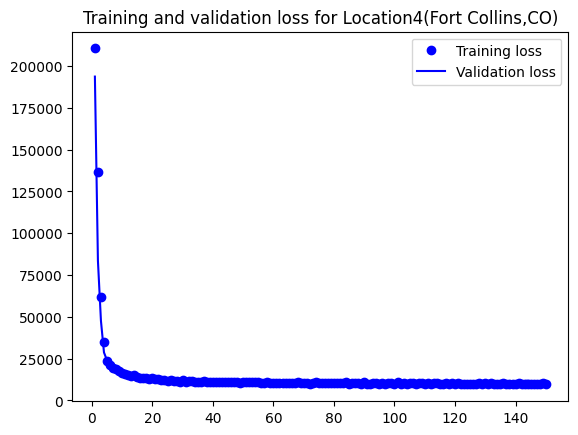

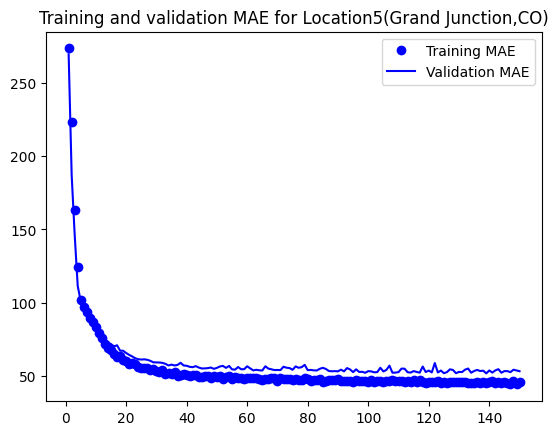

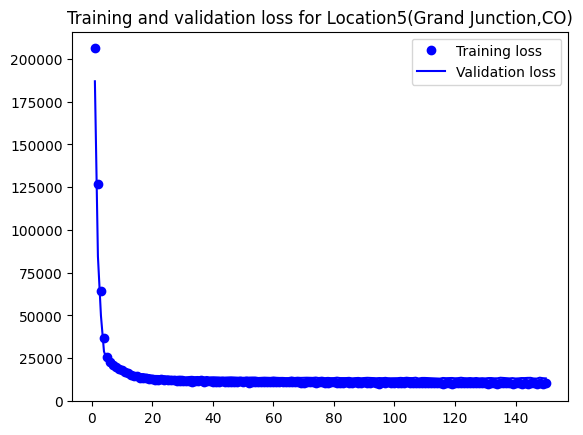

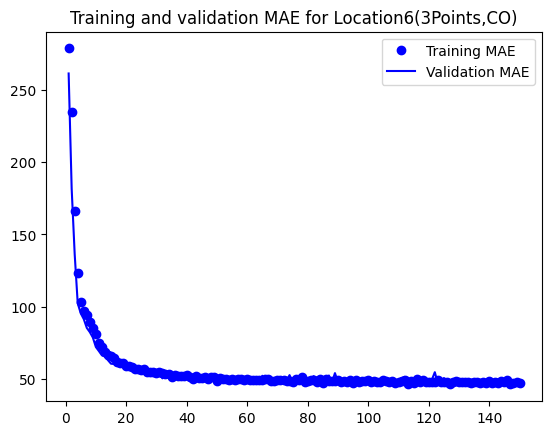

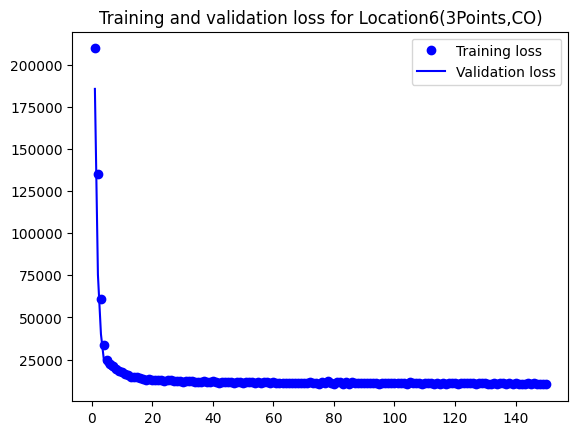

In [28]:
# plot some training/validation curves
for i in range(locs):
    mae = history_lst[i].history['mae']
    val_mae = history_lst[i].history['val_mae']
    loss = history_lst[i].history['loss']
    val_loss = history_lst[i].history['val_loss']
    
    epochs = range(1, len(mae) + 1)
    plt.clf()
    plt.plot(epochs, mae, 'bo', label='Training MAE')
    plt.plot(epochs, val_mae, 'b', label='Validation MAE')
    plt.title('Training and validation MAE for {}'.format(text[i]))
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss for {}'.format(text[i]))
    plt.legend()
    
    plt.show()

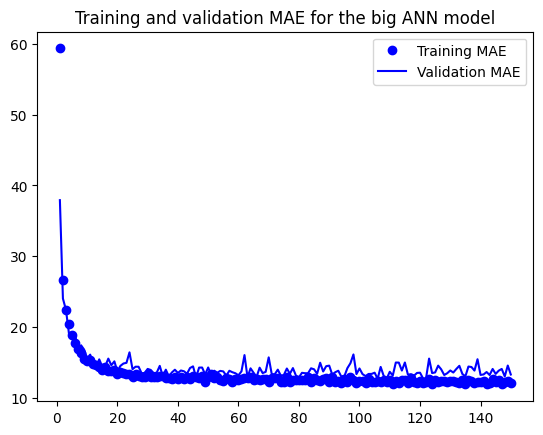

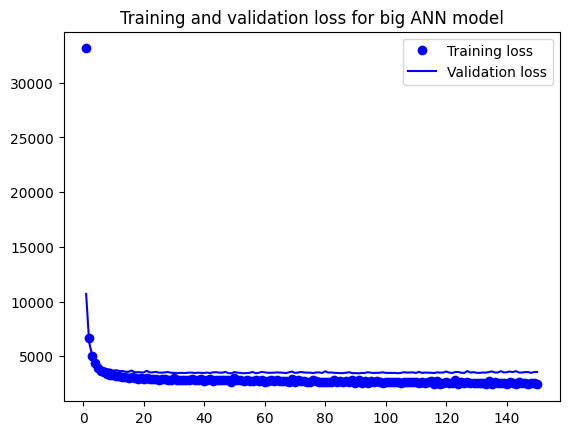

In [29]:
big_mae = big_history.history['mae']
big_val_mae = big_history.history['val_mae']
big_loss = big_history.history['loss']
big_val_loss = big_history.history['val_loss']
    
epochs = range(1, len(big_mae) + 1)
plt.clf()
plt.plot(epochs, big_mae, 'bo', label='Training MAE')
plt.plot(epochs, big_val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE for the big ANN model')
plt.legend()
    
plt.figure()
plt.plot(epochs, big_loss, 'bo', label='Training loss')
plt.plot(epochs, big_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for big ANN model')
plt.legend()
    
plt.show()

In [30]:
#cross validation
k = 5   #k cross validation (folds)
all_scores_lst = []
num_val_samples = len(trainX_lst[0]) // k
for i in range(locs):
    all_scores = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]

        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)

        model = build_model()
        model.fit(partial_train_data, partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
        all_scores.append(val_mae)
        print('MAE: ' + str(val_mae))
        print('========================')
    all_scores_lst.append(all_scores)


Processing Fold 0
MAE: 45.13092803955078
Processing Fold 1
MAE: 46.774635314941406
Processing Fold 2
MAE: 47.30739212036133
Processing Fold 3
MAE: 47.531490325927734
Processing Fold 4
MAE: 46.802001953125
Processing Fold 0
MAE: 49.27552032470703
Processing Fold 1
MAE: 44.553165435791016
Processing Fold 2
MAE: 48.77094650268555
Processing Fold 3
MAE: 45.27064514160156
Processing Fold 4
MAE: 45.031925201416016
Processing Fold 0
MAE: 45.2152099609375
Processing Fold 1
MAE: 48.38468933105469
Processing Fold 2
MAE: 46.30167007446289
Processing Fold 3
MAE: 48.313926696777344
Processing Fold 4
MAE: 43.96650695800781
Processing Fold 0
MAE: 44.22806167602539
Processing Fold 1
MAE: 44.54659652709961
Processing Fold 2
MAE: 47.14179992675781
Processing Fold 3
MAE: 48.3587532043457
Processing Fold 4
MAE: 46.14017868041992
Processing Fold 0
MAE: 42.3626594543457
Processing Fold 1
MAE: 50.43947219848633
Processing Fold 2
MAE: 45.79861068725586
Processing Fold 3
MAE: 48.70410919189453
Processing Fold 

In [31]:
# cross validation for the 1 big model
k = 5
big_num_val_samples = len(big_trainX) // k
big_all_scores = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]

    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)

    big_model = build_model()
    big_model.fit(big_partial_train_data, big_partial_train_targets, epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_val_mse, big_val_mae = big_model.evaluate(big_val_data, big_val_targets, verbose=0)
    big_all_scores.append(val_mae)
    print('MAE: ' + str(val_mae))
    print('========================')
    

Processing Fold 0
MAE: 47.64852523803711
Processing Fold 1
MAE: 47.64852523803711
Processing Fold 2
MAE: 47.64852523803711
Processing Fold 3
MAE: 47.64852523803711
Processing Fold 4
MAE: 47.64852523803711


In [32]:
for i in range(locs):
    for j, val in enumerate(all_scores_lst[i]):
        print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds {}: '.format(text[i]) + str(np.mean(all_scores_lst[i])))
    print("================")

Fold 0: MAE of 45.13092803955078
Fold 1: MAE of 46.774635314941406
Fold 2: MAE of 47.30739212036133
Fold 3: MAE of 47.531490325927734
Fold 4: MAE of 46.802001953125
Mean MAE of all folds Location1(Golden,CO): 46.70928955078125
Fold 0: MAE of 49.27552032470703
Fold 1: MAE of 44.553165435791016
Fold 2: MAE of 48.77094650268555
Fold 3: MAE of 45.27064514160156
Fold 4: MAE of 45.031925201416016
Mean MAE of all folds Location2(Colorado Spring,CO): 46.580440521240234
Fold 0: MAE of 45.2152099609375
Fold 1: MAE of 48.38468933105469
Fold 2: MAE of 46.30167007446289
Fold 3: MAE of 48.313926696777344
Fold 4: MAE of 43.96650695800781
Mean MAE of all folds Location3(Vale,CO): 46.43640060424805
Fold 0: MAE of 44.22806167602539
Fold 1: MAE of 44.54659652709961
Fold 2: MAE of 47.14179992675781
Fold 3: MAE of 48.3587532043457
Fold 4: MAE of 46.14017868041992
Mean MAE of all folds Location4(Fort Collins,CO): 46.08307800292969
Fold 0: MAE of 42.3626594543457
Fold 1: MAE of 50.43947219848633
Fold 2: MAE 

In [33]:
#print some results
for j, val in enumerate(big_all_scores):
    print('Fold ' + str(j) +': ' + 'MAE of', val)
    print('Mean MAE of all folds big model: ' + str(np.mean(big_all_scores)))
    print("================")

Fold 0: MAE of 47.64852523803711
Mean MAE of all folds big model: 47.64852523803711
Fold 1: MAE of 47.64852523803711
Mean MAE of all folds big model: 47.64852523803711
Fold 2: MAE of 47.64852523803711
Mean MAE of all folds big model: 47.64852523803711
Fold 3: MAE of 47.64852523803711
Mean MAE of all folds big model: 47.64852523803711
Fold 4: MAE of 47.64852523803711
Mean MAE of all folds big model: 47.64852523803711


In [34]:
all_mae_histories_lst = []
for i in range(locs):
    all_mae_histories = []
    for j in range(k):
        print('Processing Fold', j)
        val_data = trainX_scaled_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        val_targets = trainY_lst[i][j * num_val_samples: (j + 1) * num_val_samples]
        partial_train_data = np.concatenate([trainX_scaled_lst[i][:j * num_val_samples], trainX_scaled_lst[i][(j + 1) * num_val_samples:]],axis=0)
        
        partial_train_targets = np.concatenate([trainY_lst[i][:j * num_val_samples], trainY_lst[i][(j + 1) * num_val_samples:]], axis=0)
        
        model = build_model()
        history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=n_epochs, batch_size=n_batch_size, verbose=0)
        mae_history = history.history['val_mae']
        all_mae_histories.append(mae_history)
    
    all_mae_histories_lst.append(all_mae_histories)

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4
Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [35]:
big_all_mae_histories = []
for j in range(k):
    print('Processing Fold', j)
    big_val_data = big_trainX_scaled[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_val_targets = big_trainY[j * big_num_val_samples: (j + 1) * big_num_val_samples]
    big_partial_train_data = np.concatenate([big_trainX_scaled[:j * big_num_val_samples], big_trainX_scaled[(j + 1) * big_num_val_samples:]],axis=0)
        
    big_partial_train_targets = np.concatenate([big_trainY[:j * big_num_val_samples], big_trainY[(j + 1) * big_num_val_samples:]], axis=0)
        
    big_model = build_model()
    big_history = big_model.fit(big_partial_train_data, big_partial_train_targets, validation_data=(big_val_data, big_val_targets),
                epochs=n_epochs, batch_size=n_batch_size, verbose=0)
    big_mae_history = big_history.history['val_mae']
    big_all_mae_histories.append(big_mae_history)
    

Processing Fold 0
Processing Fold 1
Processing Fold 2
Processing Fold 3
Processing Fold 4


In [36]:
average_mae_history_lst = []
for i in range(locs):
    average_mae_history = [np.mean([x[j] for x in all_mae_histories_lst[i]]) for j in range(n_epochs)]
    average_mae_history_lst.append(average_mae_history)
    print(len(average_mae_history))

150
150
150
150
150
150


In [37]:
big_average_mae_history = [np.mean([x[j] for x in big_all_mae_histories]) for j in range(n_epochs)]
print(len(big_average_mae_history))

150


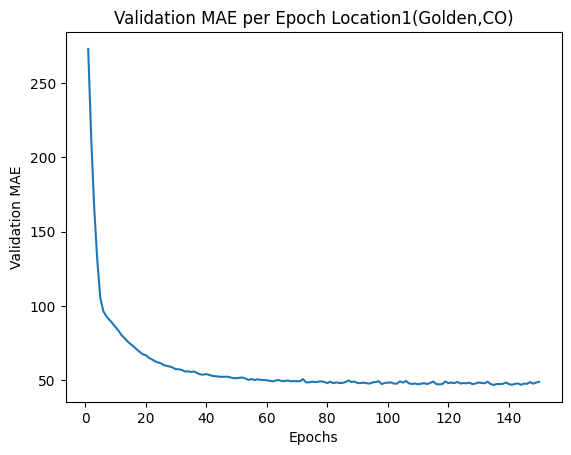

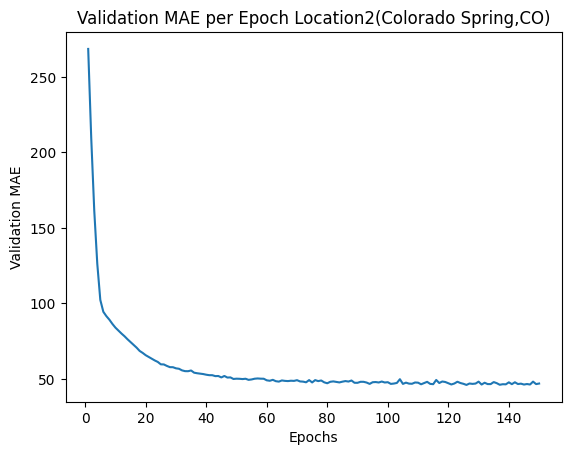

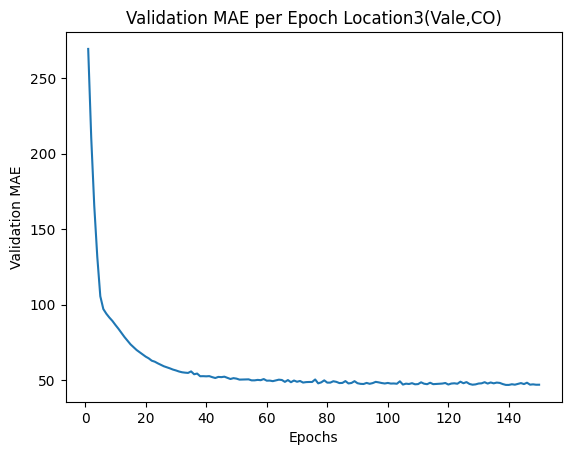

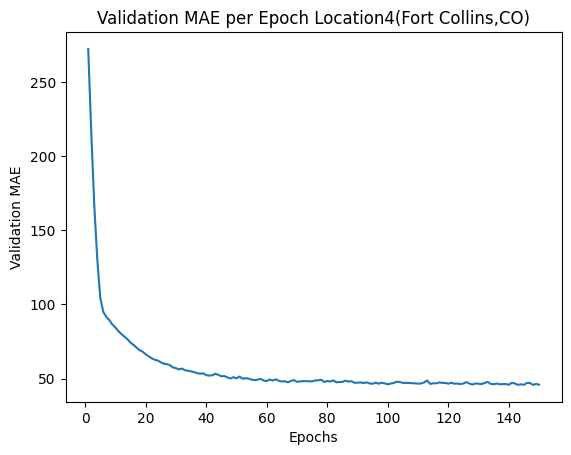

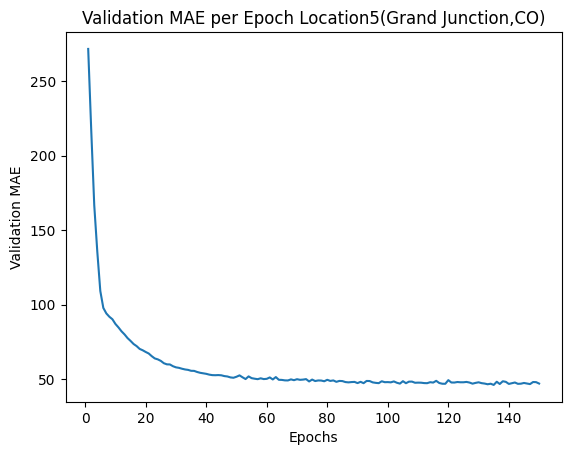

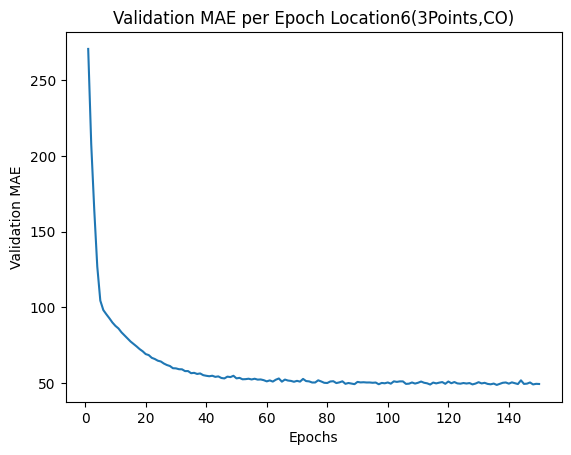

In [38]:
for i in range(locs):
    plt.clf()
    plt.plot(range(1, len(average_mae_history_lst[i]) + 1), average_mae_history_lst[i])
    plt.title('Validation MAE per Epoch {}'.format(text[i]))
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

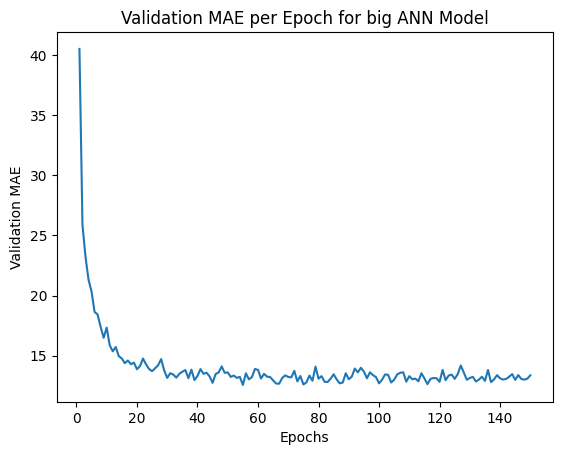

In [39]:
plt.clf()
plt.plot(range(1, len(big_average_mae_history) + 1), big_average_mae_history)
plt.title('Validation MAE per Epoch for big ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [40]:
best_model_lst = []
for i in range(locs):
    model_reloaded = load_model(checkpoint_no_lst[i] + '/' + model_name_lst[i])
    
    # Saving the best model in the correct path and format
    root_directory = os.getcwd()
    checkpoint_dir = os.path.join(root_directory, checkpoint_no_lst[i])
    model_name_temp = os.path.join(checkpoint_dir, model_name_lst[i] + '.h5')
    model_reloaded.save(model_name_temp)
    
    # Deletion of the automatically created folder under Model Checkpoint File.
    folder_name_temp = os.path.join(checkpoint_dir, model_name_lst[i])
    shutil.rmtree(folder_name_temp, ignore_errors=True)
    best_model = load_model(model_name_temp)
    best_model_lst.append(best_model)

/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.s

In [41]:
big_model_reloaded = load_model(big_checkpoint_no + '/' + big_model_name)
    
# Saving the best model in the correct path and format
root_directory = os.getcwd()
big_checkpoint_dir = os.path.join(root_directory, big_checkpoint_no)
big_model_name_temp = os.path.join(big_checkpoint_dir, big_model_name + '.h5')
big_model_reloaded.save(big_model_name_temp)
    
# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(big_checkpoint_dir, big_model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)
big_best_model = load_model(big_model_name_temp)


/Users/saraabouelella/anaconda3/envs/nrel311/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
test_loss_lst = []
test_mae_lst = []
for i in range(locs):
    test_loss, test_mae = best_model_lst[i].evaluate(testX_scaled_lst[i], testY_lst[i], steps=n_test_steps)
    test_loss_lst.append(test_loss)
    test_mae_lst.append(test_mae)
    print()
    print('Test MAE {}:'.format(text[i]), test_mae)

17/17 [==============================] - 0s 471us/step - loss: 10874.4209 - mae: 45.5296

Test MAE Location1(Golden,CO): 45.529624938964844
17/17 [==============================] - 0s 476us/step - loss: 11607.8994 - mae: 46.4738

Test MAE Location2(Colorado Spring,CO): 46.47383117675781
17/17 [==============================] - 0s 487us/step - loss: 11597.8457 - mae: 48.9294

Test MAE Location3(Vale,CO): 48.929420471191406
17/17 [==============================] - 0s 2ms/step - loss: 12376.3525 - mae: 50.2229

Test MAE Location4(Fort Collins,CO): 50.22285461425781
17/17 [==============================] - 0s 656us/step - loss: 10090.0859 - mae: 45.3822

Test MAE Location5(Grand Junction,CO): 45.38215637207031
17/17 [==============================] - 0s 496us/step - loss: 9351.0332 - mae: 43.0227

Test MAE Location6(3Points,CO): 43.02265930175781


In [43]:
big_test_loss, big_test_mae = big_best_model.evaluate(big_testX_scaled, big_testY, steps=n_test_steps)
print()
print('Test MAE for big ANN Model:', big_test_mae)

17/17 [==============================] - 0s 531us/step - loss: 3113.4595 - mae: 12.7621

Test MAE for big ANN Model: 12.762062072753906


In [44]:
y_pred_ann_lst = []
for i in range(locs):
    y_pred = best_model_lst[i].predict(testX_scaled_lst[i])
    y_pred_ann_lst.append(y_pred)
    
y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 293us/step


array([[ -1.0924498],
       [  2.8589096],
       [ -3.0459561],
       [ -1.214387 ],
       [172.5153   ]], dtype=float32)

In [45]:
big_y_pred_ann_lst = []
for i in range(locs):
    y_pred = big_best_model.predict(testX_scaled_lst[i])
    big_y_pred_ann_lst.append(y_pred)
    
big_y_pred_ann_lst[0][:5]

110/110 [==============================] - 0s 261us/step


array([[-135.88821 ],
       [ -20.315105],
       [  -6.155482],
       [-130.3524  ],
       [ 224.11263 ]], dtype=float32)

In [46]:
df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    df_results_lst.append(df_results)

df_results_lst[4]

,Actual,Predicted
0,15.0,-1.092450
1,823.0,2.858910
2,0.0,-3.045956
3,414.0,-1.214387
4,0.0,172.515305
...,...,...
3498,0.0,-0.172979
3499,0.0,-4.380495
3500,866.0,56.969173
3501,0.0,873.582642


In [47]:
big_df_results_lst = []
for i in range(locs):
    df_testY = pd.DataFrame(testY_lst[i])
    df_y_pred = pd.DataFrame(big_y_pred_ann_lst[0])
    
    df_testY.reset_index(drop=True, inplace=True)
    df_y_pred.reset_index(drop=True, inplace=True)
    df_results = pd.concat([df_testY, df_y_pred], axis=1)
    df_results.columns = ['Actual', 'Predicted']
    big_df_results_lst.append(df_results)

big_df_results_lst[4]

,Actual,Predicted
0,15.0,-135.888214
1,823.0,-20.315105
2,0.0,-6.155482
3,414.0,-130.352402
4,0.0,224.112625
...,...,...
3498,0.0,1.897849
3499,0.0,-104.010445
3500,866.0,36.868538
3501,0.0,848.065918


In [48]:
for i in range(locs):
    print("Neural Network for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_ann_lst[i], squared=False))
    print("=================================================================")
    
    print("Linear Regression for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_linreg_lst[i], squared=False))
    print("=================================================================")
    
    print("SVR for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], y_pred_svr_lst[i], squared=False))
    print("=================================================================\n")
    

Neural Network for Location1(Golden,CO)
Mean Absolute Error: 45.529625541247405
Mean Squared Error: 10874.420338210959
Root Mean Squared Error: 104.28048877048361
Linear Regression for Location1(Golden,CO)
Mean Absolute Error: 59.58567779027305
Mean Squared Error: 12911.481328697973
Root Mean Squared Error: 113.62869940599502
SVR for Location1(Golden,CO)
Mean Absolute Error: 142.43410266077046
Mean Squared Error: 60779.95594969546
Root Mean Squared Error: 246.53591208928458

Neural Network for Location2(Colorado Spring,CO)
Mean Absolute Error: 46.47383247555374
Mean Squared Error: 11607.899272962775
Root Mean Squared Error: 107.73996135586265
Linear Regression for Location2(Colorado Spring,CO)
Mean Absolute Error: 60.97467073139261
Mean Squared Error: 13233.952660512476
Root Mean Squared Error: 115.03891802565111
SVR for Location2(Colorado Spring,CO)
Mean Absolute Error: 143.75277156779669
Mean Squared Error: 61236.8431013025
Root Mean Squared Error: 247.46079103830266

Neural Network 

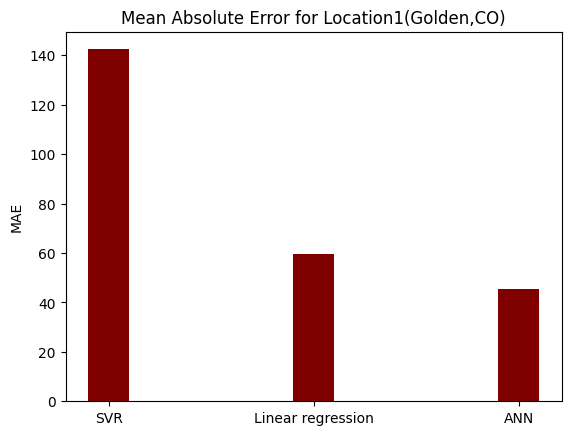

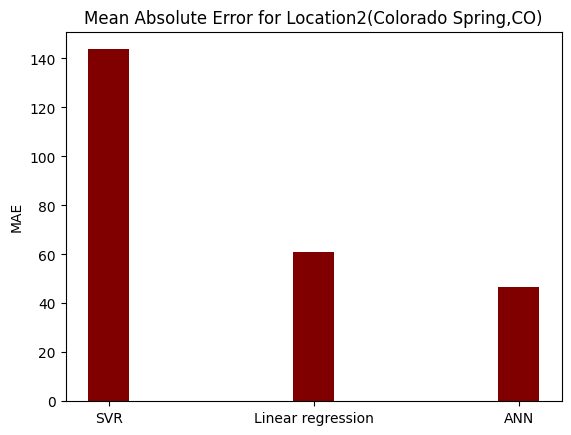

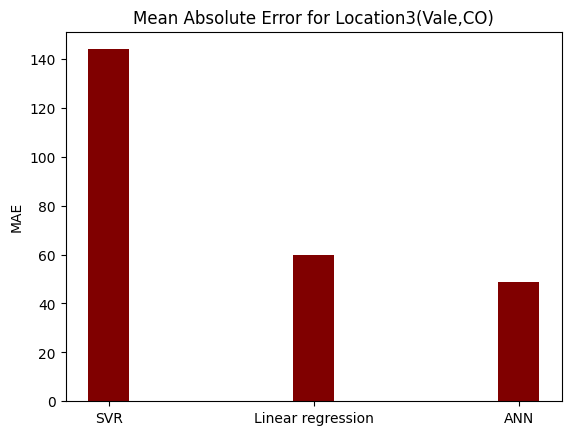

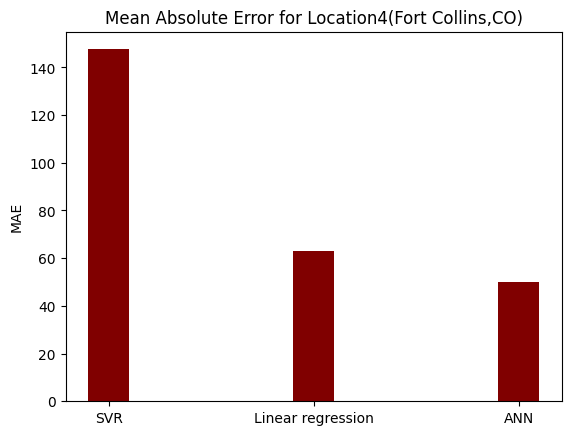

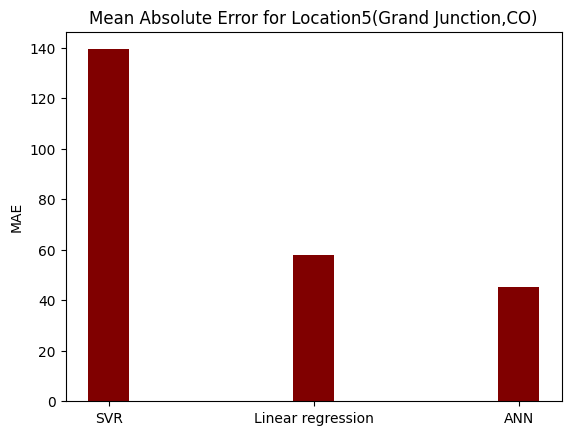

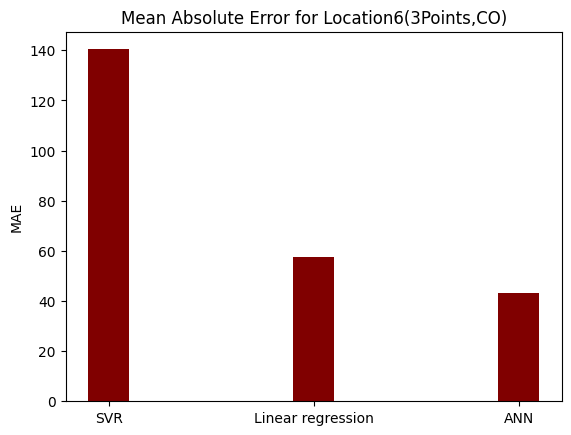

In [49]:
reg = ['SVR', 'Linear regression', 'ANN']

for i in range(locs):
    plt.clf()
    plt.title('Mean Absolute Error for {}'.format(text[i]))
    reg_mae = [metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]),
        metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i])]
    plt.bar(reg, reg_mae, width=0.2, color='maroon')
    # plt.xlabel("Models")
    plt.ylabel("MAE")

    
    # plt.legend()
    plt.show()

In [50]:
for i in range(locs):
    print("Neural Network big Model for {}".format(text[i]))
    print('Mean Absolute Error:', metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i]))
    print('Root Mean Squared Error:', metrics.mean_squared_error(testY_lst[i], big_y_pred_ann_lst[i], squared=False))
    print("=================================================================")


Neural Network big Model for Location1(Golden,CO)
Mean Absolute Error: 70.84722166380608
Mean Squared Error: 13024.63027150145
Root Mean Squared Error: 114.1255022836765
Neural Network big Model for Location2(Colorado Spring,CO)
Mean Absolute Error: 70.55612204478463
Mean Squared Error: 13393.20277486018
Root Mean Squared Error: 115.72900576286041
Neural Network big Model for Location3(Vale,CO)
Mean Absolute Error: 70.53263329661577
Mean Squared Error: 13346.57207674068
Root Mean Squared Error: 115.52736505581991
Neural Network big Model for Location4(Fort Collins,CO)
Mean Absolute Error: 71.97718351934762
Mean Squared Error: 13806.240991459403
Root Mean Squared Error: 117.49996166577844
Neural Network big Model for Location5(Grand Junction,CO)
Mean Absolute Error: 67.41638713613973
Mean Squared Error: 11855.733121809817
Root Mean Squared Error: 108.88403520172191
Neural Network big Model for Location6(3Points,CO)
Mean Absolute Error: 67.52403217776993
Mean Squared Error: 11615.3244490

[[142.43410266077046, 143.75277156779669, 143.92608002394974, 147.60175000690163, 139.34108393167244, 140.39947887976783], [59.58567779027305, 60.97467073139261, 59.74567394002712, 62.86940892061464, 57.96061681901501, 57.363103194831915], [45.529625541247405, 46.47383247555374, 48.929421247889444, 50.222857026620964, 45.382150136408654, 43.022665323715636], [70.84722166380608, 70.55612204478463, 70.53263329661577, 71.97718351934762, 67.41638713613973, 67.52403217776993]]


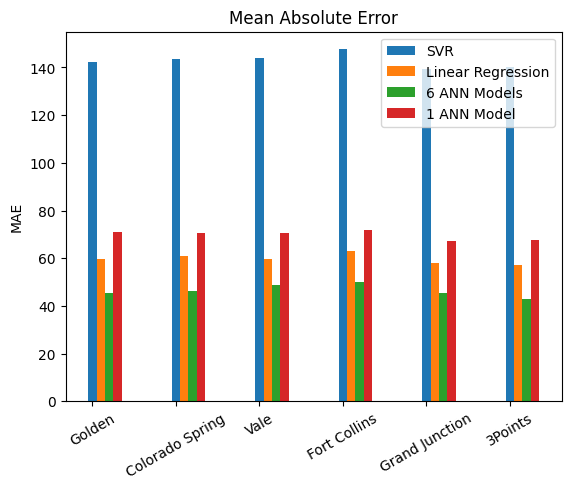

In [51]:
barWidth = 0.1
reg = ['SVR', 'Linear Regression', '6 ANN Models', '1 ANN Model']

reg_svr = []
reg_lin = []
reg_ann1 = []
reg_ann6 = []
for i in range(locs):
    reg_mae = []
    reg_svr.append(metrics.mean_absolute_error(testY_lst[i], y_pred_svr_lst[i]))
    reg_lin.append(metrics.mean_absolute_error(testY_lst[i], y_pred_linreg_lst[i]))
    reg_ann1.append(metrics.mean_absolute_error(testY_lst[i], y_pred_ann_lst[i]))
    reg_ann6.append(metrics.mean_absolute_error(testY_lst[i], big_y_pred_ann_lst[i]))

reg_all = [reg_svr, reg_lin, reg_ann1, reg_ann6]
print(reg_all)
plt.clf()
plt.title('Mean Absolute Error')
br_i = np.arange(locs)
for i in range(len(reg)):
    plt.bar(br_i, reg_all[i], width=barWidth, label=reg[i])
    br_i = [x + barWidth for x in br_i]
    # plt.xticks(br_i, ['Golden', 'Colorado Spring', 'Vale', 'Grandjunction', '3Points'])

plt.xticks(list(range(locs)), ['Golden', 'Colorado Spring', 'Vale', 'Fort Collins', 'Grand Junction', '3Points'], rotation=30) 
plt.ylabel("MAE")
plt.legend()
plt.show()

In [52]:
# make the time stamp matches the test Y
test_size = testY_lst[0].shape[0]
shifted_df = dfs[0].iloc[8:, :]
bad_df = shifted_df.isin(shifted_df.iloc[zero_index, :])
df_zero_deleted = shifted_df[~bad_df].dropna()
df_zero_deleted.shape
timest = df_zero_deleted.index[-test_size:]
print(timest)

DatetimeIndex(['2010-09-02 08:00:00', '2010-09-02 08:30:00',
               '2010-09-02 09:00:00', '2010-09-02 09:30:00',
               '2010-09-02 10:00:00', '2010-09-02 10:30:00',
               '2010-09-02 11:00:00', '2010-09-02 11:30:00',
               '2010-09-02 12:00:00', '2010-09-02 12:30:00',
               ...
               '2010-12-31 14:30:00', '2010-12-31 15:00:00',
               '2010-12-31 15:30:00', '2010-12-31 16:00:00',
               '2010-12-31 16:30:00', '2010-12-31 17:00:00',
               '2010-12-31 17:30:00', '2010-12-31 18:00:00',
               '2010-12-31 18:30:00', '2010-12-31 19:00:00'],
              dtype='datetime64[ns]', length=3503, freq=None)


In [53]:
#get the best day!
k = 22
day_long = 38
for i in range(locs):
    day1 = y_pred_ann_lst[i][:k]
    print(day1)
    err =[]
    err.append(metrics.mean_absolute_error(testY_lst[i][:k], y_pred_ann_lst[i][:k]))
    for j in range(k, y_pred.shape[0], day_long):
        err.append(metrics.mean_absolute_error(testY[j:j+day_long], y_pred[j:j+day_long]))
    
    print("min error ", min(err))
    print("position of best day ", err.index(min(err)))
    day_ind = day_long * (err.index(min(err))) + 15
    print(day_ind)


[[-1.0924498e+00]
 [ 2.8589096e+00]
 [-3.0459561e+00]
 [-1.2143871e+00]
 [ 1.7251530e+02]
 [-5.7826483e-01]
 [ 1.7913889e+00]
 [ 8.8390857e+02]
 [ 9.5452350e+02]
 [ 6.0404645e+02]
 [ 8.4021082e+02]
 [-4.9030242e+00]
 [ 3.2791174e+02]
 [-5.2078142e+00]
 [ 6.5877209e+02]
 [ 8.3160217e+02]
 [-3.7595534e+00]
 [ 8.4133252e+02]
 [ 3.9033673e+02]
 [ 5.4449396e+02]
 [ 6.1194574e+02]
 [-4.2148101e-01]]
min error  33.674077222221776
position of best day  82
3131
[[ 2.7716632e+00]
 [-1.7736992e+00]
 [ 9.2880762e+02]
 [ 4.0466180e+00]
 [ 6.4840431e+01]
 [ 1.0348060e+02]
 [ 1.6639977e+02]
 [-1.6857532e+00]
 [-2.7353473e+00]
 [ 1.3309059e-01]
 [ 2.2911638e-02]
 [ 3.5742841e+02]
 [-6.0528202e+00]
 [-9.1628971e+00]
 [ 9.6942847e+02]
 [ 8.9520020e+02]
 [ 7.4294055e+02]
 [ 9.1179492e+02]
 [ 9.5573010e+02]
 [ 4.5675693e+02]
 [ 6.7614709e+02]
 [-7.4478202e+00]]
min error  33.674077222221776
position of best day  82
3131
[[ 524.4136   ]
 [ 571.8087   ]
 [ 918.791    ]
 [ 485.89996  ]
 [ 751.03125  ]
 [ 765

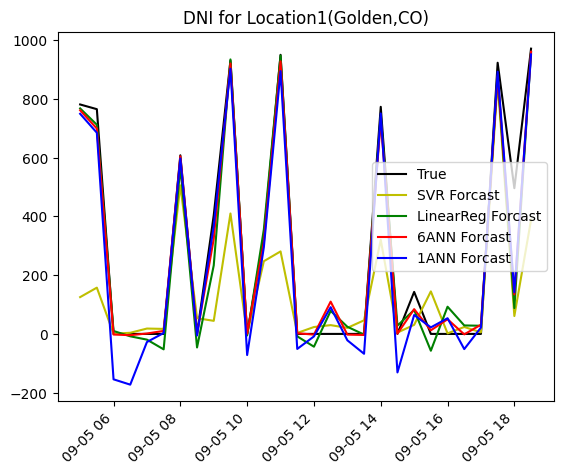

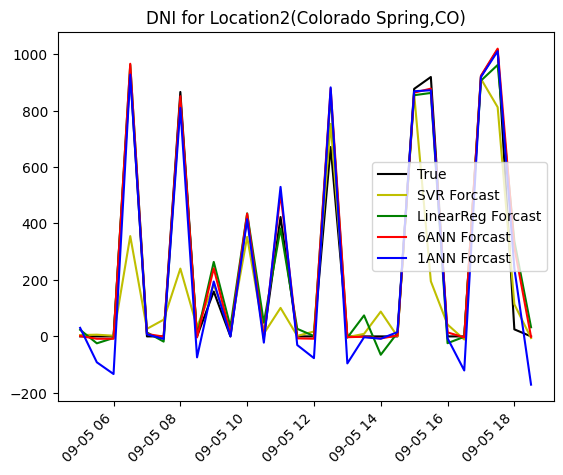

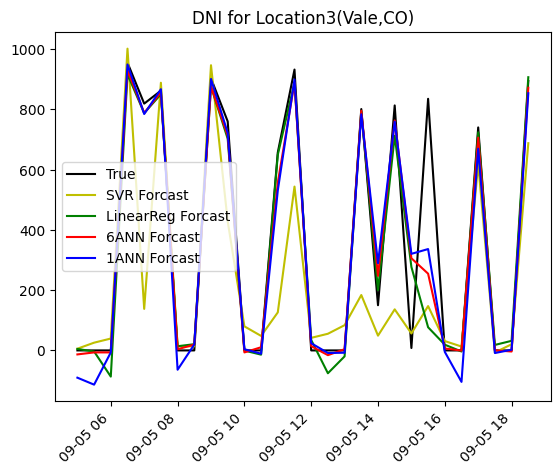

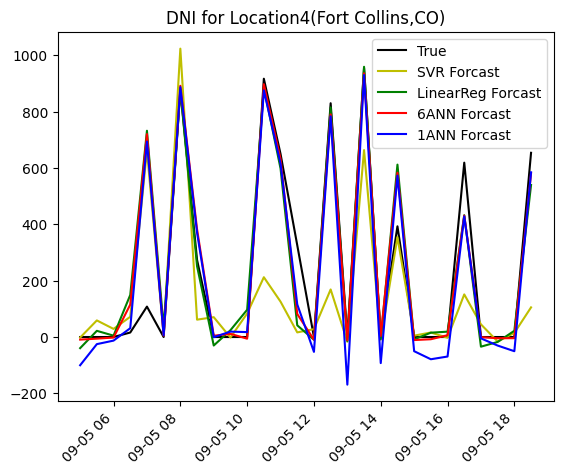

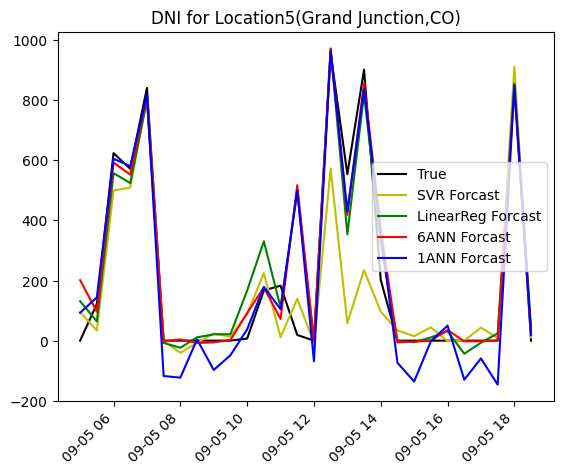

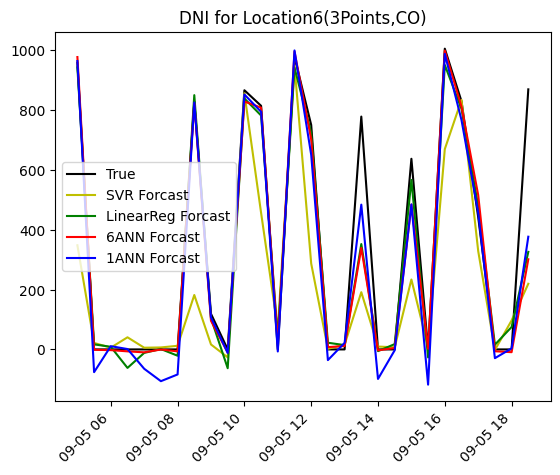

In [54]:
s = 81
l = 28
for i in range(locs):
    plt.clf()
    plt.title('DNI for {}'.format(text[i]))
    plt.plot(timest[s:s+l], testY_lst[i][s:s+l], 'k', label='True')
    plt.plot(timest[s:s+l], y_pred_svr_lst[i][s:s+l], 'y', label='SVR Forcast')
    plt.plot(timest[s:s+l], y_pred_linreg_lst[i][s:s+l], 'g', label='LinearReg Forcast')
    plt.plot(timest[s:s+l], y_pred_ann_lst[i][s:s+l], 'r', label='6ANN Forcast')
    plt.plot(timest[s:s+l], big_y_pred_ann_lst[i][s:s+l], 'b', label='1ANN Forcast')
    
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

<Figure size 3000x3000 with 0 Axes>

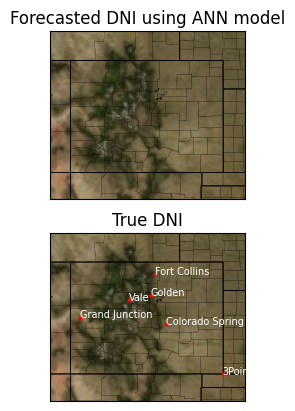

In [55]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,30)) 
fig, axes = plt.subplots(2, 1)
axes[0].set_title("Forecasted DNI using ANN model")
m1 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[0])

m1.bluemarble()
m1.drawstates()
m1.drawcounties()

axes[1].set_title("True DNI")
m2 = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-110, llcrnrlat=36,
    urcrnrlon=-101, urcrnrlat=42, ax=axes[1])

m2.bluemarble()
m2.drawstates()
m2.drawcounties()

for i in range(locs):
    x,y = m2(P_lons[i], P_lats[i])
    m2.plot(x,y, 'ro', markersize=2)
    plt.text(x+300, y+100, text[i][10:-4], fontsize=7, color='w')


plt.show()

In [56]:
# Moving results to another file
import pickle
for i in range(locs):
    y_trans_ann_lst = list(np.reshape(y_pred_ann_lst[i],y_pred_ann_lst[i].shape[0]))
    y_trans_true_lst = list(np.reshape(testY_lst[i], testY_lst[0].shape[0]))
    
    with open("pred_nn{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_ann_lst, fp)

    with open("true_y{}".format(i+1), "wb") as fp:   #Pickling
        pickle.dump(y_trans_true_lst, fp)

In [57]:
################# Skip this cell, it worked better in a sperete file ####################
# import matplotlib.animation as animation 
# from matplotlib.animation import PillowWriter

# point = m.plot(x, y, 'ro', markersize=5)[0]

# def init(): 
#     point.set_markersize(0)
#     return point,

# # animation function.  This is called sequentially
# def animate(i):
#     s = 0.05 * i
#     # point.set_linewidth(s)
#     # m = Basemap(projection='merc', lat_0 = p1_lat, lon_0 = p1_lon, resolution = 'h', area_thresh = 0.1, llcrnrlon=-110, llcrnrlat=36, urcrnrlon=-101, urcrnrlat=42)
#     point.set_markersize(s)
#     return point, 
#     # m.bluemarble()
#     # m.drawstates()
#     # m.drawcounties()
    
#     # x,y = m(p1_lon, p1_lat)
#     # m.plot(x, y, 'yo', markersize=s)

# anim = animation.FuncAnimation(plt.gcf(), animate, init_func = init, frames = y_pred_list, interval = 20, blit = True)
# # writer = PillowWriter(fps=30)
# # anim.save("myMap.gif", writer=writer)

# # plt.tight_layout()
# plt.show()
# # anim.save('animatedMap.mp4', writer = 'sa', fps = 30)